In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score

In [2]:
# Reading the record of the 1st patient from the trianing_setB
pd.set_option('display.max_columns', None)
patient1=pd.read_csv("C:\\Users\\Admin\\Desktop\\Sepsis\\Dataset\\training_setB\\training_setB\\p100001.psv",sep='|')
patient1.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\Sepsis\\Dataset\\training_setB\\training_setB\\p100001.psv'

In [3]:
dataset=[]
import os
for index,file in enumerate(os.listdir("C:\\Users\\Admin\\Desktop\\Sepsis\\Dataset\\training_setB\\training_setB")):
    file_path=os.path.join("C:\\Users\\Admin\\Desktop\\Sepsis\\Dataset\\training_setB\\training_setB",file)
    patient_record=pd.read_csv(file_path,sep='|')
    for i in range(len(patient_record.values)):
        row=np.append(np.array([index+1]),patient_record.values[i])
        dataset.append(row)

columns=["patient_id"]+list(patient1.columns)
complete_dataset=pd.DataFrame(dataset,columns=columns)

print(len(complete_dataset))

761995


In [3]:
plt.figure( figsize=(12, 5))
sns.heatmap(complete_dataset.isnull())

NameError: name 'complete_dataset' is not defined

<Figure size 864x360 with 0 Axes>

In [5]:
# Checking the proportion of classes
complete_dataset['SepsisLabel'].value_counts()

0.0    751215
1.0     10780
Name: SepsisLabel, dtype: int64

<AxesSubplot:xlabel='SepsisLabel', ylabel='count'>

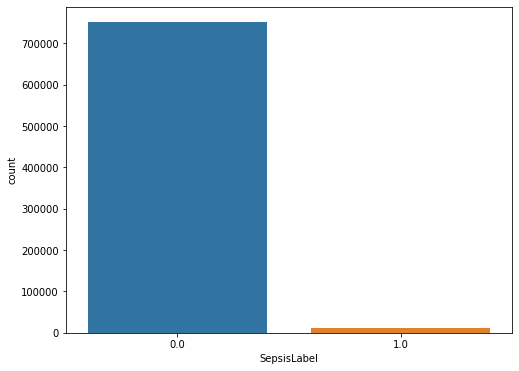

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=complete_dataset,x='SepsisLabel')

In [7]:
# Saving the dataset for further use
complete_dataset.to_csv('complete_dataset(B).csv')

In [3]:
complete_dataset=pd.read_csv("complete_dataset(B).csv")

In [4]:
complete_dataset.head()

Unnamed: 0  patient_id    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  EtCO2  \
0           0         1.0   NaN    NaN   NaN    NaN   NaN   NaN   NaN    NaN   
1           1         1.0  93.0   92.5   NaN  110.0  76.0  56.0  22.0    NaN   
2           2         1.0  91.0   96.0   NaN  108.0  84.5  72.0  23.5    NaN   
3           3         1.0  93.0   98.0   NaN  123.0  87.0  61.0  21.0    NaN   
4           4         1.0  93.0   95.0   NaN  110.0  81.0  70.0  20.0    NaN   

   BaseExcess  HCO3  FiO2  pH  PaCO2  SaO2  AST  BUN  Alkalinephos  Calcium  \
0         NaN   NaN   NaN NaN    NaN   NaN  NaN  NaN           NaN      NaN   
1         NaN   NaN   NaN NaN    NaN   NaN  NaN  NaN           NaN      NaN   
2         NaN   NaN   NaN NaN    NaN   NaN  NaN  NaN           NaN      NaN   
3         NaN   NaN   NaN NaN    NaN   NaN  NaN  NaN           NaN      NaN   
4         NaN   NaN   NaN NaN    NaN   NaN  NaN  NaN           NaN      NaN   

   Chloride  Creatinine  Bilirubin_direct  Glucose  Lactate  Magnesium  \
0       NaN         NaN               NaN      NaN      NaN        NaN   
1       NaN         NaN               NaN      NaN      NaN        NaN   
2       NaN         NaN               NaN    233.0      NaN        NaN   
3       NaN         NaN               NaN      NaN      NaN        NaN   
4       NaN         NaN               NaN      NaN      NaN        NaN   

   Phosphate  Potassium  Bilirubin_total  TroponinI  Hct  Hgb  PTT  WBC  \
0        NaN        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
1        NaN        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
2        NaN        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
3        NaN        NaN              NaN        NaN  NaN  NaN  NaN  NaN   
4        NaN        NaN              NaN        NaN  NaN  NaN  NaN  NaN   

   Fibrinogen  Platelets   Age  Gender  Unit1  Unit2  HospAdmTime  ICULOS  \
0         NaN        NaN  73.0     1.0    1.0    0.0      -214.64     1.0   
1         NaN        NaN  73.0     1.0    1.0    0.0      -214.64     2.0   
2         NaN        NaN  73.0     1.0    1.0    0.0      -214.64     3.0   
3         NaN        NaN  73.0     1.0    1.0    0.0      -214.64     4.0   
4         NaN        NaN  73.0     1.0    1.0    0.0      -214.64     5.0   

   SepsisLabel  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0

In [5]:
complete_dataset.describe()

Unnamed: 0     patient_id             HR          O2Sat  \
count  761995.000000  761995.000000  669785.000000  654338.000000   
mean   380997.000000   10025.317577      84.141905      97.117749   
std    219969.153523    5776.257876      17.724160       2.964618   
min         0.000000       1.000000      20.000000      20.000000   
25%    190498.500000    5047.000000      71.500000      96.000000   
50%    380997.000000   10058.000000      83.000000      98.000000   
75%    571495.500000   15003.000000      95.000000      99.500000   
max    761994.000000   20000.000000     211.000000     100.000000   

                Temp            SBP            MAP            DBP  \
count  258325.000000  655931.000000  649583.000000  655738.000000   
mean       36.926076     126.598433      86.367137      66.234002   
std         0.755826      24.533018      16.774449      14.237016   
min        30.000000      20.000000      30.000000      20.000000   
25%        36.500000     109.000000      74.500000      56.000000   
50%        36.900000     124.000000      84.000000      65.000000   
75%        37.400000     142.000000      96.000000      74.000000   
max        50.000000     300.000000     300.000000     300.000000   

                Resp         EtCO2   BaseExcess         HCO3          FiO2  \
count  600918.000000  57636.000000  1764.000000  1411.000000  17210.000000   
mean       18.670780     32.957657    -2.669218    23.219064      0.741160   
std         4.720294      7.951662     4.185396     3.259499     30.492778   
min         1.000000     10.000000   -23.200000     7.700000    -50.000000   
25%        16.000000     28.000000    -4.900000    21.450000      0.400000   
50%        18.000000     33.000000    -2.400000    23.400000      0.400000   
75%        21.000000     38.000000    -0.200000    25.100000      0.600000   
max       100.000000    100.000000    14.200000    36.400000   4000.000000   

                 pH         PaCO2          SaO2           AST           BUN  \
count  16958.000000  17013.000000  14401.000000  13363.000000  42092.000000   
mean       7.371941     40.434274     96.566468    175.322345     23.254858   
std        0.087226     10.275617      3.729406    658.974827     19.728496   
min        6.710000     12.000000     23.000000      5.000000      1.000000   
25%        7.320000     34.700000     95.700000     20.000000     11.000000   
50%        7.380000     39.000000     97.500000     32.000000     17.000000   
75%        7.430000     44.000000     98.700000     72.000000     28.000000   
max        7.710000    100.000000    100.000000   9961.000000    268.000000   

       Alkalinephos       Calcium     Chloride    Creatinine  \
count  13409.000000  52013.000000  4689.000000  42129.000000   
mean      92.404542      6.983445   106.709533      1.643156   
std       89.132038      3.020360     4.887927      2.093640   
min       11.000000      1.000000    74.000000      0.200000   
25%       52.000000      7.200000   104.000000      0.750000   
50%       70.000000      8.200000   107.000000      0.990000   
75%      101.000000      8.700000   110.000000      1.510000   
max     1650.000000     27.900000   124.000000     41.900000   

       Bilirubin_direct        Glucose       Lactate     Magnesium  \
count       1808.000000  168860.000000  14303.000000  36470.000000   
mean           1.000647     138.834415      2.983441      2.069061   
std            2.605068      51.056803      2.833047      0.410227   
min            0.010000      13.000000      0.400000      0.500000   
25%            0.100000     108.000000      1.330000      1.800000   
50%            0.200000     128.000000      1.970000      2.000000   
75%            0.682500     155.000000      3.430000      2.200000   
max           30.000000     891.000000     22.250000      9.800000   

          Phosphate     Potassium  Bilirubin_total     TroponinI  \
count  22405.000000  58689.000000     13448.000000  13816.000000   
mean   

In [15]:
complete_dataset.isnull().sum()

Unnamed: 0               0
patient_id               0
HR                   92210
O2Sat               107657
Temp                503670
SBP                 106064
MAP                 112412
DBP                 106257
Resp                161077
EtCO2               704359
BaseExcess          760231
HCO3                760584
FiO2                744785
pH                  745037
PaCO2               744982
SaO2                747594
AST                 748632
BUN                 719903
Alkalinephos        748586
Calcium             709982
Chloride            757306
Creatinine          719866
Bilirubin_direct    760187
Glucose             593135
Lactate             747692
Magnesium           725525
Phosphate           739590
Potassium           703306
Bilirubin_total     748547
TroponinI           748179
Hct                 717620
Hgb                 717225
PTT                 754602
WBC                 721896
Fibrinogen          757783
Platelets           721285
Age                      0
G

In [16]:
for column in complete_dataset.columns:
    nan_perc=complete_dataset[column].isnull().sum()/len(complete_dataset)
    print(f"{column} is having {round(nan_perc,2)*100} % of NaN values")

Unnamed: 0 is having 0.0 % of NaN values
patient_id is having 0.0 % of NaN values
HR is having 12.0 % of NaN values
O2Sat is having 14.000000000000002 % of NaN values
Temp is having 66.0 % of NaN values
SBP is having 14.000000000000002 % of NaN values
MAP is having 15.0 % of NaN values
DBP is having 14.000000000000002 % of NaN values
Resp is having 21.0 % of NaN values
EtCO2 is having 92.0 % of NaN values
BaseExcess is having 100.0 % of NaN values
HCO3 is having 100.0 % of NaN values
FiO2 is having 98.0 % of NaN values
pH is having 98.0 % of NaN values
PaCO2 is having 98.0 % of NaN values
SaO2 is having 98.0 % of NaN values
AST is having 98.0 % of NaN values
BUN is having 94.0 % of NaN values
Alkalinephos is having 98.0 % of NaN values
Calcium is having 93.0 % of NaN values
Chloride is having 99.0 % of NaN values
Creatinine is having 94.0 % of NaN values
Bilirubin_direct is having 100.0 % of NaN values
Glucose is having 78.0 % of NaN values
Lactate is having 98.0 % of NaN values
Magnes

In [4]:
complete_dataset=complete_dataset.drop(["Unnamed: 0","EtCO2"],axis=1)

In [15]:
# Checking the number of records where more than 35 column records are NaN and whose SepsisLabel is 0
counter=0
df_non_sepsis=complete_dataset[complete_dataset['SepsisLabel']==0]
for i in range(len(df_non_sepsis)):
    if df_non_sepsis.iloc[i,:].isnull().sum()>=35:
        counter+=1
print(f"There are {counter} such records")

There are 37435 such records


In [18]:
df2=complete_dataset.copy()
df1=df2.copy()

In [19]:
counter=0
for i in range(len(complete_dataset)):
    if df2.loc[i,:].isnull().sum()>=35 and df2.loc[i,'SepsisLabel']==0:
        print("Deleting row no",i)
        df1.drop(index=i,axis=0,inplace=True)
        print("Deleted row no ",i)
        counter+=1
        
print("All the",counter,"empty rows are deleted")

Deleting row no 49
Deleted row no  49
Deleting row no 56
Deleted row no  56
Deleting row no 57
Deleted row no  57
Deleting row no 59
Deleted row no  59
Deleting row no 60
Deleted row no  60
Deleting row no 91
Deleted row no  91
Deleting row no 205
Deleted row no  205
Deleting row no 206
Deleted row no  206
Deleting row no 207
Deleted row no  207
Deleting row no 208
Deleted row no  208
Deleting row no 209
Deleted row no  209
Deleting row no 210
Deleted row no  210
Deleting row no 211
Deleted row no  211
Deleting row no 212
Deleted row no  212
Deleting row no 213
Deleted row no  213
Deleting row no 214
Deleted row no  214
Deleting row no 215
Deleted row no  215
Deleting row no 216
Deleted row no  216
Deleting row no 217
Deleted row no  217
Deleting row no 218
Deleted row no  218
Deleting row no 219
Deleted row no  219
Deleting row no 223
Deleted row no  223
Deleting row no 250
Deleted row no  250
Deleting row no 337
Deleted row no  337
Deleting row no 340
Deleted row no  340
Deleting row

Deleted row no  3640
Deleting row no 3641
Deleted row no  3641
Deleting row no 3643
Deleted row no  3643
Deleting row no 3644
Deleted row no  3644
Deleting row no 3645
Deleted row no  3645
Deleting row no 3650
Deleted row no  3650
Deleting row no 3651
Deleted row no  3651
Deleting row no 3653
Deleted row no  3653
Deleting row no 3655
Deleted row no  3655
Deleting row no 3656
Deleted row no  3656
Deleting row no 3657
Deleted row no  3657
Deleting row no 3659
Deleted row no  3659
Deleting row no 3661
Deleted row no  3661
Deleting row no 3663
Deleted row no  3663
Deleting row no 3664
Deleted row no  3664
Deleting row no 3667
Deleted row no  3667
Deleting row no 3668
Deleted row no  3668
Deleting row no 3669
Deleted row no  3669
Deleting row no 3828
Deleted row no  3828
Deleting row no 3889
Deleted row no  3889
Deleting row no 3937
Deleted row no  3937
Deleting row no 4097
Deleted row no  4097
Deleting row no 4230
Deleted row no  4230
Deleting row no 4233
Deleted row no  4233
Deleting row 

Deleted row no  7769
Deleting row no 7771
Deleted row no  7771
Deleting row no 7772
Deleted row no  7772
Deleting row no 7773
Deleted row no  7773
Deleting row no 7775
Deleted row no  7775
Deleting row no 7776
Deleted row no  7776
Deleting row no 7777
Deleted row no  7777
Deleting row no 8147
Deleted row no  8147
Deleting row no 8183
Deleted row no  8183
Deleting row no 8203
Deleted row no  8203
Deleting row no 8482
Deleted row no  8482
Deleting row no 8492
Deleted row no  8492
Deleting row no 8570
Deleted row no  8570
Deleting row no 8608
Deleted row no  8608
Deleting row no 8610
Deleted row no  8610
Deleting row no 8612
Deleted row no  8612
Deleting row no 8708
Deleted row no  8708
Deleting row no 8870
Deleted row no  8870
Deleting row no 8947
Deleted row no  8947
Deleting row no 8952
Deleted row no  8952
Deleting row no 8955
Deleted row no  8955
Deleting row no 8963
Deleted row no  8963
Deleting row no 8964
Deleted row no  8964
Deleting row no 8968
Deleted row no  8968
Deleting row 

Deleted row no  11546
Deleting row no 11548
Deleted row no  11548
Deleting row no 11549
Deleted row no  11549
Deleting row no 11550
Deleted row no  11550
Deleting row no 11552
Deleted row no  11552
Deleting row no 11553
Deleted row no  11553
Deleting row no 11554
Deleted row no  11554
Deleting row no 11556
Deleted row no  11556
Deleting row no 11557
Deleted row no  11557
Deleting row no 11558
Deleted row no  11558
Deleting row no 11560
Deleted row no  11560
Deleting row no 11561
Deleted row no  11561
Deleting row no 11562
Deleted row no  11562
Deleting row no 11581
Deleted row no  11581
Deleting row no 11611
Deleted row no  11611
Deleting row no 11787
Deleted row no  11787
Deleting row no 11788
Deleted row no  11788
Deleting row no 11789
Deleted row no  11789
Deleting row no 11790
Deleted row no  11790
Deleting row no 11791
Deleted row no  11791
Deleting row no 11794
Deleted row no  11794
Deleting row no 11795
Deleted row no  11795
Deleting row no 11798
Deleted row no  11798
Deleting r

Deleted row no  15841
Deleting row no 15842
Deleted row no  15842
Deleting row no 15843
Deleted row no  15843
Deleting row no 15846
Deleted row no  15846
Deleting row no 15847
Deleted row no  15847
Deleting row no 15850
Deleted row no  15850
Deleting row no 15851
Deleted row no  15851
Deleting row no 15853
Deleted row no  15853
Deleting row no 15854
Deleted row no  15854
Deleting row no 15855
Deleted row no  15855
Deleting row no 15857
Deleted row no  15857
Deleting row no 15858
Deleted row no  15858
Deleting row no 15859
Deleted row no  15859
Deleting row no 15861
Deleted row no  15861
Deleting row no 15863
Deleted row no  15863
Deleting row no 15865
Deleted row no  15865
Deleting row no 15866
Deleted row no  15866
Deleting row no 15867
Deleted row no  15867
Deleting row no 15868
Deleted row no  15868
Deleting row no 15870
Deleted row no  15870
Deleting row no 15872
Deleted row no  15872
Deleting row no 15874
Deleted row no  15874
Deleting row no 15875
Deleted row no  15875
Deleting r

Deleted row no  19187
Deleting row no 19188
Deleted row no  19188
Deleting row no 19190
Deleted row no  19190
Deleting row no 19191
Deleted row no  19191
Deleting row no 19192
Deleted row no  19192
Deleting row no 19194
Deleted row no  19194
Deleting row no 19195
Deleted row no  19195
Deleting row no 19196
Deleted row no  19196
Deleting row no 19198
Deleted row no  19198
Deleting row no 19199
Deleted row no  19199
Deleting row no 19200
Deleted row no  19200
Deleting row no 19202
Deleted row no  19202
Deleting row no 19203
Deleted row no  19203
Deleting row no 19204
Deleted row no  19204
Deleting row no 19206
Deleted row no  19206
Deleting row no 19207
Deleted row no  19207
Deleting row no 19208
Deleted row no  19208
Deleting row no 19209
Deleted row no  19209
Deleting row no 19210
Deleted row no  19210
Deleting row no 19211
Deleted row no  19211
Deleting row no 19467
Deleted row no  19467
Deleting row no 19468
Deleted row no  19468
Deleting row no 19470
Deleted row no  19470
Deleting r

Deleted row no  22464
Deleting row no 22778
Deleted row no  22778
Deleting row no 22794
Deleted row no  22794
Deleting row no 22813
Deleted row no  22813
Deleting row no 22814
Deleted row no  22814
Deleting row no 22817
Deleted row no  22817
Deleting row no 22821
Deleted row no  22821
Deleting row no 22822
Deleted row no  22822
Deleting row no 22891
Deleted row no  22891
Deleting row no 23127
Deleted row no  23127
Deleting row no 23128
Deleted row no  23128
Deleting row no 23129
Deleted row no  23129
Deleting row no 23130
Deleted row no  23130
Deleting row no 23131
Deleted row no  23131
Deleting row no 23204
Deleted row no  23204
Deleting row no 23206
Deleted row no  23206
Deleting row no 23209
Deleted row no  23209
Deleting row no 23210
Deleted row no  23210
Deleting row no 23212
Deleted row no  23212
Deleting row no 23213
Deleted row no  23213
Deleting row no 23214
Deleted row no  23214
Deleting row no 23215
Deleted row no  23215
Deleting row no 23218
Deleted row no  23218
Deleting r

Deleted row no  24635
Deleting row no 24636
Deleted row no  24636
Deleting row no 24637
Deleted row no  24637
Deleting row no 24648
Deleted row no  24648
Deleting row no 24649
Deleted row no  24649
Deleting row no 24752
Deleted row no  24752
Deleting row no 24782
Deleted row no  24782
Deleting row no 24789
Deleted row no  24789
Deleting row no 24791
Deleted row no  24791
Deleting row no 24796
Deleted row no  24796
Deleting row no 24798
Deleted row no  24798
Deleting row no 24853
Deleted row no  24853
Deleting row no 24854
Deleted row no  24854
Deleting row no 24856
Deleted row no  24856
Deleting row no 24858
Deleted row no  24858
Deleting row no 24859
Deleted row no  24859
Deleting row no 24860
Deleted row no  24860
Deleting row no 24862
Deleted row no  24862
Deleting row no 24863
Deleted row no  24863
Deleting row no 24864
Deleted row no  24864
Deleting row no 24865
Deleted row no  24865
Deleting row no 24867
Deleted row no  24867
Deleting row no 24868
Deleted row no  24868
Deleting r

Deleted row no  28708
Deleting row no 28709
Deleted row no  28709
Deleting row no 28711
Deleted row no  28711
Deleting row no 28712
Deleted row no  28712
Deleting row no 28832
Deleted row no  28832
Deleting row no 28833
Deleted row no  28833
Deleting row no 28836
Deleted row no  28836
Deleting row no 28837
Deleted row no  28837
Deleting row no 28840
Deleted row no  28840
Deleting row no 28841
Deleted row no  28841
Deleting row no 28843
Deleted row no  28843
Deleting row no 28844
Deleted row no  28844
Deleting row no 28845
Deleted row no  28845
Deleting row no 28847
Deleted row no  28847
Deleting row no 28848
Deleted row no  28848
Deleting row no 28849
Deleted row no  28849
Deleting row no 28852
Deleted row no  28852
Deleting row no 28853
Deleted row no  28853
Deleting row no 28855
Deleted row no  28855
Deleting row no 28857
Deleted row no  28857
Deleting row no 28859
Deleted row no  28859
Deleting row no 28860
Deleted row no  28860
Deleting row no 28861
Deleted row no  28861
Deleting r

Deleted row no  31059
Deleting row no 31061
Deleted row no  31061
Deleting row no 31062
Deleted row no  31062
Deleting row no 31063
Deleted row no  31063
Deleting row no 31066
Deleted row no  31066
Deleting row no 31067
Deleted row no  31067
Deleting row no 31069
Deleted row no  31069
Deleting row no 31070
Deleted row no  31070
Deleting row no 31111
Deleted row no  31111
Deleting row no 31158
Deleted row no  31158
Deleting row no 31176
Deleted row no  31176
Deleting row no 31177
Deleted row no  31177
Deleting row no 31179
Deleted row no  31179
Deleting row no 31180
Deleted row no  31180
Deleting row no 31181
Deleted row no  31181
Deleting row no 31184
Deleted row no  31184
Deleting row no 31187
Deleted row no  31187
Deleting row no 31188
Deleted row no  31188
Deleting row no 31191
Deleted row no  31191
Deleting row no 31192
Deleted row no  31192
Deleting row no 31195
Deleted row no  31195
Deleting row no 31200
Deleted row no  31200
Deleting row no 31202
Deleted row no  31202
Deleting r

Deleted row no  35269
Deleting row no 35270
Deleted row no  35270
Deleting row no 35312
Deleted row no  35312
Deleting row no 35336
Deleted row no  35336
Deleting row no 35359
Deleted row no  35359
Deleting row no 35376
Deleted row no  35376
Deleting row no 35377
Deleted row no  35377
Deleting row no 35582
Deleted row no  35582
Deleting row no 35584
Deleted row no  35584
Deleting row no 35602
Deleted row no  35602
Deleting row no 35765
Deleted row no  35765
Deleting row no 35793
Deleted row no  35793
Deleting row no 35821
Deleted row no  35821
Deleting row no 35845
Deleted row no  35845
Deleting row no 35846
Deleted row no  35846
Deleting row no 35849
Deleted row no  35849
Deleting row no 35850
Deleted row no  35850
Deleting row no 35851
Deleted row no  35851
Deleting row no 35857
Deleted row no  35857
Deleting row no 35858
Deleted row no  35858
Deleting row no 35860
Deleted row no  35860
Deleting row no 35861
Deleted row no  35861
Deleting row no 35862
Deleted row no  35862
Deleting r

Deleted row no  39336
Deleting row no 39339
Deleted row no  39339
Deleting row no 39340
Deleted row no  39340
Deleting row no 39342
Deleted row no  39342
Deleting row no 39343
Deleted row no  39343
Deleting row no 39346
Deleted row no  39346
Deleting row no 39347
Deleted row no  39347
Deleting row no 39348
Deleted row no  39348
Deleting row no 39350
Deleted row no  39350
Deleting row no 39351
Deleted row no  39351
Deleting row no 39352
Deleted row no  39352
Deleting row no 39353
Deleted row no  39353
Deleting row no 39378
Deleted row no  39378
Deleting row no 39443
Deleted row no  39443
Deleting row no 39480
Deleted row no  39480
Deleting row no 39481
Deleted row no  39481
Deleting row no 39498
Deleted row no  39498
Deleting row no 39518
Deleted row no  39518
Deleting row no 39525
Deleted row no  39525
Deleting row no 39555
Deleted row no  39555
Deleting row no 39658
Deleted row no  39658
Deleting row no 39690
Deleted row no  39690
Deleting row no 39858
Deleted row no  39858
Deleting r

Deleted row no  43163
Deleting row no 43171
Deleted row no  43171
Deleting row no 43172
Deleted row no  43172
Deleting row no 43177
Deleted row no  43177
Deleting row no 43182
Deleted row no  43182
Deleting row no 43251
Deleted row no  43251
Deleting row no 43308
Deleted row no  43308
Deleting row no 43323
Deleted row no  43323
Deleting row no 43326
Deleted row no  43326
Deleting row no 43372
Deleted row no  43372
Deleting row no 43374
Deleted row no  43374
Deleting row no 43376
Deleted row no  43376
Deleting row no 43378
Deleted row no  43378
Deleting row no 43394
Deleted row no  43394
Deleting row no 43396
Deleted row no  43396
Deleting row no 43397
Deleted row no  43397
Deleting row no 43564
Deleted row no  43564
Deleting row no 43571
Deleted row no  43571
Deleting row no 43573
Deleted row no  43573
Deleting row no 43574
Deleted row no  43574
Deleting row no 43575
Deleted row no  43575
Deleting row no 43578
Deleted row no  43578
Deleting row no 43579
Deleted row no  43579
Deleting r

Deleted row no  48163
Deleting row no 48164
Deleted row no  48164
Deleting row no 48166
Deleted row no  48166
Deleting row no 48167
Deleted row no  48167
Deleting row no 48168
Deleted row no  48168
Deleting row no 48169
Deleted row no  48169
Deleting row no 48528
Deleted row no  48528
Deleting row no 48529
Deleted row no  48529
Deleting row no 48530
Deleted row no  48530
Deleting row no 48532
Deleted row no  48532
Deleting row no 48533
Deleted row no  48533
Deleting row no 48535
Deleted row no  48535
Deleting row no 48536
Deleted row no  48536
Deleting row no 48537
Deleted row no  48537
Deleting row no 48554
Deleted row no  48554
Deleting row no 48555
Deleted row no  48555
Deleting row no 48557
Deleted row no  48557
Deleting row no 48560
Deleted row no  48560
Deleting row no 48563
Deleted row no  48563
Deleting row no 48564
Deleted row no  48564
Deleting row no 48567
Deleted row no  48567
Deleting row no 48568
Deleted row no  48568
Deleting row no 48570
Deleted row no  48570
Deleting r

Deleted row no  50257
Deleting row no 50461
Deleted row no  50461
Deleting row no 50462
Deleted row no  50462
Deleting row no 50463
Deleted row no  50463
Deleting row no 50467
Deleted row no  50467
Deleting row no 50469
Deleted row no  50469
Deleting row no 50470
Deleted row no  50470
Deleting row no 50472
Deleted row no  50472
Deleting row no 50473
Deleted row no  50473
Deleting row no 50474
Deleted row no  50474
Deleting row no 50476
Deleted row no  50476
Deleting row no 50477
Deleted row no  50477
Deleting row no 50478
Deleted row no  50478
Deleting row no 50479
Deleted row no  50479
Deleting row no 50481
Deleted row no  50481
Deleting row no 50482
Deleted row no  50482
Deleting row no 50483
Deleted row no  50483
Deleting row no 50485
Deleted row no  50485
Deleting row no 50488
Deleted row no  50488
Deleting row no 50489
Deleted row no  50489
Deleting row no 50490
Deleted row no  50490
Deleting row no 50492
Deleted row no  50492
Deleting row no 50493
Deleted row no  50493
Deleting r

Deleted row no  52979
Deleting row no 53089
Deleted row no  53089
Deleting row no 53108
Deleted row no  53108
Deleting row no 53141
Deleted row no  53141
Deleting row no 53152
Deleted row no  53152
Deleting row no 53329
Deleted row no  53329
Deleting row no 53331
Deleted row no  53331
Deleting row no 53334
Deleted row no  53334
Deleting row no 53335
Deleted row no  53335
Deleting row no 53336
Deleted row no  53336
Deleting row no 53338
Deleted row no  53338
Deleting row no 53339
Deleted row no  53339
Deleting row no 53340
Deleted row no  53340
Deleting row no 53342
Deleted row no  53342
Deleting row no 53343
Deleted row no  53343
Deleting row no 53344
Deleted row no  53344
Deleting row no 53346
Deleted row no  53346
Deleting row no 53347
Deleted row no  53347
Deleting row no 53348
Deleted row no  53348
Deleting row no 53350
Deleted row no  53350
Deleting row no 53351
Deleted row no  53351
Deleting row no 53352
Deleted row no  53352
Deleting row no 53353
Deleted row no  53353
Deleting r

Deleted row no  56001
Deleting row no 56004
Deleted row no  56004
Deleting row no 56005
Deleted row no  56005
Deleting row no 56007
Deleted row no  56007
Deleting row no 56008
Deleted row no  56008
Deleting row no 56009
Deleted row no  56009
Deleting row no 56012
Deleted row no  56012
Deleting row no 56013
Deleted row no  56013
Deleting row no 56139
Deleted row no  56139
Deleting row no 56227
Deleted row no  56227
Deleting row no 56229
Deleted row no  56229
Deleting row no 56230
Deleted row no  56230
Deleting row no 56232
Deleted row no  56232
Deleting row no 56233
Deleted row no  56233
Deleting row no 56234
Deleted row no  56234
Deleting row no 56237
Deleted row no  56237
Deleting row no 56238
Deleted row no  56238
Deleting row no 56239
Deleted row no  56239
Deleting row no 56241
Deleted row no  56241
Deleting row no 56416
Deleted row no  56416
Deleting row no 56421
Deleted row no  56421
Deleting row no 56592
Deleted row no  56592
Deleting row no 56684
Deleted row no  56684
Deleting r

Deleted row no  62245
Deleting row no 62246
Deleted row no  62246
Deleting row no 62276
Deleted row no  62276
Deleting row no 62277
Deleted row no  62277
Deleting row no 62278
Deleted row no  62278
Deleting row no 62279
Deleted row no  62279
Deleting row no 62280
Deleted row no  62280
Deleting row no 62281
Deleted row no  62281
Deleting row no 62282
Deleted row no  62282
Deleting row no 62284
Deleted row no  62284
Deleting row no 62288
Deleted row no  62288
Deleting row no 62291
Deleted row no  62291
Deleting row no 62292
Deleted row no  62292
Deleting row no 62293
Deleted row no  62293
Deleting row no 62294
Deleted row no  62294
Deleting row no 62295
Deleted row no  62295
Deleting row no 62296
Deleted row no  62296
Deleting row no 62299
Deleted row no  62299
Deleting row no 62300
Deleted row no  62300
Deleting row no 62303
Deleted row no  62303
Deleting row no 62305
Deleted row no  62305
Deleting row no 62306
Deleted row no  62306
Deleting row no 62307
Deleted row no  62307
Deleting r

Deleted row no  64522
Deleting row no 64524
Deleted row no  64524
Deleting row no 64526
Deleted row no  64526
Deleting row no 64528
Deleted row no  64528
Deleting row no 64532
Deleted row no  64532
Deleting row no 64536
Deleted row no  64536
Deleting row no 64538
Deleted row no  64538
Deleting row no 64542
Deleted row no  64542
Deleting row no 64544
Deleted row no  64544
Deleting row no 64546
Deleted row no  64546
Deleting row no 64548
Deleted row no  64548
Deleting row no 64550
Deleted row no  64550
Deleting row no 64552
Deleted row no  64552
Deleting row no 64554
Deleted row no  64554
Deleting row no 64608
Deleted row no  64608
Deleting row no 64609
Deleted row no  64609
Deleting row no 64610
Deleted row no  64610
Deleting row no 64611
Deleted row no  64611
Deleting row no 64613
Deleted row no  64613
Deleting row no 64614
Deleted row no  64614
Deleting row no 64617
Deleted row no  64617
Deleting row no 64618
Deleted row no  64618
Deleting row no 64620
Deleted row no  64620
Deleting r

Deleted row no  66554
Deleting row no 66555
Deleted row no  66555
Deleting row no 66781
Deleted row no  66781
Deleting row no 66804
Deleted row no  66804
Deleting row no 66817
Deleted row no  66817
Deleting row no 66828
Deleted row no  66828
Deleting row no 66829
Deleted row no  66829
Deleting row no 66841
Deleted row no  66841
Deleting row no 66912
Deleted row no  66912
Deleting row no 66964
Deleted row no  66964
Deleting row no 67069
Deleted row no  67069
Deleting row no 67238
Deleted row no  67238
Deleting row no 67587
Deleted row no  67587
Deleting row no 67615
Deleted row no  67615
Deleting row no 67629
Deleted row no  67629
Deleting row no 67831
Deleted row no  67831
Deleting row no 67844
Deleted row no  67844
Deleting row no 67986
Deleted row no  67986
Deleting row no 67990
Deleted row no  67990
Deleting row no 67992
Deleted row no  67992
Deleting row no 67997
Deleted row no  67997
Deleting row no 68198
Deleted row no  68198
Deleting row no 68204
Deleted row no  68204
Deleting r

Deleted row no  72149
Deleting row no 72151
Deleted row no  72151
Deleting row no 72153
Deleted row no  72153
Deleting row no 72154
Deleted row no  72154
Deleting row no 72155
Deleted row no  72155
Deleting row no 72156
Deleted row no  72156
Deleting row no 72157
Deleted row no  72157
Deleting row no 72159
Deleted row no  72159
Deleting row no 72161
Deleted row no  72161
Deleting row no 72162
Deleted row no  72162
Deleting row no 72163
Deleted row no  72163
Deleting row no 72164
Deleted row no  72164
Deleting row no 72165
Deleted row no  72165
Deleting row no 72166
Deleted row no  72166
Deleting row no 72195
Deleted row no  72195
Deleting row no 72206
Deleted row no  72206
Deleting row no 72207
Deleted row no  72207
Deleting row no 72208
Deleted row no  72208
Deleting row no 72209
Deleted row no  72209
Deleting row no 72210
Deleted row no  72210
Deleting row no 72229
Deleted row no  72229
Deleting row no 72366
Deleted row no  72366
Deleting row no 72367
Deleted row no  72367
Deleting r

Deleted row no  75348
Deleting row no 75380
Deleted row no  75380
Deleting row no 75497
Deleted row no  75497
Deleting row no 75628
Deleted row no  75628
Deleting row no 75629
Deleted row no  75629
Deleting row no 75632
Deleted row no  75632
Deleting row no 75633
Deleted row no  75633
Deleting row no 75634
Deleted row no  75634
Deleting row no 75635
Deleted row no  75635
Deleting row no 75636
Deleted row no  75636
Deleting row no 75641
Deleted row no  75641
Deleting row no 75642
Deleted row no  75642
Deleting row no 75644
Deleted row no  75644
Deleting row no 75702
Deleted row no  75702
Deleting row no 75711
Deleted row no  75711
Deleting row no 75713
Deleted row no  75713
Deleting row no 75714
Deleted row no  75714
Deleting row no 75717
Deleted row no  75717
Deleting row no 75721
Deleted row no  75721
Deleting row no 75723
Deleted row no  75723
Deleting row no 75812
Deleted row no  75812
Deleting row no 75829
Deleted row no  75829
Deleting row no 75837
Deleted row no  75837
Deleting r

Deleted row no  79263
Deleting row no 79264
Deleted row no  79264
Deleting row no 79265
Deleted row no  79265
Deleting row no 79294
Deleted row no  79294
Deleting row no 79479
Deleted row no  79479
Deleting row no 79486
Deleted row no  79486
Deleting row no 79554
Deleted row no  79554
Deleting row no 79555
Deleted row no  79555
Deleting row no 79556
Deleted row no  79556
Deleting row no 79558
Deleted row no  79558
Deleting row no 79559
Deleted row no  79559
Deleting row no 79560
Deleted row no  79560
Deleting row no 79563
Deleted row no  79563
Deleting row no 79564
Deleted row no  79564
Deleting row no 79566
Deleted row no  79566
Deleting row no 79567
Deleted row no  79567
Deleting row no 79568
Deleted row no  79568
Deleting row no 79626
Deleted row no  79626
Deleting row no 79666
Deleted row no  79666
Deleting row no 79667
Deleted row no  79667
Deleting row no 79710
Deleted row no  79710
Deleting row no 79770
Deleted row no  79770
Deleting row no 79901
Deleted row no  79901
Deleting r

Deleted row no  83236
Deleting row no 83258
Deleted row no  83258
Deleting row no 83262
Deleted row no  83262
Deleting row no 83304
Deleted row no  83304
Deleting row no 83342
Deleted row no  83342
Deleting row no 83346
Deleted row no  83346
Deleting row no 83347
Deleted row no  83347
Deleting row no 83349
Deleted row no  83349
Deleting row no 83350
Deleted row no  83350
Deleting row no 83351
Deleted row no  83351
Deleting row no 83353
Deleted row no  83353
Deleting row no 83354
Deleted row no  83354
Deleting row no 83355
Deleted row no  83355
Deleting row no 83357
Deleted row no  83357
Deleting row no 83358
Deleted row no  83358
Deleting row no 83359
Deleted row no  83359
Deleting row no 83361
Deleted row no  83361
Deleting row no 83362
Deleted row no  83362
Deleting row no 83363
Deleted row no  83363
Deleting row no 83430
Deleted row no  83430
Deleting row no 83451
Deleted row no  83451
Deleting row no 83453
Deleted row no  83453
Deleting row no 83455
Deleted row no  83455
Deleting r

Deleted row no  87139
Deleting row no 87173
Deleted row no  87173
Deleting row no 87200
Deleted row no  87200
Deleting row no 87224
Deleted row no  87224
Deleting row no 87275
Deleted row no  87275
Deleting row no 87287
Deleted row no  87287
Deleting row no 87288
Deleted row no  87288
Deleting row no 87289
Deleted row no  87289
Deleting row no 87504
Deleted row no  87504
Deleting row no 87520
Deleted row no  87520
Deleting row no 87521
Deleted row no  87521
Deleting row no 87523
Deleted row no  87523
Deleting row no 87524
Deleted row no  87524
Deleting row no 87586
Deleted row no  87586
Deleting row no 87598
Deleted row no  87598
Deleting row no 87603
Deleted row no  87603
Deleting row no 87605
Deleted row no  87605
Deleting row no 87606
Deleted row no  87606
Deleting row no 87607
Deleted row no  87607
Deleting row no 87609
Deleted row no  87609
Deleting row no 87610
Deleted row no  87610
Deleting row no 87804
Deleted row no  87804
Deleting row no 87822
Deleted row no  87822
Deleting r

Deleted row no  89547
Deleting row no 89548
Deleted row no  89548
Deleting row no 89549
Deleted row no  89549
Deleting row no 89551
Deleted row no  89551
Deleting row no 89552
Deleted row no  89552
Deleting row no 89553
Deleted row no  89553
Deleting row no 89555
Deleted row no  89555
Deleting row no 89556
Deleted row no  89556
Deleting row no 89557
Deleted row no  89557
Deleting row no 89559
Deleted row no  89559
Deleting row no 89609
Deleted row no  89609
Deleting row no 89794
Deleted row no  89794
Deleting row no 89795
Deleted row no  89795
Deleting row no 89796
Deleted row no  89796
Deleting row no 89797
Deleted row no  89797
Deleting row no 89800
Deleted row no  89800
Deleting row no 89802
Deleted row no  89802
Deleting row no 89804
Deleted row no  89804
Deleting row no 89826
Deleted row no  89826
Deleting row no 89827
Deleted row no  89827
Deleting row no 89828
Deleted row no  89828
Deleting row no 89829
Deleted row no  89829
Deleting row no 89831
Deleted row no  89831
Deleting r

Deleted row no  92512
Deleting row no 92513
Deleted row no  92513
Deleting row no 92515
Deleted row no  92515
Deleting row no 92516
Deleted row no  92516
Deleting row no 92517
Deleted row no  92517
Deleting row no 92519
Deleted row no  92519
Deleting row no 92520
Deleted row no  92520
Deleting row no 92521
Deleted row no  92521
Deleting row no 92523
Deleted row no  92523
Deleting row no 92524
Deleted row no  92524
Deleting row no 92525
Deleted row no  92525
Deleting row no 92527
Deleted row no  92527
Deleting row no 92528
Deleted row no  92528
Deleting row no 92529
Deleted row no  92529
Deleting row no 92531
Deleted row no  92531
Deleting row no 92532
Deleted row no  92532
Deleting row no 92533
Deleted row no  92533
Deleting row no 92610
Deleted row no  92610
Deleting row no 92611
Deleted row no  92611
Deleting row no 92613
Deleted row no  92613
Deleting row no 92615
Deleted row no  92615
Deleting row no 92616
Deleted row no  92616
Deleting row no 92618
Deleted row no  92618
Deleting r

Deleted row no  95766
Deleting row no 95787
Deleted row no  95787
Deleting row no 95790
Deleted row no  95790
Deleting row no 96126
Deleted row no  96126
Deleting row no 96328
Deleted row no  96328
Deleting row no 96367
Deleted row no  96367
Deleting row no 96370
Deleted row no  96370
Deleting row no 96371
Deleted row no  96371
Deleting row no 96372
Deleted row no  96372
Deleting row no 96374
Deleted row no  96374
Deleting row no 96375
Deleted row no  96375
Deleting row no 96376
Deleted row no  96376
Deleting row no 96377
Deleted row no  96377
Deleting row no 96379
Deleted row no  96379
Deleting row no 96382
Deleted row no  96382
Deleting row no 96383
Deleted row no  96383
Deleting row no 96385
Deleted row no  96385
Deleting row no 96386
Deleted row no  96386
Deleting row no 96387
Deleted row no  96387
Deleting row no 96389
Deleted row no  96389
Deleting row no 96390
Deleted row no  96390
Deleting row no 96391
Deleted row no  96391
Deleting row no 96393
Deleted row no  96393
Deleting r

Deleted row no  99225
Deleting row no 99226
Deleted row no  99226
Deleting row no 99228
Deleted row no  99228
Deleting row no 99229
Deleted row no  99229
Deleting row no 99231
Deleted row no  99231
Deleting row no 99281
Deleted row no  99281
Deleting row no 99282
Deleted row no  99282
Deleting row no 99285
Deleted row no  99285
Deleting row no 99288
Deleted row no  99288
Deleting row no 99289
Deleted row no  99289
Deleting row no 99347
Deleted row no  99347
Deleting row no 99377
Deleted row no  99377
Deleting row no 99425
Deleted row no  99425
Deleting row no 99739
Deleted row no  99739
Deleting row no 99877
Deleted row no  99877
Deleting row no 99942
Deleted row no  99942
Deleting row no 99948
Deleted row no  99948
Deleting row no 99974
Deleted row no  99974
Deleting row no 99979
Deleted row no  99979
Deleting row no 100398
Deleted row no  100398
Deleting row no 100446
Deleted row no  100446
Deleting row no 100456
Deleted row no  100456
Deleting row no 100458
Deleted row no  100458
De

Deleted row no  104178
Deleting row no 104193
Deleted row no  104193
Deleting row no 104326
Deleted row no  104326
Deleting row no 104360
Deleted row no  104360
Deleting row no 104364
Deleted row no  104364
Deleting row no 104372
Deleted row no  104372
Deleting row no 104466
Deleted row no  104466
Deleting row no 104469
Deleted row no  104469
Deleting row no 104471
Deleted row no  104471
Deleting row no 104474
Deleted row no  104474
Deleting row no 104475
Deleted row no  104475
Deleting row no 104476
Deleted row no  104476
Deleting row no 104478
Deleted row no  104478
Deleting row no 104481
Deleted row no  104481
Deleting row no 104482
Deleted row no  104482
Deleting row no 104485
Deleted row no  104485
Deleting row no 104625
Deleted row no  104625
Deleting row no 104646
Deleted row no  104646
Deleting row no 104677
Deleted row no  104677
Deleting row no 104681
Deleted row no  104681
Deleting row no 104683
Deleted row no  104683
Deleting row no 104684
Deleted row no  104684
Deleting ro

Deleted row no  107303
Deleting row no 107305
Deleted row no  107305
Deleting row no 107307
Deleted row no  107307
Deleting row no 107308
Deleted row no  107308
Deleting row no 107310
Deleted row no  107310
Deleting row no 107311
Deleted row no  107311
Deleting row no 107312
Deleted row no  107312
Deleting row no 107314
Deleted row no  107314
Deleting row no 107315
Deleted row no  107315
Deleting row no 107316
Deleted row no  107316
Deleting row no 107318
Deleted row no  107318
Deleting row no 107320
Deleted row no  107320
Deleting row no 107322
Deleted row no  107322
Deleting row no 107323
Deleted row no  107323
Deleting row no 107324
Deleted row no  107324
Deleting row no 107325
Deleted row no  107325
Deleting row no 107328
Deleted row no  107328
Deleting row no 107329
Deleted row no  107329
Deleting row no 107331
Deleted row no  107331
Deleting row no 107332
Deleted row no  107332
Deleting row no 107334
Deleted row no  107334
Deleting row no 107403
Deleted row no  107403
Deleting ro

Deleted row no  110820
Deleting row no 110821
Deleted row no  110821
Deleting row no 110822
Deleted row no  110822
Deleting row no 110824
Deleted row no  110824
Deleting row no 110825
Deleted row no  110825
Deleting row no 110826
Deleted row no  110826
Deleting row no 110828
Deleted row no  110828
Deleting row no 110829
Deleted row no  110829
Deleting row no 110830
Deleted row no  110830
Deleting row no 110832
Deleted row no  110832
Deleting row no 110833
Deleted row no  110833
Deleting row no 110834
Deleted row no  110834
Deleting row no 110836
Deleted row no  110836
Deleting row no 110837
Deleted row no  110837
Deleting row no 110838
Deleted row no  110838
Deleting row no 110840
Deleted row no  110840
Deleting row no 110841
Deleted row no  110841
Deleting row no 110842
Deleted row no  110842
Deleting row no 110844
Deleted row no  110844
Deleting row no 110845
Deleted row no  110845
Deleting row no 110847
Deleted row no  110847
Deleting row no 110848
Deleted row no  110848
Deleting ro

Deleted row no  112417
Deleting row no 112462
Deleted row no  112462
Deleting row no 112633
Deleted row no  112633
Deleting row no 112656
Deleted row no  112656
Deleting row no 112673
Deleted row no  112673
Deleting row no 112674
Deleted row no  112674
Deleting row no 112676
Deleted row no  112676
Deleting row no 112677
Deleted row no  112677
Deleting row no 112681
Deleted row no  112681
Deleting row no 112682
Deleted row no  112682
Deleting row no 112686
Deleted row no  112686
Deleting row no 112688
Deleted row no  112688
Deleting row no 112689
Deleted row no  112689
Deleting row no 112690
Deleted row no  112690
Deleting row no 112692
Deleted row no  112692
Deleting row no 112693
Deleted row no  112693
Deleting row no 112694
Deleted row no  112694
Deleting row no 112696
Deleted row no  112696
Deleting row no 112697
Deleted row no  112697
Deleting row no 112698
Deleted row no  112698
Deleting row no 112700
Deleted row no  112700
Deleting row no 112701
Deleted row no  112701
Deleting ro

Deleted row no  115143
Deleting row no 115145
Deleted row no  115145
Deleting row no 115148
Deleted row no  115148
Deleting row no 115149
Deleted row no  115149
Deleting row no 115150
Deleted row no  115150
Deleting row no 115151
Deleted row no  115151
Deleting row no 115152
Deleted row no  115152
Deleting row no 115154
Deleted row no  115154
Deleting row no 115155
Deleted row no  115155
Deleting row no 115156
Deleted row no  115156
Deleting row no 115159
Deleted row no  115159
Deleting row no 115162
Deleted row no  115162
Deleting row no 115164
Deleted row no  115164
Deleting row no 115166
Deleted row no  115166
Deleting row no 115167
Deleted row no  115167
Deleting row no 115168
Deleted row no  115168
Deleting row no 115170
Deleted row no  115170
Deleting row no 115171
Deleted row no  115171
Deleting row no 115174
Deleted row no  115174
Deleting row no 115175
Deleted row no  115175
Deleting row no 115176
Deleted row no  115176
Deleting row no 115178
Deleted row no  115178
Deleting ro

Deleted row no  118392
Deleting row no 118394
Deleted row no  118394
Deleting row no 118395
Deleted row no  118395
Deleting row no 118396
Deleted row no  118396
Deleting row no 118398
Deleted row no  118398
Deleting row no 118399
Deleted row no  118399
Deleting row no 118400
Deleted row no  118400
Deleting row no 118402
Deleted row no  118402
Deleting row no 118403
Deleted row no  118403
Deleting row no 118404
Deleted row no  118404
Deleting row no 118406
Deleted row no  118406
Deleting row no 118407
Deleted row no  118407
Deleting row no 118408
Deleted row no  118408
Deleting row no 118410
Deleted row no  118410
Deleting row no 118411
Deleted row no  118411
Deleting row no 118412
Deleted row no  118412
Deleting row no 118413
Deleted row no  118413
Deleting row no 118414
Deleted row no  118414
Deleting row no 118430
Deleted row no  118430
Deleting row no 118439
Deleted row no  118439
Deleting row no 118457
Deleted row no  118457
Deleting row no 118477
Deleted row no  118477
Deleting ro

Deleted row no  123695
Deleting row no 123696
Deleted row no  123696
Deleting row no 123697
Deleted row no  123697
Deleting row no 123699
Deleted row no  123699
Deleting row no 123702
Deleted row no  123702
Deleting row no 123703
Deleted row no  123703
Deleting row no 123704
Deleted row no  123704
Deleting row no 123705
Deleted row no  123705
Deleting row no 123707
Deleted row no  123707
Deleting row no 123709
Deleted row no  123709
Deleting row no 123713
Deleted row no  123713
Deleting row no 123715
Deleted row no  123715
Deleting row no 123716
Deleted row no  123716
Deleting row no 123717
Deleted row no  123717
Deleting row no 123718
Deleted row no  123718
Deleting row no 123719
Deleted row no  123719
Deleting row no 123720
Deleted row no  123720
Deleting row no 123721
Deleted row no  123721
Deleting row no 123724
Deleted row no  123724
Deleting row no 123725
Deleted row no  123725
Deleting row no 123728
Deleted row no  123728
Deleting row no 123729
Deleted row no  123729
Deleting ro

Deleted row no  127629
Deleting row no 127630
Deleted row no  127630
Deleting row no 127631
Deleted row no  127631
Deleting row no 127632
Deleted row no  127632
Deleting row no 127634
Deleted row no  127634
Deleting row no 127637
Deleted row no  127637
Deleting row no 127643
Deleted row no  127643
Deleting row no 127644
Deleted row no  127644
Deleting row no 127646
Deleted row no  127646
Deleting row no 127648
Deleted row no  127648
Deleting row no 127649
Deleted row no  127649
Deleting row no 127650
Deleted row no  127650
Deleting row no 127652
Deleted row no  127652
Deleting row no 127653
Deleted row no  127653
Deleting row no 127654
Deleted row no  127654
Deleting row no 127655
Deleted row no  127655
Deleting row no 127656
Deleted row no  127656
Deleting row no 127909
Deleted row no  127909
Deleting row no 128004
Deleted row no  128004
Deleting row no 128186
Deleted row no  128186
Deleting row no 128188
Deleted row no  128188
Deleting row no 128190
Deleted row no  128190
Deleting ro

Deleted row no  130775
Deleting row no 130776
Deleted row no  130776
Deleting row no 130778
Deleted row no  130778
Deleting row no 130779
Deleted row no  130779
Deleting row no 130782
Deleted row no  130782
Deleting row no 130783
Deleted row no  130783
Deleting row no 130784
Deleted row no  130784
Deleting row no 130891
Deleted row no  130891
Deleting row no 130906
Deleted row no  130906
Deleting row no 130917
Deleted row no  130917
Deleting row no 130921
Deleted row no  130921
Deleting row no 131422
Deleted row no  131422
Deleting row no 131424
Deleted row no  131424
Deleting row no 131469
Deleted row no  131469
Deleting row no 131611
Deleted row no  131611
Deleting row no 131643
Deleted row no  131643
Deleting row no 131645
Deleted row no  131645
Deleting row no 131647
Deleted row no  131647
Deleting row no 131714
Deleted row no  131714
Deleting row no 131719
Deleted row no  131719
Deleting row no 131721
Deleted row no  131721
Deleting row no 131722
Deleted row no  131722
Deleting ro

Deleted row no  135678
Deleting row no 135680
Deleted row no  135680
Deleting row no 135681
Deleted row no  135681
Deleting row no 135682
Deleted row no  135682
Deleting row no 135683
Deleted row no  135683
Deleting row no 135685
Deleted row no  135685
Deleting row no 135686
Deleted row no  135686
Deleting row no 135688
Deleted row no  135688
Deleting row no 135689
Deleted row no  135689
Deleting row no 135690
Deleted row no  135690
Deleting row no 135849
Deleted row no  135849
Deleting row no 135856
Deleted row no  135856
Deleting row no 135857
Deleted row no  135857
Deleting row no 135873
Deleted row no  135873
Deleting row no 135892
Deleted row no  135892
Deleting row no 135893
Deleted row no  135893
Deleting row no 135895
Deleted row no  135895
Deleting row no 135897
Deleted row no  135897
Deleting row no 135899
Deleted row no  135899
Deleting row no 135901
Deleted row no  135901
Deleting row no 136084
Deleted row no  136084
Deleting row no 136090
Deleted row no  136090
Deleting ro

Deleted row no  142567
Deleting row no 142703
Deleted row no  142703
Deleting row no 142704
Deleted row no  142704
Deleting row no 142705
Deleted row no  142705
Deleting row no 142707
Deleted row no  142707
Deleting row no 142709
Deleted row no  142709
Deleting row no 142711
Deleted row no  142711
Deleting row no 142714
Deleted row no  142714
Deleting row no 142716
Deleted row no  142716
Deleting row no 142717
Deleted row no  142717
Deleting row no 142718
Deleted row no  142718
Deleting row no 142819
Deleted row no  142819
Deleting row no 142848
Deleted row no  142848
Deleting row no 142907
Deleted row no  142907
Deleting row no 142921
Deleted row no  142921
Deleting row no 142922
Deleted row no  142922
Deleting row no 142924
Deleted row no  142924
Deleting row no 142925
Deleted row no  142925
Deleting row no 142926
Deleted row no  142926
Deleting row no 142927
Deleted row no  142927
Deleting row no 142929
Deleted row no  142929
Deleting row no 142930
Deleted row no  142930
Deleting ro

Deleted row no  147164
Deleting row no 147166
Deleted row no  147166
Deleting row no 147167
Deleted row no  147167
Deleting row no 147168
Deleted row no  147168
Deleting row no 147169
Deleted row no  147169
Deleting row no 147171
Deleted row no  147171
Deleting row no 147172
Deleted row no  147172
Deleting row no 147173
Deleted row no  147173
Deleting row no 147176
Deleted row no  147176
Deleting row no 147179
Deleted row no  147179
Deleting row no 147203
Deleted row no  147203
Deleting row no 147312
Deleted row no  147312
Deleting row no 147313
Deleted row no  147313
Deleting row no 147314
Deleted row no  147314
Deleting row no 147315
Deleted row no  147315
Deleting row no 147317
Deleted row no  147317
Deleting row no 147318
Deleted row no  147318
Deleting row no 147321
Deleted row no  147321
Deleting row no 147322
Deleted row no  147322
Deleting row no 147324
Deleted row no  147324
Deleting row no 147325
Deleted row no  147325
Deleting row no 147326
Deleted row no  147326
Deleting ro

Deleted row no  149152
Deleting row no 149153
Deleted row no  149153
Deleting row no 149155
Deleted row no  149155
Deleting row no 149338
Deleted row no  149338
Deleting row no 149559
Deleted row no  149559
Deleting row no 149563
Deleted row no  149563
Deleting row no 149796
Deleted row no  149796
Deleting row no 149797
Deleted row no  149797
Deleting row no 149799
Deleted row no  149799
Deleting row no 149813
Deleted row no  149813
Deleting row no 150299
Deleted row no  150299
Deleting row no 150300
Deleted row no  150300
Deleting row no 150301
Deleted row no  150301
Deleting row no 150302
Deleted row no  150302
Deleting row no 150304
Deleted row no  150304
Deleting row no 150307
Deleted row no  150307
Deleting row no 150308
Deleted row no  150308
Deleting row no 150309
Deleted row no  150309
Deleting row no 150311
Deleted row no  150311
Deleting row no 150312
Deleted row no  150312
Deleting row no 150313
Deleted row no  150313
Deleting row no 150315
Deleted row no  150315
Deleting ro

Deleted row no  154800
Deleting row no 154802
Deleted row no  154802
Deleting row no 154803
Deleted row no  154803
Deleting row no 154804
Deleted row no  154804
Deleting row no 154806
Deleted row no  154806
Deleting row no 154807
Deleted row no  154807
Deleting row no 154808
Deleted row no  154808
Deleting row no 154908
Deleted row no  154908
Deleting row no 154977
Deleted row no  154977
Deleting row no 154992
Deleted row no  154992
Deleting row no 155045
Deleted row no  155045
Deleting row no 155046
Deleted row no  155046
Deleting row no 155047
Deleted row no  155047
Deleting row no 155048
Deleted row no  155048
Deleting row no 155050
Deleted row no  155050
Deleting row no 155051
Deleted row no  155051
Deleting row no 155053
Deleted row no  155053
Deleting row no 155054
Deleted row no  155054
Deleting row no 155055
Deleted row no  155055
Deleting row no 155057
Deleted row no  155057
Deleting row no 155058
Deleted row no  155058
Deleting row no 155059
Deleted row no  155059
Deleting ro

Deleted row no  158735
Deleting row no 158736
Deleted row no  158736
Deleting row no 158738
Deleted row no  158738
Deleting row no 159000
Deleted row no  159000
Deleting row no 159002
Deleted row no  159002
Deleting row no 159152
Deleted row no  159152
Deleting row no 159345
Deleted row no  159345
Deleting row no 159363
Deleted row no  159363
Deleting row no 159415
Deleted row no  159415
Deleting row no 159444
Deleted row no  159444
Deleting row no 159445
Deleted row no  159445
Deleting row no 159467
Deleted row no  159467
Deleting row no 159489
Deleted row no  159489
Deleting row no 159688
Deleted row no  159688
Deleting row no 159704
Deleted row no  159704
Deleting row no 159790
Deleted row no  159790
Deleting row no 159791
Deleted row no  159791
Deleting row no 159792
Deleted row no  159792
Deleting row no 159795
Deleted row no  159795
Deleting row no 159796
Deleted row no  159796
Deleting row no 159798
Deleted row no  159798
Deleting row no 159799
Deleted row no  159799
Deleting ro

Deleted row no  161497
Deleting row no 161500
Deleted row no  161500
Deleting row no 161501
Deleted row no  161501
Deleting row no 161793
Deleted row no  161793
Deleting row no 161829
Deleted row no  161829
Deleting row no 161831
Deleted row no  161831
Deleting row no 161833
Deleted row no  161833
Deleting row no 161835
Deleted row no  161835
Deleting row no 161837
Deleted row no  161837
Deleting row no 161839
Deleted row no  161839
Deleting row no 161964
Deleted row no  161964
Deleting row no 161970
Deleted row no  161970
Deleting row no 161972
Deleted row no  161972
Deleting row no 161974
Deleted row no  161974
Deleting row no 161975
Deleted row no  161975
Deleting row no 161976
Deleted row no  161976
Deleting row no 161980
Deleted row no  161980
Deleting row no 161982
Deleted row no  161982
Deleting row no 161984
Deleted row no  161984
Deleting row no 161986
Deleted row no  161986
Deleting row no 161988
Deleted row no  161988
Deleting row no 161990
Deleted row no  161990
Deleting ro

Deleting row no 165571
Deleted row no  165571
Deleting row no 165707
Deleted row no  165707
Deleting row no 165710
Deleted row no  165710
Deleting row no 165712
Deleted row no  165712
Deleting row no 165714
Deleted row no  165714
Deleting row no 165715
Deleted row no  165715
Deleting row no 165717
Deleted row no  165717
Deleting row no 165719
Deleted row no  165719
Deleting row no 165721
Deleted row no  165721
Deleting row no 165722
Deleted row no  165722
Deleting row no 165723
Deleted row no  165723
Deleting row no 165725
Deleted row no  165725
Deleting row no 165727
Deleted row no  165727
Deleting row no 165729
Deleted row no  165729
Deleting row no 165731
Deleted row no  165731
Deleting row no 165733
Deleted row no  165733
Deleting row no 165734
Deleted row no  165734
Deleting row no 165735
Deleted row no  165735
Deleting row no 165737
Deleted row no  165737
Deleting row no 165739
Deleted row no  165739
Deleting row no 165741
Deleted row no  165741
Deleting row no 165743
Deleted row

Deleted row no  170039
Deleting row no 170040
Deleted row no  170040
Deleting row no 170042
Deleted row no  170042
Deleting row no 170043
Deleted row no  170043
Deleting row no 170044
Deleted row no  170044
Deleting row no 170045
Deleted row no  170045
Deleting row no 170108
Deleted row no  170108
Deleting row no 170119
Deleted row no  170119
Deleting row no 170177
Deleted row no  170177
Deleting row no 170178
Deleted row no  170178
Deleting row no 170179
Deleted row no  170179
Deleting row no 170182
Deleted row no  170182
Deleting row no 170185
Deleted row no  170185
Deleting row no 170186
Deleted row no  170186
Deleting row no 170187
Deleted row no  170187
Deleting row no 170190
Deleted row no  170190
Deleting row no 170191
Deleted row no  170191
Deleting row no 170193
Deleted row no  170193
Deleting row no 170194
Deleted row no  170194
Deleting row no 170195
Deleted row no  170195
Deleting row no 170196
Deleted row no  170196
Deleting row no 170542
Deleted row no  170542
Deleting ro

Deleted row no  174048
Deleting row no 174050
Deleted row no  174050
Deleting row no 174051
Deleted row no  174051
Deleting row no 174052
Deleted row no  174052
Deleting row no 174054
Deleted row no  174054
Deleting row no 174056
Deleted row no  174056
Deleting row no 174057
Deleted row no  174057
Deleting row no 174058
Deleted row no  174058
Deleting row no 174060
Deleted row no  174060
Deleting row no 174061
Deleted row no  174061
Deleting row no 174062
Deleted row no  174062
Deleting row no 174063
Deleted row no  174063
Deleting row no 174065
Deleted row no  174065
Deleting row no 174142
Deleted row no  174142
Deleting row no 174281
Deleted row no  174281
Deleting row no 174326
Deleted row no  174326
Deleting row no 174371
Deleted row no  174371
Deleting row no 174372
Deleted row no  174372
Deleting row no 174373
Deleted row no  174373
Deleting row no 174374
Deleted row no  174374
Deleting row no 174376
Deleted row no  174376
Deleting row no 174377
Deleted row no  174377
Deleting ro

Deleted row no  176417
Deleting row no 176418
Deleted row no  176418
Deleting row no 176419
Deleted row no  176419
Deleting row no 176421
Deleted row no  176421
Deleting row no 176424
Deleted row no  176424
Deleting row no 176425
Deleted row no  176425
Deleting row no 176428
Deleted row no  176428
Deleting row no 176429
Deleted row no  176429
Deleting row no 176432
Deleted row no  176432
Deleting row no 176611
Deleted row no  176611
Deleting row no 176708
Deleted row no  176708
Deleting row no 176727
Deleted row no  176727
Deleting row no 176761
Deleted row no  176761
Deleting row no 176780
Deleted row no  176780
Deleting row no 176782
Deleted row no  176782
Deleting row no 176784
Deleted row no  176784
Deleting row no 176792
Deleted row no  176792
Deleting row no 176794
Deleted row no  176794
Deleting row no 176796
Deleted row no  176796
Deleting row no 176801
Deleted row no  176801
Deleting row no 176802
Deleted row no  176802
Deleting row no 176804
Deleted row no  176804
Deleting ro

Deleted row no  181489
Deleting row no 181664
Deleted row no  181664
Deleting row no 181840
Deleted row no  181840
Deleting row no 181932
Deleted row no  181932
Deleting row no 181969
Deleted row no  181969
Deleting row no 182047
Deleted row no  182047
Deleting row no 182049
Deleted row no  182049
Deleting row no 182050
Deleted row no  182050
Deleting row no 182051
Deleted row no  182051
Deleting row no 182053
Deleted row no  182053
Deleting row no 182054
Deleted row no  182054
Deleting row no 182055
Deleted row no  182055
Deleting row no 182057
Deleted row no  182057
Deleting row no 182058
Deleted row no  182058
Deleting row no 182059
Deleted row no  182059
Deleting row no 182061
Deleted row no  182061
Deleting row no 182062
Deleted row no  182062
Deleting row no 182063
Deleted row no  182063
Deleting row no 182065
Deleted row no  182065
Deleting row no 182066
Deleted row no  182066
Deleting row no 182067
Deleted row no  182067
Deleting row no 182069
Deleted row no  182069
Deleting ro

Deleted row no  186638
Deleting row no 186641
Deleted row no  186641
Deleting row no 186642
Deleted row no  186642
Deleting row no 186644
Deleted row no  186644
Deleting row no 186646
Deleted row no  186646
Deleting row no 186647
Deleted row no  186647
Deleting row no 186649
Deleted row no  186649
Deleting row no 186650
Deleted row no  186650
Deleting row no 186652
Deleted row no  186652
Deleting row no 186653
Deleted row no  186653
Deleting row no 186655
Deleted row no  186655
Deleting row no 186656
Deleted row no  186656
Deleting row no 186657
Deleted row no  186657
Deleting row no 186661
Deleted row no  186661
Deleting row no 186662
Deleted row no  186662
Deleting row no 186664
Deleted row no  186664
Deleting row no 186666
Deleted row no  186666
Deleting row no 186668
Deleted row no  186668
Deleting row no 186669
Deleted row no  186669
Deleting row no 186672
Deleted row no  186672
Deleting row no 186673
Deleted row no  186673
Deleting row no 186674
Deleted row no  186674
Deleting ro

Deleted row no  190305
Deleting row no 190319
Deleted row no  190319
Deleting row no 190321
Deleted row no  190321
Deleting row no 190323
Deleted row no  190323
Deleting row no 190325
Deleted row no  190325
Deleting row no 190327
Deleted row no  190327
Deleting row no 190333
Deleted row no  190333
Deleting row no 190341
Deleted row no  190341
Deleting row no 190345
Deleted row no  190345
Deleting row no 190347
Deleted row no  190347
Deleting row no 190352
Deleted row no  190352
Deleting row no 190377
Deleted row no  190377
Deleting row no 190379
Deleted row no  190379
Deleting row no 190512
Deleted row no  190512
Deleting row no 190518
Deleted row no  190518
Deleting row no 190520
Deleted row no  190520
Deleting row no 190522
Deleted row no  190522
Deleting row no 190526
Deleted row no  190526
Deleting row no 190527
Deleted row no  190527
Deleting row no 190528
Deleted row no  190528
Deleting row no 190530
Deleted row no  190530
Deleting row no 190531
Deleted row no  190531
Deleting ro

Deleted row no  193142
Deleting row no 193143
Deleted row no  193143
Deleting row no 193185
Deleted row no  193185
Deleting row no 193548
Deleted row no  193548
Deleting row no 193977
Deleted row no  193977
Deleting row no 194078
Deleted row no  194078
Deleting row no 194080
Deleted row no  194080
Deleting row no 194081
Deleted row no  194081
Deleting row no 194082
Deleted row no  194082
Deleting row no 194084
Deleted row no  194084
Deleting row no 194085
Deleted row no  194085
Deleting row no 194088
Deleted row no  194088
Deleting row no 194089
Deleted row no  194089
Deleting row no 194090
Deleted row no  194090
Deleting row no 194092
Deleted row no  194092
Deleting row no 194093
Deleted row no  194093
Deleting row no 194094
Deleted row no  194094
Deleting row no 194095
Deleted row no  194095
Deleting row no 194208
Deleted row no  194208
Deleting row no 194217
Deleted row no  194217
Deleting row no 194218
Deleted row no  194218
Deleting row no 194219
Deleted row no  194219
Deleting ro

Deleted row no  196209
Deleting row no 196212
Deleted row no  196212
Deleting row no 196213
Deleted row no  196213
Deleting row no 196214
Deleted row no  196214
Deleting row no 196216
Deleted row no  196216
Deleting row no 196217
Deleted row no  196217
Deleting row no 196220
Deleted row no  196220
Deleting row no 196222
Deleted row no  196222
Deleting row no 196223
Deleted row no  196223
Deleting row no 196224
Deleted row no  196224
Deleting row no 196262
Deleted row no  196262
Deleting row no 196269
Deleted row no  196269
Deleting row no 196271
Deleted row no  196271
Deleting row no 196274
Deleted row no  196274
Deleting row no 196275
Deleted row no  196275
Deleting row no 196285
Deleted row no  196285
Deleting row no 196287
Deleted row no  196287
Deleting row no 196289
Deleted row no  196289
Deleting row no 196291
Deleted row no  196291
Deleting row no 196293
Deleted row no  196293
Deleting row no 196295
Deleted row no  196295
Deleting row no 196297
Deleted row no  196297
Deleting ro

Deleted row no  198649
Deleting row no 198650
Deleted row no  198650
Deleting row no 198651
Deleted row no  198651
Deleting row no 198653
Deleted row no  198653
Deleting row no 198654
Deleted row no  198654
Deleting row no 198655
Deleted row no  198655
Deleting row no 198657
Deleted row no  198657
Deleting row no 198659
Deleted row no  198659
Deleting row no 198660
Deleted row no  198660
Deleting row no 198661
Deleted row no  198661
Deleting row no 198662
Deleted row no  198662
Deleting row no 198663
Deleted row no  198663
Deleting row no 198665
Deleted row no  198665
Deleting row no 198666
Deleted row no  198666
Deleting row no 198667
Deleted row no  198667
Deleting row no 198670
Deleted row no  198670
Deleting row no 199101
Deleted row no  199101
Deleting row no 199108
Deleted row no  199108
Deleting row no 199109
Deleted row no  199109
Deleting row no 199147
Deleted row no  199147
Deleting row no 199169
Deleted row no  199169
Deleting row no 199316
Deleted row no  199316
Deleting ro

Deleted row no  201613
Deleting row no 201614
Deleted row no  201614
Deleting row no 201628
Deleted row no  201628
Deleting row no 201651
Deleted row no  201651
Deleting row no 201882
Deleted row no  201882
Deleting row no 201886
Deleted row no  201886
Deleting row no 201887
Deleted row no  201887
Deleting row no 201890
Deleted row no  201890
Deleting row no 201894
Deleted row no  201894
Deleting row no 201896
Deleted row no  201896
Deleting row no 201898
Deleted row no  201898
Deleting row no 201900
Deleted row no  201900
Deleting row no 201901
Deleted row no  201901
Deleting row no 201902
Deleted row no  201902
Deleting row no 201903
Deleted row no  201903
Deleting row no 201905
Deleted row no  201905
Deleting row no 201907
Deleted row no  201907
Deleting row no 201909
Deleted row no  201909
Deleting row no 201911
Deleted row no  201911
Deleting row no 201913
Deleted row no  201913
Deleting row no 201915
Deleted row no  201915
Deleting row no 201917
Deleted row no  201917
Deleting ro

Deleted row no  204952
Deleting row no 204953
Deleted row no  204953
Deleting row no 204954
Deleted row no  204954
Deleting row no 204955
Deleted row no  204955
Deleting row no 204957
Deleted row no  204957
Deleting row no 204959
Deleted row no  204959
Deleting row no 204960
Deleted row no  204960
Deleting row no 204961
Deleted row no  204961
Deleting row no 204962
Deleted row no  204962
Deleting row no 204963
Deleted row no  204963
Deleting row no 204964
Deleted row no  204964
Deleting row no 204965
Deleted row no  204965
Deleting row no 205171
Deleted row no  205171
Deleting row no 205253
Deleted row no  205253
Deleting row no 205254
Deleted row no  205254
Deleting row no 205255
Deleted row no  205255
Deleting row no 205256
Deleted row no  205256
Deleting row no 205257
Deleted row no  205257
Deleting row no 205259
Deleted row no  205259
Deleting row no 205260
Deleted row no  205260
Deleting row no 205261
Deleted row no  205261
Deleting row no 205262
Deleted row no  205262
Deleting ro

Deleted row no  208423
Deleting row no 208424
Deleted row no  208424
Deleting row no 208427
Deleted row no  208427
Deleting row no 208433
Deleted row no  208433
Deleting row no 208435
Deleted row no  208435
Deleting row no 208437
Deleted row no  208437
Deleting row no 208439
Deleted row no  208439
Deleting row no 208441
Deleted row no  208441
Deleting row no 208443
Deleted row no  208443
Deleting row no 208445
Deleted row no  208445
Deleting row no 208447
Deleted row no  208447
Deleting row no 208449
Deleted row no  208449
Deleting row no 208459
Deleted row no  208459
Deleting row no 208463
Deleted row no  208463
Deleting row no 208467
Deleted row no  208467
Deleting row no 208471
Deleted row no  208471
Deleting row no 208473
Deleted row no  208473
Deleting row no 208475
Deleted row no  208475
Deleting row no 208476
Deleted row no  208476
Deleting row no 208477
Deleted row no  208477
Deleting row no 208480
Deleted row no  208480
Deleting row no 208481
Deleted row no  208481
Deleting ro

Deleted row no  212011
Deleting row no 212015
Deleted row no  212015
Deleting row no 212021
Deleted row no  212021
Deleting row no 212022
Deleted row no  212022
Deleting row no 212023
Deleted row no  212023
Deleting row no 212025
Deleted row no  212025
Deleting row no 212026
Deleted row no  212026
Deleting row no 212027
Deleted row no  212027
Deleting row no 212122
Deleted row no  212122
Deleting row no 212381
Deleted row no  212381
Deleting row no 212385
Deleted row no  212385
Deleting row no 212387
Deleted row no  212387
Deleting row no 212389
Deleted row no  212389
Deleting row no 212391
Deleted row no  212391
Deleting row no 212393
Deleted row no  212393
Deleting row no 212397
Deleted row no  212397
Deleting row no 212699
Deleted row no  212699
Deleting row no 212719
Deleted row no  212719
Deleting row no 212749
Deleted row no  212749
Deleting row no 212869
Deleted row no  212869
Deleting row no 212890
Deleted row no  212890
Deleting row no 212910
Deleted row no  212910
Deleting ro

Deleted row no  216732
Deleting row no 216743
Deleted row no  216743
Deleting row no 216749
Deleted row no  216749
Deleting row no 216750
Deleted row no  216750
Deleting row no 216751
Deleted row no  216751
Deleting row no 216753
Deleted row no  216753
Deleting row no 216754
Deleted row no  216754
Deleting row no 216758
Deleted row no  216758
Deleting row no 216759
Deleted row no  216759
Deleting row no 216761
Deleted row no  216761
Deleting row no 216762
Deleted row no  216762
Deleting row no 216765
Deleted row no  216765
Deleting row no 216766
Deleted row no  216766
Deleting row no 216767
Deleted row no  216767
Deleting row no 216773
Deleted row no  216773
Deleting row no 216775
Deleted row no  216775
Deleting row no 217062
Deleted row no  217062
Deleting row no 217067
Deleted row no  217067
Deleting row no 217074
Deleted row no  217074
Deleting row no 217076
Deleted row no  217076
Deleting row no 217077
Deleted row no  217077
Deleting row no 217101
Deleted row no  217101
Deleting ro

Deleted row no  218866
Deleting row no 218867
Deleted row no  218867
Deleting row no 218868
Deleted row no  218868
Deleting row no 218869
Deleted row no  218869
Deleting row no 218872
Deleted row no  218872
Deleting row no 218873
Deleted row no  218873
Deleting row no 218874
Deleted row no  218874
Deleting row no 218875
Deleted row no  218875
Deleting row no 218876
Deleted row no  218876
Deleting row no 218877
Deleted row no  218877
Deleting row no 218939
Deleted row no  218939
Deleting row no 218963
Deleted row no  218963
Deleting row no 218964
Deleted row no  218964
Deleting row no 218965
Deleted row no  218965
Deleting row no 218966
Deleted row no  218966
Deleting row no 219058
Deleted row no  219058
Deleting row no 219062
Deleted row no  219062
Deleting row no 219447
Deleted row no  219447
Deleting row no 219448
Deleted row no  219448
Deleting row no 219449
Deleted row no  219449
Deleting row no 219451
Deleted row no  219451
Deleting row no 219453
Deleted row no  219453
Deleting ro

Deleted row no  221017
Deleting row no 221018
Deleted row no  221018
Deleting row no 221019
Deleted row no  221019
Deleting row no 221021
Deleted row no  221021
Deleting row no 221023
Deleted row no  221023
Deleting row no 221026
Deleted row no  221026
Deleting row no 221027
Deleted row no  221027
Deleting row no 221032
Deleted row no  221032
Deleting row no 221033
Deleted row no  221033
Deleting row no 221075
Deleted row no  221075
Deleting row no 221128
Deleted row no  221128
Deleting row no 221160
Deleted row no  221160
Deleting row no 221161
Deleted row no  221161
Deleting row no 221472
Deleted row no  221472
Deleting row no 221587
Deleted row no  221587
Deleting row no 221596
Deleted row no  221596
Deleting row no 221597
Deleted row no  221597
Deleting row no 221598
Deleted row no  221598
Deleting row no 221599
Deleted row no  221599
Deleting row no 221600
Deleted row no  221600
Deleting row no 221602
Deleted row no  221602
Deleting row no 221603
Deleted row no  221603
Deleting ro

Deleted row no  224457
Deleting row no 224459
Deleted row no  224459
Deleting row no 224461
Deleted row no  224461
Deleting row no 224463
Deleted row no  224463
Deleting row no 224465
Deleted row no  224465
Deleting row no 224468
Deleted row no  224468
Deleting row no 224472
Deleted row no  224472
Deleting row no 224473
Deleted row no  224473
Deleting row no 224474
Deleted row no  224474
Deleting row no 224475
Deleted row no  224475
Deleting row no 224478
Deleted row no  224478
Deleting row no 224479
Deleted row no  224479
Deleting row no 224481
Deleted row no  224481
Deleting row no 224483
Deleted row no  224483
Deleting row no 224485
Deleted row no  224485
Deleting row no 224486
Deleted row no  224486
Deleting row no 224488
Deleted row no  224488
Deleting row no 224490
Deleted row no  224490
Deleting row no 224492
Deleted row no  224492
Deleting row no 224493
Deleted row no  224493
Deleting row no 224494
Deleted row no  224494
Deleting row no 224496
Deleted row no  224496
Deleting ro

Deleted row no  227896
Deleting row no 227898
Deleted row no  227898
Deleting row no 227899
Deleted row no  227899
Deleting row no 227900
Deleted row no  227900
Deleting row no 227901
Deleted row no  227901
Deleting row no 227903
Deleted row no  227903
Deleting row no 227904
Deleted row no  227904
Deleting row no 227906
Deleted row no  227906
Deleting row no 227907
Deleted row no  227907
Deleting row no 227908
Deleted row no  227908
Deleting row no 227910
Deleted row no  227910
Deleting row no 227911
Deleted row no  227911
Deleting row no 227912
Deleted row no  227912
Deleting row no 227945
Deleted row no  227945
Deleting row no 227981
Deleted row no  227981
Deleting row no 228205
Deleted row no  228205
Deleting row no 228206
Deleted row no  228206
Deleting row no 228207
Deleted row no  228207
Deleting row no 228210
Deleted row no  228210
Deleting row no 228211
Deleted row no  228211
Deleting row no 228212
Deleted row no  228212
Deleting row no 228214
Deleted row no  228214
Deleting ro

Deleted row no  230143
Deleting row no 230350
Deleted row no  230350
Deleting row no 230360
Deleted row no  230360
Deleting row no 230395
Deleted row no  230395
Deleting row no 230396
Deleted row no  230396
Deleting row no 230440
Deleted row no  230440
Deleting row no 230441
Deleted row no  230441
Deleting row no 230457
Deleted row no  230457
Deleting row no 230503
Deleted row no  230503
Deleting row no 230539
Deleted row no  230539
Deleting row no 230540
Deleted row no  230540
Deleting row no 230541
Deleted row no  230541
Deleting row no 230658
Deleted row no  230658
Deleting row no 230676
Deleted row no  230676
Deleting row no 230677
Deleted row no  230677
Deleting row no 230845
Deleted row no  230845
Deleting row no 230870
Deleted row no  230870
Deleting row no 230874
Deleted row no  230874
Deleting row no 230882
Deleted row no  230882
Deleting row no 230884
Deleted row no  230884
Deleting row no 230885
Deleted row no  230885
Deleting row no 230887
Deleted row no  230887
Deleting ro

Deleted row no  234449
Deleting row no 234511
Deleted row no  234511
Deleting row no 234513
Deleted row no  234513
Deleting row no 234522
Deleted row no  234522
Deleting row no 234526
Deleted row no  234526
Deleting row no 234528
Deleted row no  234528
Deleting row no 234530
Deleted row no  234530
Deleting row no 234532
Deleted row no  234532
Deleting row no 234533
Deleted row no  234533
Deleting row no 234534
Deleted row no  234534
Deleting row no 234593
Deleted row no  234593
Deleting row no 234603
Deleted row no  234603
Deleting row no 234614
Deleted row no  234614
Deleting row no 234615
Deleted row no  234615
Deleting row no 234640
Deleted row no  234640
Deleting row no 234659
Deleted row no  234659
Deleting row no 234660
Deleted row no  234660
Deleting row no 234680
Deleted row no  234680
Deleting row no 234700
Deleted row no  234700
Deleting row no 234703
Deleted row no  234703
Deleting row no 234848
Deleted row no  234848
Deleting row no 234849
Deleted row no  234849
Deleting ro

Deleted row no  237954
Deleting row no 237956
Deleted row no  237956
Deleting row no 237957
Deleted row no  237957
Deleting row no 237958
Deleted row no  237958
Deleting row no 237959
Deleted row no  237959
Deleting row no 237960
Deleted row no  237960
Deleting row no 237961
Deleted row no  237961
Deleting row no 237977
Deleted row no  237977
Deleting row no 237978
Deleted row no  237978
Deleting row no 237998
Deleted row no  237998
Deleting row no 238030
Deleted row no  238030
Deleting row no 238088
Deleted row no  238088
Deleting row no 238111
Deleted row no  238111
Deleting row no 238132
Deleted row no  238132
Deleting row no 238490
Deleted row no  238490
Deleting row no 238510
Deleted row no  238510
Deleting row no 238536
Deleted row no  238536
Deleting row no 239000
Deleted row no  239000
Deleting row no 239128
Deleted row no  239128
Deleting row no 239137
Deleted row no  239137
Deleting row no 239182
Deleted row no  239182
Deleting row no 239186
Deleted row no  239186
Deleting ro

Deleted row no  241312
Deleting row no 241315
Deleted row no  241315
Deleting row no 241322
Deleted row no  241322
Deleting row no 241324
Deleted row no  241324
Deleting row no 241328
Deleted row no  241328
Deleting row no 241330
Deleted row no  241330
Deleting row no 241332
Deleted row no  241332
Deleting row no 241334
Deleted row no  241334
Deleting row no 241336
Deleted row no  241336
Deleting row no 241338
Deleted row no  241338
Deleting row no 241339
Deleted row no  241339
Deleting row no 241342
Deleted row no  241342
Deleting row no 241346
Deleted row no  241346
Deleting row no 241348
Deleted row no  241348
Deleting row no 241352
Deleted row no  241352
Deleting row no 241354
Deleted row no  241354
Deleting row no 241356
Deleted row no  241356
Deleting row no 241358
Deleted row no  241358
Deleting row no 241360
Deleted row no  241360
Deleting row no 241372
Deleted row no  241372
Deleting row no 241376
Deleted row no  241376
Deleting row no 241378
Deleted row no  241378
Deleting ro

Deleted row no  245034
Deleting row no 245035
Deleted row no  245035
Deleting row no 245036
Deleted row no  245036
Deleting row no 245039
Deleted row no  245039
Deleting row no 245040
Deleted row no  245040
Deleting row no 245042
Deleted row no  245042
Deleting row no 245043
Deleted row no  245043
Deleting row no 245138
Deleted row no  245138
Deleting row no 245314
Deleted row no  245314
Deleting row no 245741
Deleted row no  245741
Deleting row no 245749
Deleted row no  245749
Deleting row no 245750
Deleted row no  245750
Deleting row no 245845
Deleted row no  245845
Deleting row no 245982
Deleted row no  245982
Deleting row no 246041
Deleted row no  246041
Deleting row no 246071
Deleted row no  246071
Deleting row no 246073
Deleted row no  246073
Deleting row no 246187
Deleted row no  246187
Deleting row no 246188
Deleted row no  246188
Deleting row no 246189
Deleted row no  246189
Deleting row no 246191
Deleted row no  246191
Deleting row no 246192
Deleted row no  246192
Deleting ro

Deleted row no  249938
Deleting row no 249939
Deleted row no  249939
Deleting row no 249940
Deleted row no  249940
Deleting row no 249942
Deleted row no  249942
Deleting row no 249943
Deleted row no  249943
Deleting row no 249944
Deleted row no  249944
Deleting row no 249946
Deleted row no  249946
Deleting row no 249947
Deleted row no  249947
Deleting row no 250255
Deleted row no  250255
Deleting row no 250266
Deleted row no  250266
Deleting row no 250280
Deleted row no  250280
Deleting row no 250281
Deleted row no  250281
Deleting row no 250282
Deleted row no  250282
Deleting row no 250283
Deleted row no  250283
Deleting row no 250289
Deleted row no  250289
Deleting row no 250497
Deleted row no  250497
Deleting row no 250548
Deleted row no  250548
Deleting row no 250568
Deleted row no  250568
Deleting row no 250581
Deleted row no  250581
Deleting row no 250583
Deleted row no  250583
Deleting row no 250589
Deleted row no  250589
Deleting row no 250719
Deleted row no  250719
Deleting ro

Deleted row no  253458
Deleting row no 253460
Deleted row no  253460
Deleting row no 253462
Deleted row no  253462
Deleting row no 253463
Deleted row no  253463
Deleting row no 253465
Deleted row no  253465
Deleting row no 253467
Deleted row no  253467
Deleting row no 253468
Deleted row no  253468
Deleting row no 253470
Deleted row no  253470
Deleting row no 253900
Deleted row no  253900
Deleting row no 253904
Deleted row no  253904
Deleting row no 253909
Deleted row no  253909
Deleting row no 253990
Deleted row no  253990
Deleting row no 253991
Deleted row no  253991
Deleting row no 253992
Deleted row no  253992
Deleting row no 253993
Deleted row no  253993
Deleting row no 253994
Deleted row no  253994
Deleting row no 253998
Deleted row no  253998
Deleting row no 254000
Deleted row no  254000
Deleting row no 254003
Deleted row no  254003
Deleting row no 254004
Deleted row no  254004
Deleting row no 254005
Deleted row no  254005
Deleting row no 254007
Deleted row no  254007
Deleting ro

Deleted row no  256871
Deleting row no 256873
Deleted row no  256873
Deleting row no 256875
Deleted row no  256875
Deleting row no 256877
Deleted row no  256877
Deleting row no 256880
Deleted row no  256880
Deleting row no 256881
Deleted row no  256881
Deleting row no 256883
Deleted row no  256883
Deleting row no 256884
Deleted row no  256884
Deleting row no 256885
Deleted row no  256885
Deleting row no 256891
Deleted row no  256891
Deleting row no 256892
Deleted row no  256892
Deleting row no 256893
Deleted row no  256893
Deleting row no 256895
Deleted row no  256895
Deleting row no 256897
Deleted row no  256897
Deleting row no 256899
Deleted row no  256899
Deleting row no 256901
Deleted row no  256901
Deleting row no 256903
Deleted row no  256903
Deleting row no 256914
Deleted row no  256914
Deleting row no 256915
Deleted row no  256915
Deleting row no 257673
Deleted row no  257673
Deleting row no 257712
Deleted row no  257712
Deleting row no 257717
Deleted row no  257717
Deleting ro

Deleted row no  263285
Deleting row no 263286
Deleted row no  263286
Deleting row no 263287
Deleted row no  263287
Deleting row no 263291
Deleted row no  263291
Deleting row no 263293
Deleted row no  263293
Deleting row no 263296
Deleted row no  263296
Deleting row no 263297
Deleted row no  263297
Deleting row no 263298
Deleted row no  263298
Deleting row no 263299
Deleted row no  263299
Deleting row no 263302
Deleted row no  263302
Deleting row no 263381
Deleted row no  263381
Deleting row no 263403
Deleted row no  263403
Deleting row no 263526
Deleted row no  263526
Deleting row no 263528
Deleted row no  263528
Deleting row no 263530
Deleted row no  263530
Deleting row no 263532
Deleted row no  263532
Deleting row no 263533
Deleted row no  263533
Deleting row no 263535
Deleted row no  263535
Deleting row no 263536
Deleted row no  263536
Deleting row no 263537
Deleted row no  263537
Deleting row no 263539
Deleted row no  263539
Deleting row no 263540
Deleted row no  263540
Deleting ro

Deleted row no  265717
Deleting row no 265779
Deleted row no  265779
Deleting row no 265794
Deleted row no  265794
Deleting row no 265802
Deleted row no  265802
Deleting row no 265806
Deleted row no  265806
Deleting row no 265823
Deleted row no  265823
Deleting row no 265826
Deleted row no  265826
Deleting row no 265978
Deleted row no  265978
Deleting row no 265999
Deleted row no  265999
Deleting row no 266024
Deleted row no  266024
Deleting row no 266081
Deleted row no  266081
Deleting row no 266195
Deleted row no  266195
Deleting row no 266238
Deleted row no  266238
Deleting row no 266239
Deleted row no  266239
Deleting row no 266240
Deleted row no  266240
Deleting row no 266242
Deleted row no  266242
Deleting row no 266243
Deleted row no  266243
Deleting row no 266244
Deleted row no  266244
Deleting row no 266245
Deleted row no  266245
Deleting row no 266248
Deleted row no  266248
Deleting row no 266251
Deleted row no  266251
Deleting row no 266252
Deleted row no  266252
Deleting ro

Deleted row no  269588
Deleting row no 269589
Deleted row no  269589
Deleting row no 269590
Deleted row no  269590
Deleting row no 269591
Deleted row no  269591
Deleting row no 269593
Deleted row no  269593
Deleting row no 269594
Deleted row no  269594
Deleting row no 269596
Deleted row no  269596
Deleting row no 269597
Deleted row no  269597
Deleting row no 269598
Deleted row no  269598
Deleting row no 269635
Deleted row no  269635
Deleting row no 269658
Deleted row no  269658
Deleting row no 270149
Deleted row no  270149
Deleting row no 270173
Deleted row no  270173
Deleting row no 270175
Deleted row no  270175
Deleting row no 270177
Deleted row no  270177
Deleting row no 270179
Deleted row no  270179
Deleting row no 270266
Deleted row no  270266
Deleting row no 270269
Deleted row no  270269
Deleting row no 270720
Deleted row no  270720
Deleting row no 270873
Deleted row no  270873
Deleting row no 270944
Deleted row no  270944
Deleting row no 270957
Deleted row no  270957
Deleting ro

Deleted row no  274244
Deleting row no 274259
Deleted row no  274259
Deleting row no 274266
Deleted row no  274266
Deleting row no 274279
Deleted row no  274279
Deleting row no 274285
Deleted row no  274285
Deleting row no 274289
Deleted row no  274289
Deleting row no 274291
Deleted row no  274291
Deleting row no 274293
Deleted row no  274293
Deleting row no 274295
Deleted row no  274295
Deleting row no 274297
Deleted row no  274297
Deleting row no 274299
Deleted row no  274299
Deleting row no 274301
Deleted row no  274301
Deleting row no 274303
Deleted row no  274303
Deleting row no 274311
Deleted row no  274311
Deleting row no 274313
Deleted row no  274313
Deleting row no 274315
Deleted row no  274315
Deleting row no 274317
Deleted row no  274317
Deleting row no 274319
Deleted row no  274319
Deleting row no 274325
Deleted row no  274325
Deleting row no 274327
Deleted row no  274327
Deleting row no 274623
Deleted row no  274623
Deleting row no 274644
Deleted row no  274644
Deleting ro

Deleted row no  278375
Deleting row no 278640
Deleted row no  278640
Deleting row no 278642
Deleted row no  278642
Deleting row no 278643
Deleted row no  278643
Deleting row no 278644
Deleted row no  278644
Deleting row no 278647
Deleted row no  278647
Deleting row no 278648
Deleted row no  278648
Deleting row no 278649
Deleted row no  278649
Deleting row no 278651
Deleted row no  278651
Deleting row no 278652
Deleted row no  278652
Deleting row no 278653
Deleted row no  278653
Deleting row no 278655
Deleted row no  278655
Deleting row no 278656
Deleted row no  278656
Deleting row no 278657
Deleted row no  278657
Deleting row no 278658
Deleted row no  278658
Deleting row no 278660
Deleted row no  278660
Deleting row no 278663
Deleted row no  278663
Deleting row no 278675
Deleted row no  278675
Deleting row no 278676
Deleted row no  278676
Deleting row no 278677
Deleted row no  278677
Deleting row no 278678
Deleted row no  278678
Deleting row no 278679
Deleted row no  278679
Deleting ro

Deleted row no  281564
Deleting row no 281565
Deleted row no  281565
Deleting row no 281567
Deleted row no  281567
Deleting row no 281568
Deleted row no  281568
Deleting row no 281569
Deleted row no  281569
Deleting row no 281571
Deleted row no  281571
Deleting row no 281572
Deleted row no  281572
Deleting row no 281576
Deleted row no  281576
Deleting row no 281577
Deleted row no  281577
Deleting row no 281579
Deleted row no  281579
Deleting row no 281581
Deleted row no  281581
Deleting row no 281589
Deleted row no  281589
Deleting row no 281590
Deleted row no  281590
Deleting row no 281599
Deleted row no  281599
Deleting row no 281601
Deleted row no  281601
Deleting row no 281602
Deleted row no  281602
Deleting row no 281690
Deleted row no  281690
Deleting row no 281733
Deleted row no  281733
Deleting row no 281741
Deleted row no  281741
Deleting row no 281742
Deleted row no  281742
Deleting row no 281743
Deleted row no  281743
Deleting row no 281745
Deleted row no  281745
Deleting ro

Deleted row no  284733
Deleting row no 284755
Deleted row no  284755
Deleting row no 284761
Deleted row no  284761
Deleting row no 284901
Deleted row no  284901
Deleting row no 284903
Deleted row no  284903
Deleting row no 284945
Deleted row no  284945
Deleting row no 284986
Deleted row no  284986
Deleting row no 285140
Deleted row no  285140
Deleting row no 285141
Deleted row no  285141
Deleting row no 285376
Deleted row no  285376
Deleting row no 285377
Deleted row no  285377
Deleting row no 285380
Deleted row no  285380
Deleting row no 285383
Deleted row no  285383
Deleting row no 285384
Deleted row no  285384
Deleting row no 285386
Deleted row no  285386
Deleting row no 285387
Deleted row no  285387
Deleting row no 285388
Deleted row no  285388
Deleting row no 285390
Deleted row no  285390
Deleting row no 285391
Deleted row no  285391
Deleting row no 285392
Deleted row no  285392
Deleting row no 285394
Deleted row no  285394
Deleting row no 285395
Deleted row no  285395
Deleting ro

Deleted row no  289439
Deleting row no 289451
Deleted row no  289451
Deleting row no 289713
Deleted row no  289713
Deleting row no 289726
Deleted row no  289726
Deleting row no 289727
Deleted row no  289727
Deleting row no 289810
Deleted row no  289810
Deleting row no 289831
Deleted row no  289831
Deleting row no 289974
Deleted row no  289974
Deleting row no 289975
Deleted row no  289975
Deleting row no 289994
Deleted row no  289994
Deleting row no 290043
Deleted row no  290043
Deleting row no 290203
Deleted row no  290203
Deleting row no 290386
Deleted row no  290386
Deleting row no 290405
Deleted row no  290405
Deleting row no 290406
Deleted row no  290406
Deleting row no 290407
Deleted row no  290407
Deleting row no 290409
Deleted row no  290409
Deleting row no 290410
Deleted row no  290410
Deleting row no 290411
Deleted row no  290411
Deleting row no 290414
Deleted row no  290414
Deleting row no 290415
Deleted row no  290415
Deleting row no 290417
Deleted row no  290417
Deleting ro

Deleted row no  293216
Deleting row no 293225
Deleted row no  293225
Deleting row no 293232
Deleted row no  293232
Deleting row no 293241
Deleted row no  293241
Deleting row no 293242
Deleted row no  293242
Deleting row no 293248
Deleted row no  293248
Deleting row no 293250
Deleted row no  293250
Deleting row no 293252
Deleted row no  293252
Deleting row no 293254
Deleted row no  293254
Deleting row no 293271
Deleted row no  293271
Deleting row no 293272
Deleted row no  293272
Deleting row no 293273
Deleted row no  293273
Deleting row no 293275
Deleted row no  293275
Deleting row no 293276
Deleted row no  293276
Deleting row no 293277
Deleted row no  293277
Deleting row no 293279
Deleted row no  293279
Deleting row no 293280
Deleted row no  293280
Deleting row no 293281
Deleted row no  293281
Deleting row no 293283
Deleted row no  293283
Deleting row no 293284
Deleted row no  293284
Deleting row no 293396
Deleted row no  293396
Deleting row no 293466
Deleted row no  293466
Deleting ro

Deleted row no  295748
Deleting row no 295752
Deleted row no  295752
Deleting row no 295754
Deleted row no  295754
Deleting row no 295756
Deleted row no  295756
Deleting row no 295758
Deleted row no  295758
Deleting row no 295760
Deleted row no  295760
Deleting row no 295894
Deleted row no  295894
Deleting row no 295908
Deleted row no  295908
Deleting row no 295909
Deleted row no  295909
Deleting row no 296349
Deleted row no  296349
Deleting row no 296362
Deleted row no  296362
Deleting row no 296366
Deleted row no  296366
Deleting row no 296370
Deleted row no  296370
Deleting row no 296374
Deleted row no  296374
Deleting row no 296378
Deleted row no  296378
Deleting row no 296380
Deleted row no  296380
Deleting row no 296382
Deleted row no  296382
Deleting row no 296384
Deleted row no  296384
Deleting row no 296386
Deleted row no  296386
Deleting row no 296388
Deleted row no  296388
Deleting row no 296389
Deleted row no  296389
Deleting row no 296390
Deleted row no  296390
Deleting ro

Deleted row no  298663
Deleting row no 298666
Deleted row no  298666
Deleting row no 298669
Deleted row no  298669
Deleting row no 298671
Deleted row no  298671
Deleting row no 298673
Deleted row no  298673
Deleting row no 298674
Deleted row no  298674
Deleting row no 298681
Deleted row no  298681
Deleting row no 298690
Deleted row no  298690
Deleting row no 298720
Deleted row no  298720
Deleting row no 298822
Deleted row no  298822
Deleting row no 298829
Deleted row no  298829
Deleting row no 298874
Deleted row no  298874
Deleting row no 298876
Deleted row no  298876
Deleting row no 298878
Deleted row no  298878
Deleting row no 298880
Deleted row no  298880
Deleting row no 298882
Deleted row no  298882
Deleting row no 298883
Deleted row no  298883
Deleting row no 298884
Deleted row no  298884
Deleting row no 298886
Deleted row no  298886
Deleting row no 298887
Deleted row no  298887
Deleting row no 298888
Deleted row no  298888
Deleting row no 298889
Deleted row no  298889
Deleting ro

Deleted row no  303289
Deleting row no 303511
Deleted row no  303511
Deleting row no 303547
Deleted row no  303547
Deleting row no 303671
Deleted row no  303671
Deleting row no 303703
Deleted row no  303703
Deleting row no 303704
Deleted row no  303704
Deleting row no 303918
Deleted row no  303918
Deleting row no 303961
Deleted row no  303961
Deleting row no 303963
Deleted row no  303963
Deleting row no 303984
Deleted row no  303984
Deleting row no 303985
Deleted row no  303985
Deleting row no 303986
Deleted row no  303986
Deleting row no 304402
Deleted row no  304402
Deleting row no 304406
Deleted row no  304406
Deleting row no 304407
Deleted row no  304407
Deleting row no 304417
Deleted row no  304417
Deleting row no 304419
Deleted row no  304419
Deleting row no 304421
Deleted row no  304421
Deleting row no 304423
Deleted row no  304423
Deleting row no 304427
Deleted row no  304427
Deleting row no 304434
Deleted row no  304434
Deleting row no 304481
Deleted row no  304481
Deleting ro

Deleted row no  309114
Deleting row no 309115
Deleted row no  309115
Deleting row no 309117
Deleted row no  309117
Deleting row no 309118
Deleted row no  309118
Deleting row no 309120
Deleted row no  309120
Deleting row no 309121
Deleted row no  309121
Deleting row no 309124
Deleted row no  309124
Deleting row no 309125
Deleted row no  309125
Deleting row no 309126
Deleted row no  309126
Deleting row no 309128
Deleted row no  309128
Deleting row no 309129
Deleted row no  309129
Deleting row no 309130
Deleted row no  309130
Deleting row no 309132
Deleted row no  309132
Deleting row no 309143
Deleted row no  309143
Deleting row no 309162
Deleted row no  309162
Deleting row no 309231
Deleted row no  309231
Deleting row no 309571
Deleted row no  309571
Deleting row no 309582
Deleted row no  309582
Deleting row no 309615
Deleted row no  309615
Deleting row no 309642
Deleted row no  309642
Deleting row no 309647
Deleted row no  309647
Deleting row no 309649
Deleted row no  309649
Deleting ro

Deleted row no  312528
Deleting row no 312535
Deleted row no  312535
Deleting row no 312541
Deleted row no  312541
Deleting row no 312543
Deleted row no  312543
Deleting row no 312547
Deleted row no  312547
Deleting row no 312553
Deleted row no  312553
Deleting row no 312556
Deleted row no  312556
Deleting row no 312557
Deleted row no  312557
Deleting row no 312560
Deleted row no  312560
Deleting row no 312561
Deleted row no  312561
Deleting row no 312755
Deleted row no  312755
Deleting row no 312764
Deleted row no  312764
Deleting row no 312766
Deleted row no  312766
Deleting row no 312767
Deleted row no  312767
Deleting row no 312768
Deleted row no  312768
Deleting row no 312769
Deleted row no  312769
Deleting row no 312770
Deleted row no  312770
Deleting row no 312771
Deleted row no  312771
Deleting row no 312772
Deleted row no  312772
Deleting row no 312773
Deleted row no  312773
Deleting row no 312774
Deleted row no  312774
Deleting row no 312807
Deleted row no  312807
Deleting ro

Deleted row no  316914
Deleting row no 316955
Deleted row no  316955
Deleting row no 316970
Deleted row no  316970
Deleting row no 316971
Deleted row no  316971
Deleting row no 316972
Deleted row no  316972
Deleting row no 317022
Deleted row no  317022
Deleting row no 317063
Deleted row no  317063
Deleting row no 317079
Deleted row no  317079
Deleting row no 317160
Deleted row no  317160
Deleting row no 317163
Deleted row no  317163
Deleting row no 317164
Deleted row no  317164
Deleting row no 317271
Deleted row no  317271
Deleting row no 317291
Deleted row no  317291
Deleting row no 317313
Deleted row no  317313
Deleting row no 317314
Deleted row no  317314
Deleting row no 317315
Deleted row no  317315
Deleting row no 317316
Deleted row no  317316
Deleting row no 317321
Deleted row no  317321
Deleting row no 317322
Deleted row no  317322
Deleting row no 317323
Deleted row no  317323
Deleting row no 317325
Deleted row no  317325
Deleting row no 317326
Deleted row no  317326
Deleting ro

Deleted row no  320125
Deleting row no 320126
Deleted row no  320126
Deleting row no 320127
Deleted row no  320127
Deleting row no 320177
Deleted row no  320177
Deleting row no 320192
Deleted row no  320192
Deleting row no 320214
Deleted row no  320214
Deleting row no 320216
Deleted row no  320216
Deleting row no 320233
Deleted row no  320233
Deleting row no 320235
Deleted row no  320235
Deleting row no 320319
Deleted row no  320319
Deleting row no 320358
Deleted row no  320358
Deleting row no 320359
Deleted row no  320359
Deleting row no 320360
Deleted row no  320360
Deleting row no 320363
Deleted row no  320363
Deleting row no 320364
Deleted row no  320364
Deleting row no 320365
Deleted row no  320365
Deleting row no 320367
Deleted row no  320367
Deleting row no 320368
Deleted row no  320368
Deleting row no 320371
Deleted row no  320371
Deleting row no 320372
Deleted row no  320372
Deleting row no 320373
Deleted row no  320373
Deleting row no 320375
Deleted row no  320375
Deleting ro

Deleted row no  323848
Deleting row no 323850
Deleted row no  323850
Deleting row no 323851
Deleted row no  323851
Deleting row no 323853
Deleted row no  323853
Deleting row no 323855
Deleted row no  323855
Deleting row no 323857
Deleted row no  323857
Deleting row no 323858
Deleted row no  323858
Deleting row no 323862
Deleted row no  323862
Deleting row no 323864
Deleted row no  323864
Deleting row no 323866
Deleted row no  323866
Deleting row no 323867
Deleted row no  323867
Deleting row no 323868
Deleted row no  323868
Deleting row no 323871
Deleted row no  323871
Deleting row no 323872
Deleted row no  323872
Deleting row no 323874
Deleted row no  323874
Deleting row no 323875
Deleted row no  323875
Deleting row no 323969
Deleted row no  323969
Deleting row no 323970
Deleted row no  323970
Deleting row no 323971
Deleted row no  323971
Deleting row no 323972
Deleted row no  323972
Deleting row no 323973
Deleted row no  323973
Deleting row no 323974
Deleted row no  323974
Deleting ro

Deleted row no  327098
Deleting row no 327099
Deleted row no  327099
Deleting row no 327101
Deleted row no  327101
Deleting row no 327103
Deleted row no  327103
Deleting row no 327107
Deleted row no  327107
Deleting row no 327109
Deleted row no  327109
Deleting row no 327123
Deleted row no  327123
Deleting row no 327131
Deleted row no  327131
Deleting row no 327133
Deleted row no  327133
Deleting row no 327137
Deleted row no  327137
Deleting row no 327139
Deleted row no  327139
Deleting row no 327141
Deleted row no  327141
Deleting row no 327143
Deleted row no  327143
Deleting row no 327146
Deleted row no  327146
Deleting row no 327147
Deleted row no  327147
Deleting row no 327148
Deleted row no  327148
Deleting row no 327297
Deleted row no  327297
Deleting row no 327308
Deleted row no  327308
Deleting row no 327309
Deleted row no  327309
Deleting row no 327310
Deleted row no  327310
Deleting row no 327326
Deleted row no  327326
Deleting row no 327330
Deleted row no  327330
Deleting ro

Deleted row no  329201
Deleting row no 329202
Deleted row no  329202
Deleting row no 329205
Deleted row no  329205
Deleting row no 329206
Deleted row no  329206
Deleting row no 329207
Deleted row no  329207
Deleting row no 329208
Deleted row no  329208
Deleting row no 329341
Deleted row no  329341
Deleting row no 329347
Deleted row no  329347
Deleting row no 329624
Deleted row no  329624
Deleting row no 329637
Deleted row no  329637
Deleting row no 329641
Deleted row no  329641
Deleting row no 329649
Deleted row no  329649
Deleting row no 329653
Deleted row no  329653
Deleting row no 329656
Deleted row no  329656
Deleting row no 329661
Deleted row no  329661
Deleting row no 329685
Deleted row no  329685
Deleting row no 329696
Deleted row no  329696
Deleting row no 329697
Deleted row no  329697
Deleting row no 329778
Deleted row no  329778
Deleting row no 329779
Deleted row no  329779
Deleting row no 329780
Deleted row no  329780
Deleting row no 329782
Deleted row no  329782
Deleting ro

Deleted row no  332729
Deleting row no 332731
Deleted row no  332731
Deleting row no 332732
Deleted row no  332732
Deleting row no 332734
Deleted row no  332734
Deleting row no 332735
Deleted row no  332735
Deleting row no 332737
Deleted row no  332737
Deleting row no 332738
Deleted row no  332738
Deleting row no 332739
Deleted row no  332739
Deleting row no 332740
Deleted row no  332740
Deleting row no 332742
Deleted row no  332742
Deleting row no 332743
Deleted row no  332743
Deleting row no 332745
Deleted row no  332745
Deleting row no 332746
Deleted row no  332746
Deleting row no 332747
Deleted row no  332747
Deleting row no 332750
Deleted row no  332750
Deleting row no 332752
Deleted row no  332752
Deleting row no 332755
Deleted row no  332755
Deleting row no 332758
Deleted row no  332758
Deleting row no 332759
Deleted row no  332759
Deleting row no 332761
Deleted row no  332761
Deleting row no 332762
Deleted row no  332762
Deleting row no 332763
Deleted row no  332763
Deleting ro

Deleted row no  338034
Deleting row no 338035
Deleted row no  338035
Deleting row no 338037
Deleted row no  338037
Deleting row no 338038
Deleted row no  338038
Deleting row no 338039
Deleted row no  338039
Deleting row no 338040
Deleted row no  338040
Deleting row no 338042
Deleted row no  338042
Deleting row no 338043
Deleted row no  338043
Deleting row no 338045
Deleted row no  338045
Deleting row no 338046
Deleted row no  338046
Deleting row no 338107
Deleted row no  338107
Deleting row no 338127
Deleted row no  338127
Deleting row no 338130
Deleted row no  338130
Deleting row no 338137
Deleted row no  338137
Deleting row no 338138
Deleted row no  338138
Deleting row no 338139
Deleted row no  338139
Deleting row no 338140
Deleted row no  338140
Deleting row no 338146
Deleted row no  338146
Deleting row no 338147
Deleted row no  338147
Deleting row no 338148
Deleted row no  338148
Deleting row no 338151
Deleted row no  338151
Deleting row no 338658
Deleted row no  338658
Deleting ro

Deleted row no  342225
Deleting row no 342226
Deleted row no  342226
Deleting row no 342227
Deleted row no  342227
Deleting row no 342228
Deleted row no  342228
Deleting row no 342229
Deleted row no  342229
Deleting row no 342230
Deleted row no  342230
Deleting row no 342232
Deleted row no  342232
Deleting row no 342233
Deleted row no  342233
Deleting row no 342478
Deleted row no  342478
Deleting row no 342488
Deleted row no  342488
Deleting row no 342568
Deleted row no  342568
Deleting row no 342609
Deleted row no  342609
Deleting row no 342751
Deleted row no  342751
Deleting row no 342897
Deleted row no  342897
Deleting row no 342910
Deleted row no  342910
Deleting row no 342913
Deleted row no  342913
Deleting row no 342914
Deleted row no  342914
Deleting row no 342916
Deleted row no  342916
Deleting row no 342918
Deleted row no  342918
Deleting row no 342920
Deleted row no  342920
Deleting row no 342921
Deleted row no  342921
Deleting row no 342922
Deleted row no  342922
Deleting ro

Deleted row no  347287
Deleting row no 347290
Deleted row no  347290
Deleting row no 347293
Deleted row no  347293
Deleting row no 347297
Deleted row no  347297
Deleting row no 347301
Deleted row no  347301
Deleting row no 347345
Deleted row no  347345
Deleting row no 347359
Deleted row no  347359
Deleting row no 347362
Deleted row no  347362
Deleting row no 347364
Deleted row no  347364
Deleting row no 347365
Deleted row no  347365
Deleting row no 347366
Deleted row no  347366
Deleting row no 347367
Deleted row no  347367
Deleting row no 347368
Deleted row no  347368
Deleting row no 347369
Deleted row no  347369
Deleting row no 347371
Deleted row no  347371
Deleting row no 347372
Deleted row no  347372
Deleting row no 347515
Deleted row no  347515
Deleting row no 347532
Deleted row no  347532
Deleting row no 347546
Deleted row no  347546
Deleting row no 347547
Deleted row no  347547
Deleting row no 347548
Deleted row no  347548
Deleting row no 347550
Deleted row no  347550
Deleting ro

Deleted row no  350359
Deleting row no 350363
Deleted row no  350363
Deleting row no 350364
Deleted row no  350364
Deleting row no 350366
Deleted row no  350366
Deleting row no 350367
Deleted row no  350367
Deleting row no 350368
Deleted row no  350368
Deleting row no 350371
Deleted row no  350371
Deleting row no 350372
Deleted row no  350372
Deleting row no 350373
Deleted row no  350373
Deleting row no 350376
Deleted row no  350376
Deleting row no 350378
Deleted row no  350378
Deleting row no 350379
Deleted row no  350379
Deleting row no 350380
Deleted row no  350380
Deleting row no 350382
Deleted row no  350382
Deleting row no 350383
Deleted row no  350383
Deleting row no 350384
Deleted row no  350384
Deleting row no 350387
Deleted row no  350387
Deleting row no 350388
Deleted row no  350388
Deleting row no 350496
Deleted row no  350496
Deleting row no 350508
Deleted row no  350508
Deleting row no 350610
Deleted row no  350610
Deleting row no 350742
Deleted row no  350742
Deleting ro

Deleted row no  354367
Deleting row no 354406
Deleted row no  354406
Deleting row no 354653
Deleted row no  354653
Deleting row no 354656
Deleted row no  354656
Deleting row no 354657
Deleted row no  354657
Deleting row no 354659
Deleted row no  354659
Deleting row no 354660
Deleted row no  354660
Deleting row no 354662
Deleted row no  354662
Deleting row no 354663
Deleted row no  354663
Deleting row no 354664
Deleted row no  354664
Deleting row no 354666
Deleted row no  354666
Deleting row no 354667
Deleted row no  354667
Deleting row no 354668
Deleted row no  354668
Deleting row no 354782
Deleted row no  354782
Deleting row no 354794
Deleted row no  354794
Deleting row no 354922
Deleted row no  354922
Deleting row no 354987
Deleted row no  354987
Deleting row no 354988
Deleted row no  354988
Deleting row no 354991
Deleted row no  354991
Deleting row no 354992
Deleted row no  354992
Deleting row no 354995
Deleted row no  354995
Deleting row no 354997
Deleted row no  354997
Deleting ro

Deleted row no  357734
Deleting row no 357735
Deleted row no  357735
Deleting row no 357968
Deleted row no  357968
Deleting row no 358172
Deleted row no  358172
Deleting row no 358173
Deleted row no  358173
Deleting row no 358174
Deleted row no  358174
Deleting row no 358176
Deleted row no  358176
Deleting row no 358178
Deleted row no  358178
Deleting row no 358179
Deleted row no  358179
Deleting row no 358181
Deleted row no  358181
Deleting row no 358182
Deleted row no  358182
Deleting row no 358185
Deleted row no  358185
Deleting row no 358186
Deleted row no  358186
Deleting row no 358188
Deleted row no  358188
Deleting row no 358189
Deleted row no  358189
Deleting row no 358190
Deleted row no  358190
Deleting row no 358191
Deleted row no  358191
Deleting row no 358193
Deleted row no  358193
Deleting row no 358194
Deleted row no  358194
Deleting row no 358196
Deleted row no  358196
Deleting row no 358197
Deleted row no  358197
Deleting row no 358198
Deleted row no  358198
Deleting ro

Deleted row no  360072
Deleting row no 360073
Deleted row no  360073
Deleting row no 360074
Deleted row no  360074
Deleting row no 360075
Deleted row no  360075
Deleting row no 360077
Deleted row no  360077
Deleting row no 360079
Deleted row no  360079
Deleting row no 360081
Deleted row no  360081
Deleting row no 360122
Deleted row no  360122
Deleting row no 360123
Deleted row no  360123
Deleting row no 360124
Deleted row no  360124
Deleting row no 360127
Deleted row no  360127
Deleting row no 360128
Deleted row no  360128
Deleting row no 360130
Deleted row no  360130
Deleting row no 360131
Deleted row no  360131
Deleting row no 360132
Deleted row no  360132
Deleting row no 360134
Deleted row no  360134
Deleting row no 360135
Deleted row no  360135
Deleting row no 360136
Deleted row no  360136
Deleting row no 360138
Deleted row no  360138
Deleting row no 360139
Deleted row no  360139
Deleting row no 360140
Deleted row no  360140
Deleting row no 360142
Deleted row no  360142
Deleting ro

Deleted row no  364333
Deleting row no 364334
Deleted row no  364334
Deleting row no 364335
Deleted row no  364335
Deleting row no 364339
Deleted row no  364339
Deleting row no 364356
Deleted row no  364356
Deleting row no 364393
Deleted row no  364393
Deleting row no 364412
Deleted row no  364412
Deleting row no 364428
Deleted row no  364428
Deleting row no 364429
Deleted row no  364429
Deleting row no 364431
Deleted row no  364431
Deleting row no 364432
Deleted row no  364432
Deleting row no 364434
Deleted row no  364434
Deleting row no 364436
Deleted row no  364436
Deleting row no 364437
Deleted row no  364437
Deleting row no 364438
Deleted row no  364438
Deleting row no 364439
Deleted row no  364439
Deleting row no 364440
Deleted row no  364440
Deleting row no 364442
Deleted row no  364442
Deleting row no 364443
Deleted row no  364443
Deleting row no 364444
Deleted row no  364444
Deleting row no 364445
Deleted row no  364445
Deleting row no 364494
Deleted row no  364494
Deleting ro

Deleted row no  369321
Deleting row no 369339
Deleted row no  369339
Deleting row no 369356
Deleted row no  369356
Deleting row no 369359
Deleted row no  369359
Deleting row no 369390
Deleted row no  369390
Deleting row no 369590
Deleted row no  369590
Deleting row no 369591
Deleted row no  369591
Deleting row no 369593
Deleted row no  369593
Deleting row no 369595
Deleted row no  369595
Deleting row no 369596
Deleted row no  369596
Deleting row no 369597
Deleted row no  369597
Deleting row no 369599
Deleted row no  369599
Deleting row no 369600
Deleted row no  369600
Deleting row no 369603
Deleted row no  369603
Deleting row no 369604
Deleted row no  369604
Deleting row no 369605
Deleted row no  369605
Deleting row no 369608
Deleted row no  369608
Deleting row no 369609
Deleted row no  369609
Deleting row no 369613
Deleted row no  369613
Deleting row no 369616
Deleted row no  369616
Deleting row no 369621
Deleted row no  369621
Deleting row no 369622
Deleted row no  369622
Deleting ro

Deleted row no  372423
Deleting row no 372424
Deleted row no  372424
Deleting row no 372426
Deleted row no  372426
Deleting row no 372427
Deleted row no  372427
Deleting row no 372428
Deleted row no  372428
Deleting row no 372430
Deleted row no  372430
Deleting row no 372431
Deleted row no  372431
Deleting row no 372432
Deleted row no  372432
Deleting row no 372434
Deleted row no  372434
Deleting row no 372436
Deleted row no  372436
Deleting row no 372438
Deleted row no  372438
Deleting row no 372439
Deleted row no  372439
Deleting row no 372440
Deleted row no  372440
Deleting row no 372442
Deleted row no  372442
Deleting row no 372443
Deleted row no  372443
Deleting row no 372444
Deleted row no  372444
Deleting row no 372579
Deleted row no  372579
Deleting row no 372680
Deleted row no  372680
Deleting row no 372821
Deleted row no  372821
Deleting row no 372824
Deleted row no  372824
Deleting row no 372826
Deleted row no  372826
Deleting row no 372827
Deleted row no  372827
Deleting ro

Deleting row no 375109
Deleted row no  375109
Deleting row no 375127
Deleted row no  375127
Deleting row no 375141
Deleted row no  375141
Deleting row no 375208
Deleted row no  375208
Deleting row no 375236
Deleted row no  375236
Deleting row no 375291
Deleted row no  375291
Deleting row no 375304
Deleted row no  375304
Deleting row no 375317
Deleted row no  375317
Deleting row no 375324
Deleted row no  375324
Deleting row no 375325
Deleted row no  375325
Deleting row no 375379
Deleted row no  375379
Deleting row no 375483
Deleted row no  375483
Deleting row no 375653
Deleted row no  375653
Deleting row no 375673
Deleted row no  375673
Deleting row no 375674
Deleted row no  375674
Deleting row no 375676
Deleted row no  375676
Deleting row no 375677
Deleted row no  375677
Deleting row no 375678
Deleted row no  375678
Deleting row no 375779
Deleted row no  375779
Deleting row no 375798
Deleted row no  375798
Deleting row no 375850
Deleted row no  375850
Deleting row no 375868
Deleted row

Deleted row no  381061
Deleting row no 381191
Deleted row no  381191
Deleting row no 381204
Deleted row no  381204
Deleting row no 381374
Deleted row no  381374
Deleting row no 381394
Deleted row no  381394
Deleting row no 381395
Deleted row no  381395
Deleting row no 381479
Deleted row no  381479
Deleting row no 381845
Deleted row no  381845
Deleting row no 381847
Deleted row no  381847
Deleting row no 381848
Deleted row no  381848
Deleting row no 381849
Deleted row no  381849
Deleting row no 381852
Deleted row no  381852
Deleting row no 381855
Deleted row no  381855
Deleting row no 381856
Deleted row no  381856
Deleting row no 381857
Deleted row no  381857
Deleting row no 381859
Deleted row no  381859
Deleting row no 381860
Deleted row no  381860
Deleting row no 381861
Deleted row no  381861
Deleting row no 381863
Deleted row no  381863
Deleting row no 381865
Deleted row no  381865
Deleting row no 381868
Deleted row no  381868
Deleting row no 381869
Deleted row no  381869
Deleting ro

Deleted row no  384570
Deleting row no 384615
Deleted row no  384615
Deleting row no 384632
Deleted row no  384632
Deleting row no 384727
Deleted row no  384727
Deleting row no 384867
Deleted row no  384867
Deleting row no 385255
Deleted row no  385255
Deleting row no 385265
Deleted row no  385265
Deleting row no 385267
Deleted row no  385267
Deleting row no 385268
Deleted row no  385268
Deleting row no 385269
Deleted row no  385269
Deleting row no 385272
Deleted row no  385272
Deleting row no 385273
Deleted row no  385273
Deleting row no 385373
Deleted row no  385373
Deleting row no 385377
Deleted row no  385377
Deleting row no 385385
Deleted row no  385385
Deleting row no 385406
Deleted row no  385406
Deleting row no 385414
Deleted row no  385414
Deleting row no 385434
Deleted row no  385434
Deleting row no 385435
Deleted row no  385435
Deleting row no 385442
Deleted row no  385442
Deleting row no 385444
Deleted row no  385444
Deleting row no 385447
Deleted row no  385447
Deleting ro

Deleted row no  387502
Deleting row no 387504
Deleted row no  387504
Deleting row no 387505
Deleted row no  387505
Deleting row no 387506
Deleted row no  387506
Deleting row no 387507
Deleted row no  387507
Deleting row no 387509
Deleted row no  387509
Deleting row no 387538
Deleted row no  387538
Deleting row no 387541
Deleted row no  387541
Deleting row no 387542
Deleted row no  387542
Deleting row no 387543
Deleted row no  387543
Deleting row no 387545
Deleted row no  387545
Deleting row no 387546
Deleted row no  387546
Deleting row no 387547
Deleted row no  387547
Deleting row no 387549
Deleted row no  387549
Deleting row no 387551
Deleted row no  387551
Deleting row no 387554
Deleted row no  387554
Deleting row no 387555
Deleted row no  387555
Deleting row no 387557
Deleted row no  387557
Deleting row no 387558
Deleted row no  387558
Deleting row no 387626
Deleted row no  387626
Deleting row no 387627
Deleted row no  387627
Deleting row no 387630
Deleted row no  387630
Deleting ro

Deleted row no  391160
Deleting row no 391162
Deleted row no  391162
Deleting row no 391164
Deleted row no  391164
Deleting row no 391166
Deleted row no  391166
Deleting row no 391167
Deleted row no  391167
Deleting row no 391168
Deleted row no  391168
Deleting row no 391213
Deleted row no  391213
Deleting row no 391214
Deleted row no  391214
Deleting row no 391217
Deleted row no  391217
Deleting row no 391219
Deleted row no  391219
Deleting row no 391220
Deleted row no  391220
Deleting row no 391221
Deleted row no  391221
Deleting row no 391222
Deleted row no  391222
Deleting row no 391224
Deleted row no  391224
Deleting row no 391225
Deleted row no  391225
Deleting row no 391226
Deleted row no  391226
Deleting row no 391228
Deleted row no  391228
Deleting row no 391229
Deleted row no  391229
Deleting row no 391230
Deleted row no  391230
Deleting row no 391232
Deleted row no  391232
Deleting row no 391233
Deleted row no  391233
Deleting row no 391234
Deleted row no  391234
Deleting ro

Deleted row no  393079
Deleting row no 393242
Deleted row no  393242
Deleting row no 393266
Deleted row no  393266
Deleting row no 393411
Deleted row no  393411
Deleting row no 393419
Deleted row no  393419
Deleting row no 393506
Deleted row no  393506
Deleting row no 393507
Deleted row no  393507
Deleting row no 393509
Deleted row no  393509
Deleting row no 393510
Deleted row no  393510
Deleting row no 393512
Deleted row no  393512
Deleting row no 393513
Deleted row no  393513
Deleting row no 393514
Deleted row no  393514
Deleting row no 393515
Deleted row no  393515
Deleting row no 393517
Deleted row no  393517
Deleting row no 393518
Deleted row no  393518
Deleting row no 393519
Deleted row no  393519
Deleting row no 393521
Deleted row no  393521
Deleting row no 393522
Deleted row no  393522
Deleting row no 393523
Deleted row no  393523
Deleting row no 393526
Deleted row no  393526
Deleting row no 393527
Deleted row no  393527
Deleting row no 393530
Deleted row no  393530
Deleting ro

Deleted row no  396777
Deleting row no 396779
Deleted row no  396779
Deleting row no 396780
Deleted row no  396780
Deleting row no 396781
Deleted row no  396781
Deleting row no 396784
Deleted row no  396784
Deleting row no 396785
Deleted row no  396785
Deleting row no 396787
Deleted row no  396787
Deleting row no 396788
Deleted row no  396788
Deleting row no 396789
Deleted row no  396789
Deleting row no 396791
Deleted row no  396791
Deleting row no 396792
Deleted row no  396792
Deleting row no 396793
Deleted row no  396793
Deleting row no 396795
Deleted row no  396795
Deleting row no 396796
Deleted row no  396796
Deleting row no 396797
Deleted row no  396797
Deleting row no 396799
Deleted row no  396799
Deleting row no 396800
Deleted row no  396800
Deleting row no 396801
Deleted row no  396801
Deleting row no 396803
Deleted row no  396803
Deleting row no 396892
Deleted row no  396892
Deleting row no 396904
Deleted row no  396904
Deleting row no 396908
Deleted row no  396908
Deleting ro

Deleted row no  398942
Deleting row no 398944
Deleted row no  398944
Deleting row no 398945
Deleted row no  398945
Deleting row no 398946
Deleted row no  398946
Deleting row no 398949
Deleted row no  398949
Deleting row no 398952
Deleted row no  398952
Deleting row no 398953
Deleted row no  398953
Deleting row no 398957
Deleted row no  398957
Deleting row no 398958
Deleted row no  398958
Deleting row no 398961
Deleted row no  398961
Deleting row no 398962
Deleted row no  398962
Deleting row no 398964
Deleted row no  398964
Deleting row no 398965
Deleted row no  398965
Deleting row no 398966
Deleted row no  398966
Deleting row no 398991
Deleted row no  398991
Deleting row no 399013
Deleted row no  399013
Deleting row no 399014
Deleted row no  399014
Deleting row no 399015
Deleted row no  399015
Deleting row no 399016
Deleted row no  399016
Deleting row no 399017
Deleted row no  399017
Deleting row no 399019
Deleted row no  399019
Deleting row no 399020
Deleted row no  399020
Deleting ro

Deleted row no  402861
Deleting row no 402862
Deleted row no  402862
Deleting row no 402863
Deleted row no  402863
Deleting row no 402865
Deleted row no  402865
Deleting row no 402866
Deleted row no  402866
Deleting row no 402868
Deleted row no  402868
Deleting row no 402869
Deleted row no  402869
Deleting row no 402870
Deleted row no  402870
Deleting row no 402872
Deleted row no  402872
Deleting row no 402873
Deleted row no  402873
Deleting row no 402874
Deleted row no  402874
Deleting row no 403213
Deleted row no  403213
Deleting row no 403270
Deleted row no  403270
Deleting row no 403289
Deleted row no  403289
Deleting row no 403413
Deleted row no  403413
Deleting row no 403415
Deleted row no  403415
Deleting row no 403416
Deleted row no  403416
Deleting row no 403418
Deleted row no  403418
Deleting row no 403419
Deleted row no  403419
Deleting row no 403420
Deleted row no  403420
Deleting row no 403422
Deleted row no  403422
Deleting row no 403423
Deleted row no  403423
Deleting ro

Deleted row no  408876
Deleting row no 408878
Deleted row no  408878
Deleting row no 408882
Deleted row no  408882
Deleting row no 408884
Deleted row no  408884
Deleting row no 408886
Deleted row no  408886
Deleting row no 408888
Deleted row no  408888
Deleting row no 408891
Deleted row no  408891
Deleting row no 408892
Deleted row no  408892
Deleting row no 408894
Deleted row no  408894
Deleting row no 408895
Deleted row no  408895
Deleting row no 408896
Deleted row no  408896
Deleting row no 408983
Deleted row no  408983
Deleting row no 408985
Deleted row no  408985
Deleting row no 408986
Deleted row no  408986
Deleting row no 408988
Deleted row no  408988
Deleting row no 408990
Deleted row no  408990
Deleting row no 408992
Deleted row no  408992
Deleting row no 408993
Deleted row no  408993
Deleting row no 408994
Deleted row no  408994
Deleting row no 408995
Deleted row no  408995
Deleting row no 408997
Deleted row no  408997
Deleting row no 408998
Deleted row no  408998
Deleting ro

Deleted row no  410809
Deleting row no 410811
Deleted row no  410811
Deleting row no 410813
Deleted row no  410813
Deleting row no 410815
Deleted row no  410815
Deleting row no 410899
Deleted row no  410899
Deleting row no 410906
Deleted row no  410906
Deleting row no 410918
Deleted row no  410918
Deleting row no 410922
Deleted row no  410922
Deleting row no 410965
Deleted row no  410965
Deleting row no 410981
Deleted row no  410981
Deleting row no 410993
Deleted row no  410993
Deleting row no 410995
Deleted row no  410995
Deleting row no 410997
Deleted row no  410997
Deleting row no 410999
Deleted row no  410999
Deleting row no 411000
Deleted row no  411000
Deleting row no 411001
Deleted row no  411001
Deleting row no 411002
Deleted row no  411002
Deleting row no 411003
Deleted row no  411003
Deleting row no 411005
Deleted row no  411005
Deleting row no 411051
Deleted row no  411051
Deleting row no 411059
Deleted row no  411059
Deleting row no 411060
Deleted row no  411060
Deleting ro

Deleted row no  413662
Deleting row no 413664
Deleted row no  413664
Deleting row no 413665
Deleted row no  413665
Deleting row no 413666
Deleted row no  413666
Deleting row no 413668
Deleted row no  413668
Deleting row no 413669
Deleted row no  413669
Deleting row no 413670
Deleted row no  413670
Deleting row no 413671
Deleted row no  413671
Deleting row no 413673
Deleted row no  413673
Deleting row no 413674
Deleted row no  413674
Deleting row no 413676
Deleted row no  413676
Deleting row no 413677
Deleted row no  413677
Deleting row no 413678
Deleted row no  413678
Deleting row no 413679
Deleted row no  413679
Deleting row no 413805
Deleted row no  413805
Deleting row no 413814
Deleted row no  413814
Deleting row no 413817
Deleted row no  413817
Deleting row no 414184
Deleted row no  414184
Deleting row no 414185
Deleted row no  414185
Deleting row no 414212
Deleted row no  414212
Deleting row no 414230
Deleted row no  414230
Deleting row no 414243
Deleted row no  414243
Deleting ro

Deleted row no  417913
Deleting row no 417915
Deleted row no  417915
Deleting row no 417916
Deleted row no  417916
Deleting row no 417917
Deleted row no  417917
Deleting row no 417918
Deleted row no  417918
Deleting row no 417919
Deleted row no  417919
Deleting row no 417920
Deleted row no  417920
Deleting row no 417923
Deleted row no  417923
Deleting row no 417924
Deleted row no  417924
Deleting row no 417925
Deleted row no  417925
Deleting row no 417991
Deleted row no  417991
Deleting row no 418001
Deleted row no  418001
Deleting row no 418011
Deleted row no  418011
Deleting row no 418020
Deleted row no  418020
Deleting row no 418029
Deleted row no  418029
Deleting row no 418061
Deleted row no  418061
Deleting row no 418073
Deleted row no  418073
Deleting row no 418077
Deleted row no  418077
Deleting row no 418130
Deleted row no  418130
Deleting row no 418146
Deleted row no  418146
Deleting row no 418197
Deleted row no  418197
Deleting row no 418225
Deleted row no  418225
Deleting ro

Deleted row no  422240
Deleting row no 422241
Deleted row no  422241
Deleting row no 422243
Deleted row no  422243
Deleting row no 422246
Deleted row no  422246
Deleting row no 422247
Deleted row no  422247
Deleting row no 422248
Deleted row no  422248
Deleting row no 422249
Deleted row no  422249
Deleting row no 422251
Deleted row no  422251
Deleting row no 422252
Deleted row no  422252
Deleting row no 422253
Deleted row no  422253
Deleting row no 422254
Deleted row no  422254
Deleting row no 422255
Deleted row no  422255
Deleting row no 422256
Deleted row no  422256
Deleting row no 422257
Deleted row no  422257
Deleting row no 422259
Deleted row no  422259
Deleting row no 422375
Deleted row no  422375
Deleting row no 422436
Deleted row no  422436
Deleting row no 422477
Deleted row no  422477
Deleting row no 422484
Deleted row no  422484
Deleting row no 422486
Deleted row no  422486
Deleting row no 422488
Deleted row no  422488
Deleting row no 422494
Deleted row no  422494
Deleting ro

Deleted row no  424877
Deleting row no 424878
Deleted row no  424878
Deleting row no 424879
Deleted row no  424879
Deleting row no 424881
Deleted row no  424881
Deleting row no 424883
Deleted row no  424883
Deleting row no 424884
Deleted row no  424884
Deleting row no 424885
Deleted row no  424885
Deleting row no 424945
Deleted row no  424945
Deleting row no 424946
Deleted row no  424946
Deleting row no 424948
Deleted row no  424948
Deleting row no 424950
Deleted row no  424950
Deleting row no 424964
Deleted row no  424964
Deleting row no 424966
Deleted row no  424966
Deleting row no 424968
Deleted row no  424968
Deleting row no 424970
Deleted row no  424970
Deleting row no 424971
Deleted row no  424971
Deleting row no 424972
Deleted row no  424972
Deleting row no 424973
Deleted row no  424973
Deleting row no 424983
Deleted row no  424983
Deleting row no 424985
Deleted row no  424985
Deleting row no 424986
Deleted row no  424986
Deleting row no 424988
Deleted row no  424988
Deleting ro

Deleted row no  429219
Deleting row no 429259
Deleted row no  429259
Deleting row no 429424
Deleted row no  429424
Deleting row no 429426
Deleted row no  429426
Deleting row no 429427
Deleted row no  429427
Deleting row no 429430
Deleted row no  429430
Deleting row no 429431
Deleted row no  429431
Deleting row no 429432
Deleted row no  429432
Deleting row no 429433
Deleted row no  429433
Deleting row no 429510
Deleted row no  429510
Deleting row no 429668
Deleted row no  429668
Deleting row no 429744
Deleted row no  429744
Deleting row no 429752
Deleted row no  429752
Deleting row no 429753
Deleted row no  429753
Deleting row no 429754
Deleted row no  429754
Deleting row no 429763
Deleted row no  429763
Deleting row no 429764
Deleted row no  429764
Deleting row no 429765
Deleted row no  429765
Deleting row no 429768
Deleted row no  429768
Deleting row no 429770
Deleted row no  429770
Deleting row no 429771
Deleted row no  429771
Deleting row no 429772
Deleted row no  429772
Deleting ro

Deleted row no  432247
Deleting row no 432249
Deleted row no  432249
Deleting row no 432250
Deleted row no  432250
Deleting row no 432327
Deleted row no  432327
Deleting row no 432329
Deleted row no  432329
Deleting row no 432330
Deleted row no  432330
Deleting row no 432332
Deleted row no  432332
Deleting row no 432333
Deleted row no  432333
Deleting row no 432334
Deleted row no  432334
Deleting row no 432360
Deleted row no  432360
Deleting row no 432361
Deleted row no  432361
Deleting row no 432461
Deleted row no  432461
Deleting row no 432479
Deleted row no  432479
Deleting row no 432489
Deleted row no  432489
Deleting row no 432555
Deleted row no  432555
Deleting row no 432558
Deleted row no  432558
Deleting row no 432561
Deleted row no  432561
Deleting row no 432564
Deleted row no  432564
Deleting row no 432568
Deleted row no  432568
Deleting row no 432569
Deleted row no  432569
Deleting row no 432570
Deleted row no  432570
Deleting row no 432571
Deleted row no  432571
Deleting ro

Deleted row no  435964
Deleting row no 435966
Deleted row no  435966
Deleting row no 435967
Deleted row no  435967
Deleting row no 435968
Deleted row no  435968
Deleting row no 435970
Deleted row no  435970
Deleting row no 435971
Deleted row no  435971
Deleting row no 435972
Deleted row no  435972
Deleting row no 435974
Deleted row no  435974
Deleting row no 435975
Deleted row no  435975
Deleting row no 435976
Deleted row no  435976
Deleting row no 435978
Deleted row no  435978
Deleting row no 435979
Deleted row no  435979
Deleting row no 435980
Deleted row no  435980
Deleting row no 435982
Deleted row no  435982
Deleting row no 435983
Deleted row no  435983
Deleting row no 435984
Deleted row no  435984
Deleting row no 435986
Deleted row no  435986
Deleting row no 435987
Deleted row no  435987
Deleting row no 435988
Deleted row no  435988
Deleting row no 435990
Deleted row no  435990
Deleting row no 435991
Deleted row no  435991
Deleting row no 435992
Deleted row no  435992
Deleting ro

Deleted row no  441169
Deleting row no 441176
Deleted row no  441176
Deleting row no 441187
Deleted row no  441187
Deleting row no 441199
Deleted row no  441199
Deleting row no 441202
Deleted row no  441202
Deleting row no 441207
Deleted row no  441207
Deleting row no 441209
Deleted row no  441209
Deleting row no 441211
Deleted row no  441211
Deleting row no 441212
Deleted row no  441212
Deleting row no 441213
Deleted row no  441213
Deleting row no 441214
Deleted row no  441214
Deleting row no 441216
Deleted row no  441216
Deleting row no 441218
Deleted row no  441218
Deleting row no 441219
Deleted row no  441219
Deleting row no 441221
Deleted row no  441221
Deleting row no 441222
Deleted row no  441222
Deleting row no 441223
Deleted row no  441223
Deleting row no 441224
Deleted row no  441224
Deleting row no 441294
Deleted row no  441294
Deleting row no 441296
Deleted row no  441296
Deleting row no 441299
Deleted row no  441299
Deleting row no 441300
Deleted row no  441300
Deleting ro

Deleted row no  444304
Deleting row no 444305
Deleted row no  444305
Deleting row no 444307
Deleted row no  444307
Deleting row no 444308
Deleted row no  444308
Deleting row no 444309
Deleted row no  444309
Deleting row no 444311
Deleted row no  444311
Deleting row no 444312
Deleted row no  444312
Deleting row no 444313
Deleted row no  444313
Deleting row no 444315
Deleted row no  444315
Deleting row no 444316
Deleted row no  444316
Deleting row no 444319
Deleted row no  444319
Deleting row no 444320
Deleted row no  444320
Deleting row no 444321
Deleted row no  444321
Deleting row no 444323
Deleted row no  444323
Deleting row no 444338
Deleted row no  444338
Deleting row no 444339
Deleted row no  444339
Deleting row no 444423
Deleted row no  444423
Deleting row no 444450
Deleted row no  444450
Deleting row no 444456
Deleted row no  444456
Deleting row no 444457
Deleted row no  444457
Deleting row no 444458
Deleted row no  444458
Deleting row no 444459
Deleted row no  444459
Deleting ro

Deleted row no  447454
Deleting row no 447455
Deleted row no  447455
Deleting row no 447456
Deleted row no  447456
Deleting row no 447458
Deleted row no  447458
Deleting row no 447459
Deleted row no  447459
Deleting row no 447460
Deleted row no  447460
Deleting row no 447906
Deleted row no  447906
Deleting row no 447907
Deleted row no  447907
Deleting row no 447908
Deleted row no  447908
Deleting row no 447910
Deleted row no  447910
Deleting row no 447911
Deleted row no  447911
Deleting row no 447912
Deleted row no  447912
Deleting row no 447914
Deleted row no  447914
Deleting row no 447915
Deleted row no  447915
Deleting row no 448040
Deleted row no  448040
Deleting row no 448054
Deleted row no  448054
Deleting row no 448156
Deleted row no  448156
Deleting row no 448159
Deleted row no  448159
Deleting row no 448197
Deleted row no  448197
Deleting row no 448200
Deleted row no  448200
Deleting row no 448312
Deleted row no  448312
Deleting row no 448313
Deleted row no  448313
Deleting ro

Deleted row no  452420
Deleting row no 452539
Deleted row no  452539
Deleting row no 452541
Deleted row no  452541
Deleting row no 452544
Deleted row no  452544
Deleting row no 452545
Deleted row no  452545
Deleting row no 452548
Deleted row no  452548
Deleting row no 452549
Deleted row no  452549
Deleting row no 452551
Deleted row no  452551
Deleting row no 452552
Deleted row no  452552
Deleting row no 452610
Deleted row no  452610
Deleting row no 452627
Deleted row no  452627
Deleting row no 452629
Deleted row no  452629
Deleting row no 452654
Deleted row no  452654
Deleting row no 452663
Deleted row no  452663
Deleting row no 453011
Deleted row no  453011
Deleting row no 453016
Deleted row no  453016
Deleting row no 453159
Deleted row no  453159
Deleting row no 453199
Deleted row no  453199
Deleting row no 453214
Deleted row no  453214
Deleting row no 453229
Deleted row no  453229
Deleting row no 453231
Deleted row no  453231
Deleting row no 453241
Deleted row no  453241
Deleting ro

Deleted row no  456156
Deleting row no 456158
Deleted row no  456158
Deleting row no 456159
Deleted row no  456159
Deleting row no 456160
Deleted row no  456160
Deleting row no 456162
Deleted row no  456162
Deleting row no 456163
Deleted row no  456163
Deleting row no 456164
Deleted row no  456164
Deleting row no 456167
Deleted row no  456167
Deleting row no 456168
Deleted row no  456168
Deleting row no 456170
Deleted row no  456170
Deleting row no 456171
Deleted row no  456171
Deleting row no 456172
Deleted row no  456172
Deleting row no 456174
Deleted row no  456174
Deleting row no 456175
Deleted row no  456175
Deleting row no 456178
Deleted row no  456178
Deleting row no 456179
Deleted row no  456179
Deleting row no 456180
Deleted row no  456180
Deleting row no 456182
Deleted row no  456182
Deleting row no 456184
Deleted row no  456184
Deleting row no 456231
Deleted row no  456231
Deleting row no 456243
Deleted row no  456243
Deleting row no 456251
Deleted row no  456251
Deleting ro

Deleted row no  458996
Deleting row no 458997
Deleted row no  458997
Deleting row no 458998
Deleted row no  458998
Deleting row no 458999
Deleted row no  458999
Deleting row no 459000
Deleted row no  459000
Deleting row no 459001
Deleted row no  459001
Deleting row no 459010
Deleted row no  459010
Deleting row no 459012
Deleted row no  459012
Deleting row no 459014
Deleted row no  459014
Deleting row no 459016
Deleted row no  459016
Deleting row no 459017
Deleted row no  459017
Deleting row no 459020
Deleted row no  459020
Deleting row no 459022
Deleted row no  459022
Deleting row no 459024
Deleted row no  459024
Deleting row no 459026
Deleted row no  459026
Deleting row no 459028
Deleted row no  459028
Deleting row no 459029
Deleted row no  459029
Deleting row no 459030
Deleted row no  459030
Deleting row no 459032
Deleted row no  459032
Deleting row no 459033
Deleted row no  459033
Deleting row no 459034
Deleted row no  459034
Deleting row no 459036
Deleted row no  459036
Deleting ro

Deleted row no  462138
Deleting row no 462139
Deleted row no  462139
Deleting row no 462140
Deleted row no  462140
Deleting row no 462142
Deleted row no  462142
Deleting row no 462143
Deleted row no  462143
Deleting row no 462144
Deleted row no  462144
Deleting row no 462146
Deleted row no  462146
Deleting row no 462147
Deleted row no  462147
Deleting row no 462149
Deleted row no  462149
Deleting row no 462150
Deleted row no  462150
Deleting row no 462151
Deleted row no  462151
Deleting row no 462153
Deleted row no  462153
Deleting row no 462154
Deleted row no  462154
Deleting row no 462155
Deleted row no  462155
Deleting row no 462157
Deleted row no  462157
Deleting row no 462158
Deleted row no  462158
Deleting row no 462159
Deleted row no  462159
Deleting row no 462160
Deleted row no  462160
Deleting row no 462162
Deleted row no  462162
Deleting row no 462163
Deleted row no  462163
Deleting row no 462165
Deleted row no  462165
Deleting row no 462166
Deleted row no  462166
Deleting ro

Deleted row no  465906
Deleting row no 465908
Deleted row no  465908
Deleting row no 465910
Deleted row no  465910
Deleting row no 465911
Deleted row no  465911
Deleting row no 465912
Deleted row no  465912
Deleting row no 465914
Deleted row no  465914
Deleting row no 465916
Deleted row no  465916
Deleting row no 465918
Deleted row no  465918
Deleting row no 465919
Deleted row no  465919
Deleting row no 465922
Deleted row no  465922
Deleting row no 466005
Deleted row no  466005
Deleting row no 466010
Deleted row no  466010
Deleting row no 466011
Deleted row no  466011
Deleting row no 466012
Deleted row no  466012
Deleting row no 466016
Deleted row no  466016
Deleting row no 466018
Deleted row no  466018
Deleting row no 466019
Deleted row no  466019
Deleting row no 466023
Deleted row no  466023
Deleting row no 466024
Deleted row no  466024
Deleting row no 466026
Deleted row no  466026
Deleting row no 466027
Deleted row no  466027
Deleting row no 466028
Deleted row no  466028
Deleting ro

Deleted row no  470718
Deleting row no 470719
Deleted row no  470719
Deleting row no 470721
Deleted row no  470721
Deleting row no 470722
Deleted row no  470722
Deleting row no 470723
Deleted row no  470723
Deleting row no 470725
Deleted row no  470725
Deleting row no 470726
Deleted row no  470726
Deleting row no 470727
Deleted row no  470727
Deleting row no 470729
Deleted row no  470729
Deleting row no 470730
Deleted row no  470730
Deleting row no 470731
Deleted row no  470731
Deleting row no 470733
Deleted row no  470733
Deleting row no 470734
Deleted row no  470734
Deleting row no 470737
Deleted row no  470737
Deleting row no 470738
Deleted row no  470738
Deleting row no 470739
Deleted row no  470739
Deleting row no 470743
Deleted row no  470743
Deleting row no 470745
Deleted row no  470745
Deleting row no 470746
Deleted row no  470746
Deleting row no 470748
Deleted row no  470748
Deleting row no 470749
Deleted row no  470749
Deleting row no 470751
Deleted row no  470751
Deleting ro

Deleted row no  474201
Deleting row no 474213
Deleted row no  474213
Deleting row no 474224
Deleted row no  474224
Deleting row no 474225
Deleted row no  474225
Deleting row no 474318
Deleted row no  474318
Deleting row no 474340
Deleted row no  474340
Deleting row no 474341
Deleted row no  474341
Deleting row no 474468
Deleted row no  474468
Deleting row no 474469
Deleted row no  474469
Deleting row no 474578
Deleted row no  474578
Deleting row no 474711
Deleted row no  474711
Deleting row no 474721
Deleted row no  474721
Deleting row no 475000
Deleted row no  475000
Deleting row no 475036
Deleted row no  475036
Deleting row no 475055
Deleted row no  475055
Deleting row no 475065
Deleted row no  475065
Deleting row no 475077
Deleted row no  475077
Deleting row no 475079
Deleted row no  475079
Deleting row no 475081
Deleted row no  475081
Deleting row no 475085
Deleted row no  475085
Deleting row no 475087
Deleted row no  475087
Deleting row no 475089
Deleted row no  475089
Deleting ro

Deleted row no  478873
Deleting row no 478900
Deleted row no  478900
Deleting row no 478910
Deleted row no  478910
Deleting row no 478938
Deleted row no  478938
Deleting row no 478940
Deleted row no  478940
Deleting row no 478942
Deleted row no  478942
Deleting row no 478944
Deleted row no  478944
Deleting row no 478946
Deleted row no  478946
Deleting row no 478948
Deleted row no  478948
Deleting row no 478950
Deleted row no  478950
Deleting row no 478952
Deleted row no  478952
Deleting row no 478953
Deleted row no  478953
Deleting row no 478954
Deleted row no  478954
Deleting row no 478956
Deleted row no  478956
Deleting row no 478957
Deleted row no  478957
Deleting row no 478958
Deleted row no  478958
Deleting row no 478960
Deleted row no  478960
Deleting row no 478962
Deleted row no  478962
Deleting row no 478963
Deleted row no  478963
Deleting row no 479039
Deleted row no  479039
Deleting row no 479043
Deleted row no  479043
Deleting row no 479061
Deleted row no  479061
Deleting ro

Deleted row no  483721
Deleting row no 483734
Deleted row no  483734
Deleting row no 483850
Deleted row no  483850
Deleting row no 483871
Deleted row no  483871
Deleting row no 484240
Deleted row no  484240
Deleting row no 484241
Deleted row no  484241
Deleting row no 484242
Deleted row no  484242
Deleting row no 484244
Deleted row no  484244
Deleting row no 484245
Deleted row no  484245
Deleting row no 484247
Deleted row no  484247
Deleting row no 484248
Deleted row no  484248
Deleting row no 484249
Deleted row no  484249
Deleting row no 484251
Deleted row no  484251
Deleting row no 484252
Deleted row no  484252
Deleting row no 484253
Deleted row no  484253
Deleting row no 484255
Deleted row no  484255
Deleting row no 484256
Deleted row no  484256
Deleting row no 484257
Deleted row no  484257
Deleting row no 484258
Deleted row no  484258
Deleting row no 484260
Deleted row no  484260
Deleting row no 484263
Deleted row no  484263
Deleting row no 484264
Deleted row no  484264
Deleting ro

Deleted row no  488180
Deleting row no 488181
Deleted row no  488181
Deleting row no 488184
Deleted row no  488184
Deleting row no 488185
Deleted row no  488185
Deleting row no 488186
Deleted row no  488186
Deleting row no 488188
Deleted row no  488188
Deleting row no 488189
Deleted row no  488189
Deleting row no 488190
Deleted row no  488190
Deleting row no 488192
Deleted row no  488192
Deleting row no 488193
Deleted row no  488193
Deleting row no 488194
Deleted row no  488194
Deleting row no 488195
Deleted row no  488195
Deleting row no 488196
Deleted row no  488196
Deleting row no 488235
Deleted row no  488235
Deleting row no 488310
Deleted row no  488310
Deleting row no 488359
Deleted row no  488359
Deleting row no 488417
Deleted row no  488417
Deleting row no 488430
Deleted row no  488430
Deleting row no 488443
Deleted row no  488443
Deleting row no 488444
Deleted row no  488444
Deleting row no 488445
Deleted row no  488445
Deleting row no 488448
Deleted row no  488448
Deleting ro

Deleted row no  490581
Deleting row no 490583
Deleted row no  490583
Deleting row no 490585
Deleted row no  490585
Deleting row no 490587
Deleted row no  490587
Deleting row no 490589
Deleted row no  490589
Deleting row no 490591
Deleted row no  490591
Deleting row no 490593
Deleted row no  490593
Deleting row no 490597
Deleted row no  490597
Deleting row no 490599
Deleted row no  490599
Deleting row no 490601
Deleted row no  490601
Deleting row no 490603
Deleted row no  490603
Deleting row no 490605
Deleted row no  490605
Deleting row no 490607
Deleted row no  490607
Deleting row no 490609
Deleted row no  490609
Deleting row no 490610
Deleted row no  490610
Deleting row no 490926
Deleted row no  490926
Deleting row no 491049
Deleted row no  491049
Deleting row no 491050
Deleted row no  491050
Deleting row no 491051
Deleted row no  491051
Deleting row no 491052
Deleted row no  491052
Deleting row no 491055
Deleted row no  491055
Deleting row no 491178
Deleted row no  491178
Deleting ro

Deleted row no  493630
Deleting row no 493637
Deleted row no  493637
Deleting row no 493639
Deleted row no  493639
Deleting row no 493643
Deleted row no  493643
Deleting row no 493644
Deleted row no  493644
Deleting row no 493645
Deleted row no  493645
Deleting row no 493646
Deleted row no  493646
Deleting row no 493647
Deleted row no  493647
Deleting row no 493648
Deleted row no  493648
Deleting row no 493649
Deleted row no  493649
Deleting row no 493650
Deleted row no  493650
Deleting row no 493651
Deleted row no  493651
Deleting row no 493652
Deleted row no  493652
Deleting row no 493663
Deleted row no  493663
Deleting row no 493665
Deleted row no  493665
Deleting row no 493667
Deleted row no  493667
Deleting row no 493681
Deleted row no  493681
Deleting row no 493685
Deleted row no  493685
Deleting row no 493743
Deleted row no  493743
Deleting row no 493783
Deleted row no  493783
Deleting row no 493784
Deleted row no  493784
Deleting row no 493785
Deleted row no  493785
Deleting ro

Deleted row no  496744
Deleting row no 496745
Deleted row no  496745
Deleting row no 496746
Deleted row no  496746
Deleting row no 496794
Deleted row no  496794
Deleting row no 496797
Deleted row no  496797
Deleting row no 496798
Deleted row no  496798
Deleting row no 496799
Deleted row no  496799
Deleting row no 496801
Deleted row no  496801
Deleting row no 496802
Deleted row no  496802
Deleting row no 496805
Deleted row no  496805
Deleting row no 496806
Deleted row no  496806
Deleting row no 496807
Deleted row no  496807
Deleting row no 496810
Deleted row no  496810
Deleting row no 496811
Deleted row no  496811
Deleting row no 496813
Deleted row no  496813
Deleting row no 496814
Deleted row no  496814
Deleting row no 496815
Deleted row no  496815
Deleting row no 496817
Deleted row no  496817
Deleting row no 496819
Deleted row no  496819
Deleting row no 496821
Deleted row no  496821
Deleting row no 496822
Deleted row no  496822
Deleting row no 496824
Deleted row no  496824
Deleting ro

Deleted row no  499800
Deleting row no 499802
Deleted row no  499802
Deleting row no 499829
Deleted row no  499829
Deleting row no 499843
Deleted row no  499843
Deleting row no 499857
Deleted row no  499857
Deleting row no 499909
Deleted row no  499909
Deleting row no 500046
Deleted row no  500046
Deleting row no 500143
Deleted row no  500143
Deleting row no 500144
Deleted row no  500144
Deleting row no 500146
Deleted row no  500146
Deleting row no 500147
Deleted row no  500147
Deleting row no 500148
Deleted row no  500148
Deleting row no 500149
Deleted row no  500149
Deleting row no 500151
Deleted row no  500151
Deleting row no 500152
Deleted row no  500152
Deleting row no 500154
Deleted row no  500154
Deleting row no 500155
Deleted row no  500155
Deleting row no 500156
Deleted row no  500156
Deleting row no 500158
Deleted row no  500158
Deleting row no 500203
Deleted row no  500203
Deleting row no 500204
Deleted row no  500204
Deleting row no 500207
Deleted row no  500207
Deleting ro

Deleted row no  504784
Deleting row no 504806
Deleted row no  504806
Deleting row no 504860
Deleted row no  504860
Deleting row no 505026
Deleted row no  505026
Deleting row no 505028
Deleted row no  505028
Deleting row no 505029
Deleted row no  505029
Deleting row no 505030
Deleted row no  505030
Deleting row no 505032
Deleted row no  505032
Deleting row no 505033
Deleted row no  505033
Deleting row no 505034
Deleted row no  505034
Deleting row no 505035
Deleted row no  505035
Deleting row no 505037
Deleted row no  505037
Deleting row no 505040
Deleted row no  505040
Deleting row no 505041
Deleted row no  505041
Deleting row no 505044
Deleted row no  505044
Deleting row no 505045
Deleted row no  505045
Deleting row no 505046
Deleted row no  505046
Deleting row no 505048
Deleted row no  505048
Deleting row no 505049
Deleted row no  505049
Deleting row no 505050
Deleted row no  505050
Deleting row no 505174
Deleted row no  505174
Deleting row no 505221
Deleted row no  505221
Deleting ro

Deleted row no  508066
Deleting row no 508266
Deleted row no  508266
Deleting row no 508273
Deleted row no  508273
Deleting row no 508280
Deleted row no  508280
Deleting row no 508281
Deleted row no  508281
Deleting row no 508283
Deleted row no  508283
Deleting row no 508284
Deleted row no  508284
Deleting row no 508285
Deleted row no  508285
Deleting row no 508287
Deleted row no  508287
Deleting row no 508289
Deleted row no  508289
Deleting row no 508301
Deleted row no  508301
Deleting row no 508303
Deleted row no  508303
Deleting row no 508304
Deleted row no  508304
Deleting row no 508305
Deleted row no  508305
Deleting row no 508315
Deleted row no  508315
Deleting row no 508316
Deleted row no  508316
Deleting row no 508326
Deleted row no  508326
Deleting row no 508328
Deleted row no  508328
Deleting row no 508329
Deleted row no  508329
Deleting row no 508330
Deleted row no  508330
Deleting row no 508332
Deleted row no  508332
Deleting row no 508333
Deleted row no  508333
Deleting ro

Deleted row no  513513
Deleting row no 513514
Deleted row no  513514
Deleting row no 513516
Deleted row no  513516
Deleting row no 513896
Deleted row no  513896
Deleting row no 513903
Deleted row no  513903
Deleting row no 513912
Deleted row no  513912
Deleting row no 513914
Deleted row no  513914
Deleting row no 513915
Deleted row no  513915
Deleting row no 513916
Deleted row no  513916
Deleting row no 513918
Deleted row no  513918
Deleting row no 513920
Deleted row no  513920
Deleting row no 513922
Deleted row no  513922
Deleting row no 513924
Deleted row no  513924
Deleting row no 513926
Deleted row no  513926
Deleting row no 513928
Deleted row no  513928
Deleting row no 513930
Deleted row no  513930
Deleting row no 513932
Deleted row no  513932
Deleting row no 513935
Deleted row no  513935
Deleting row no 513936
Deleted row no  513936
Deleting row no 513938
Deleted row no  513938
Deleting row no 513939
Deleted row no  513939
Deleting row no 513940
Deleted row no  513940
Deleting ro

Deleted row no  516756
Deleting row no 516757
Deleted row no  516757
Deleting row no 516760
Deleted row no  516760
Deleting row no 516763
Deleted row no  516763
Deleting row no 516764
Deleted row no  516764
Deleting row no 516765
Deleted row no  516765
Deleting row no 516766
Deleted row no  516766
Deleting row no 516767
Deleted row no  516767
Deleting row no 516768
Deleted row no  516768
Deleting row no 516769
Deleted row no  516769
Deleting row no 516770
Deleted row no  516770
Deleting row no 516772
Deleted row no  516772
Deleting row no 516773
Deleted row no  516773
Deleting row no 516774
Deleted row no  516774
Deleting row no 516776
Deleted row no  516776
Deleting row no 516777
Deleted row no  516777
Deleting row no 516778
Deleted row no  516778
Deleting row no 516781
Deleted row no  516781
Deleting row no 516782
Deleted row no  516782
Deleting row no 516784
Deleted row no  516784
Deleting row no 516785
Deleted row no  516785
Deleting row no 516786
Deleted row no  516786
Deleting ro

Deleted row no  518726
Deleting row no 518728
Deleted row no  518728
Deleting row no 518729
Deleted row no  518729
Deleting row no 518730
Deleted row no  518730
Deleting row no 519050
Deleted row no  519050
Deleting row no 519171
Deleted row no  519171
Deleting row no 519188
Deleted row no  519188
Deleting row no 519190
Deleted row no  519190
Deleting row no 519194
Deleted row no  519194
Deleting row no 519214
Deleted row no  519214
Deleting row no 519215
Deleted row no  519215
Deleting row no 519219
Deleted row no  519219
Deleting row no 519220
Deleted row no  519220
Deleting row no 519221
Deleted row no  519221
Deleting row no 519223
Deleted row no  519223
Deleting row no 519224
Deleted row no  519224
Deleting row no 519225
Deleted row no  519225
Deleting row no 519226
Deleted row no  519226
Deleting row no 519228
Deleted row no  519228
Deleting row no 519230
Deleted row no  519230
Deleting row no 519231
Deleted row no  519231
Deleting row no 519232
Deleted row no  519232
Deleting ro

Deleted row no  523253
Deleting row no 523274
Deleted row no  523274
Deleting row no 523281
Deleted row no  523281
Deleting row no 523309
Deleted row no  523309
Deleting row no 523310
Deleted row no  523310
Deleting row no 523311
Deleted row no  523311
Deleting row no 523313
Deleted row no  523313
Deleting row no 523321
Deleted row no  523321
Deleting row no 523322
Deleted row no  523322
Deleting row no 523323
Deleted row no  523323
Deleting row no 523324
Deleted row no  523324
Deleting row no 523501
Deleted row no  523501
Deleting row no 523553
Deleted row no  523553
Deleting row no 523595
Deleted row no  523595
Deleting row no 523596
Deleted row no  523596
Deleting row no 523987
Deleted row no  523987
Deleting row no 524106
Deleted row no  524106
Deleting row no 524121
Deleted row no  524121
Deleting row no 524125
Deleted row no  524125
Deleting row no 524127
Deleted row no  524127
Deleting row no 524130
Deleted row no  524130
Deleting row no 524131
Deleted row no  524131
Deleting ro

Deleted row no  527976
Deleting row no 527977
Deleted row no  527977
Deleting row no 527978
Deleted row no  527978
Deleting row no 527980
Deleted row no  527980
Deleting row no 527981
Deleted row no  527981
Deleting row no 527982
Deleted row no  527982
Deleting row no 527983
Deleted row no  527983
Deleting row no 527986
Deleted row no  527986
Deleting row no 527988
Deleted row no  527988
Deleting row no 527990
Deleted row no  527990
Deleting row no 527993
Deleted row no  527993
Deleting row no 527994
Deleted row no  527994
Deleting row no 528138
Deleted row no  528138
Deleting row no 528139
Deleted row no  528139
Deleting row no 528143
Deleted row no  528143
Deleting row no 528173
Deleted row no  528173
Deleting row no 528175
Deleted row no  528175
Deleting row no 528179
Deleted row no  528179
Deleting row no 528328
Deleted row no  528328
Deleting row no 528416
Deleted row no  528416
Deleting row no 528417
Deleted row no  528417
Deleting row no 528418
Deleted row no  528418
Deleting ro

Deleted row no  533586
Deleting row no 533587
Deleted row no  533587
Deleting row no 533588
Deleted row no  533588
Deleting row no 533590
Deleted row no  533590
Deleting row no 533591
Deleted row no  533591
Deleting row no 533592
Deleted row no  533592
Deleting row no 533594
Deleted row no  533594
Deleting row no 533595
Deleted row no  533595
Deleting row no 533596
Deleted row no  533596
Deleting row no 533837
Deleted row no  533837
Deleting row no 533923
Deleted row no  533923
Deleting row no 533938
Deleted row no  533938
Deleting row no 533959
Deleted row no  533959
Deleting row no 533962
Deleted row no  533962
Deleting row no 533963
Deleted row no  533963
Deleting row no 534093
Deleted row no  534093
Deleting row no 534226
Deleted row no  534226
Deleting row no 534614
Deleted row no  534614
Deleting row no 534615
Deleted row no  534615
Deleting row no 534616
Deleted row no  534616
Deleting row no 534618
Deleted row no  534618
Deleting row no 534619
Deleted row no  534619
Deleting ro

Deleted row no  536058
Deleting row no 536061
Deleted row no  536061
Deleting row no 536062
Deleted row no  536062
Deleting row no 536064
Deleted row no  536064
Deleting row no 536067
Deleted row no  536067
Deleting row no 536068
Deleted row no  536068
Deleting row no 536070
Deleted row no  536070
Deleting row no 536072
Deleted row no  536072
Deleting row no 536074
Deleted row no  536074
Deleting row no 536075
Deleted row no  536075
Deleting row no 536078
Deleted row no  536078
Deleting row no 536079
Deleted row no  536079
Deleting row no 536080
Deleted row no  536080
Deleting row no 536084
Deleted row no  536084
Deleting row no 536085
Deleted row no  536085
Deleting row no 536110
Deleted row no  536110
Deleting row no 536122
Deleted row no  536122
Deleting row no 536126
Deleted row no  536126
Deleting row no 536133
Deleted row no  536133
Deleting row no 536254
Deleted row no  536254
Deleting row no 536255
Deleted row no  536255
Deleting row no 536256
Deleted row no  536256
Deleting ro

Deleted row no  538800
Deleting row no 538802
Deleted row no  538802
Deleting row no 538803
Deleted row no  538803
Deleting row no 538804
Deleted row no  538804
Deleting row no 538806
Deleted row no  538806
Deleting row no 538807
Deleted row no  538807
Deleting row no 538808
Deleted row no  538808
Deleting row no 538810
Deleted row no  538810
Deleting row no 538812
Deleted row no  538812
Deleting row no 538813
Deleted row no  538813
Deleting row no 538814
Deleted row no  538814
Deleting row no 538815
Deleted row no  538815
Deleting row no 538818
Deleted row no  538818
Deleting row no 538819
Deleted row no  538819
Deleting row no 538820
Deleted row no  538820
Deleting row no 538822
Deleted row no  538822
Deleting row no 538823
Deleted row no  538823
Deleting row no 538825
Deleted row no  538825
Deleting row no 538826
Deleted row no  538826
Deleting row no 538829
Deleted row no  538829
Deleting row no 538831
Deleted row no  538831
Deleting row no 538832
Deleted row no  538832
Deleting ro

Deleted row no  541484
Deleting row no 541485
Deleted row no  541485
Deleting row no 541487
Deleted row no  541487
Deleting row no 541488
Deleted row no  541488
Deleting row no 541489
Deleted row no  541489
Deleting row no 541491
Deleted row no  541491
Deleting row no 541494
Deleted row no  541494
Deleting row no 541875
Deleted row no  541875
Deleting row no 541901
Deleted row no  541901
Deleting row no 541902
Deleted row no  541902
Deleting row no 541981
Deleted row no  541981
Deleting row no 542008
Deleted row no  542008
Deleting row no 542017
Deleted row no  542017
Deleting row no 542073
Deleted row no  542073
Deleting row no 542246
Deleted row no  542246
Deleting row no 542254
Deleted row no  542254
Deleting row no 542258
Deleted row no  542258
Deleting row no 542283
Deleted row no  542283
Deleting row no 542287
Deleted row no  542287
Deleting row no 542290
Deleted row no  542290
Deleting row no 542292
Deleted row no  542292
Deleting row no 542294
Deleted row no  542294
Deleting ro

Deleted row no  546564
Deleting row no 546566
Deleted row no  546566
Deleting row no 546568
Deleted row no  546568
Deleting row no 546570
Deleted row no  546570
Deleting row no 546572
Deleted row no  546572
Deleting row no 546574
Deleted row no  546574
Deleting row no 546577
Deleted row no  546577
Deleting row no 546578
Deleted row no  546578
Deleting row no 546580
Deleted row no  546580
Deleting row no 546582
Deleted row no  546582
Deleting row no 546584
Deleted row no  546584
Deleting row no 546586
Deleted row no  546586
Deleting row no 546589
Deleted row no  546589
Deleting row no 546590
Deleted row no  546590
Deleting row no 546592
Deleted row no  546592
Deleting row no 546870
Deleted row no  546870
Deleting row no 546890
Deleted row no  546890
Deleting row no 546895
Deleted row no  546895
Deleting row no 546896
Deleted row no  546896
Deleting row no 546901
Deleted row no  546901
Deleting row no 547047
Deleted row no  547047
Deleting row no 547080
Deleted row no  547080
Deleting ro

Deleted row no  549559
Deleting row no 549560
Deleted row no  549560
Deleting row no 549563
Deleted row no  549563
Deleting row no 549603
Deleted row no  549603
Deleting row no 549820
Deleted row no  549820
Deleting row no 549822
Deleted row no  549822
Deleting row no 549823
Deleted row no  549823
Deleting row no 549864
Deleted row no  549864
Deleting row no 550218
Deleted row no  550218
Deleting row no 550219
Deleted row no  550219
Deleting row no 550257
Deleted row no  550257
Deleting row no 550278
Deleted row no  550278
Deleting row no 550279
Deleted row no  550279
Deleting row no 550281
Deleted row no  550281
Deleting row no 550282
Deleted row no  550282
Deleting row no 550285
Deleted row no  550285
Deleting row no 550286
Deleted row no  550286
Deleting row no 550287
Deleted row no  550287
Deleting row no 550289
Deleted row no  550289
Deleting row no 550290
Deleted row no  550290
Deleting row no 550291
Deleted row no  550291
Deleting row no 550293
Deleted row no  550293
Deleting ro

Deleted row no  552415
Deleting row no 552416
Deleted row no  552416
Deleting row no 552417
Deleted row no  552417
Deleting row no 552419
Deleted row no  552419
Deleting row no 552420
Deleted row no  552420
Deleting row no 552421
Deleted row no  552421
Deleting row no 552423
Deleted row no  552423
Deleting row no 552424
Deleted row no  552424
Deleting row no 552425
Deleted row no  552425
Deleting row no 552427
Deleted row no  552427
Deleting row no 552429
Deleted row no  552429
Deleting row no 552430
Deleted row no  552430
Deleting row no 552431
Deleted row no  552431
Deleting row no 552433
Deleted row no  552433
Deleting row no 552434
Deleted row no  552434
Deleting row no 552436
Deleted row no  552436
Deleting row no 552437
Deleted row no  552437
Deleting row no 552438
Deleted row no  552438
Deleting row no 552439
Deleted row no  552439
Deleting row no 552441
Deleted row no  552441
Deleting row no 552442
Deleted row no  552442
Deleting row no 552443
Deleted row no  552443
Deleting ro

Deleted row no  555589
Deleting row no 555645
Deleted row no  555645
Deleting row no 555717
Deleted row no  555717
Deleting row no 555905
Deleted row no  555905
Deleting row no 555923
Deleted row no  555923
Deleting row no 555927
Deleted row no  555927
Deleting row no 555943
Deleted row no  555943
Deleting row no 556111
Deleted row no  556111
Deleting row no 556112
Deleted row no  556112
Deleting row no 556114
Deleted row no  556114
Deleting row no 556116
Deleted row no  556116
Deleting row no 556117
Deleted row no  556117
Deleting row no 556118
Deleted row no  556118
Deleting row no 556119
Deleted row no  556119
Deleting row no 556120
Deleted row no  556120
Deleting row no 556123
Deleted row no  556123
Deleting row no 556124
Deleted row no  556124
Deleting row no 556126
Deleted row no  556126
Deleting row no 556127
Deleted row no  556127
Deleting row no 556130
Deleted row no  556130
Deleting row no 556131
Deleted row no  556131
Deleting row no 556132
Deleted row no  556132
Deleting ro

Deleted row no  558538
Deleting row no 558539
Deleted row no  558539
Deleting row no 558540
Deleted row no  558540
Deleting row no 558822
Deleted row no  558822
Deleting row no 558966
Deleted row no  558966
Deleting row no 559002
Deleted row no  559002
Deleting row no 559007
Deleted row no  559007
Deleting row no 559008
Deleted row no  559008
Deleting row no 559241
Deleted row no  559241
Deleting row no 559260
Deleted row no  559260
Deleting row no 559261
Deleted row no  559261
Deleting row no 559281
Deleted row no  559281
Deleting row no 559282
Deleted row no  559282
Deleting row no 559287
Deleted row no  559287
Deleting row no 559288
Deleted row no  559288
Deleting row no 559290
Deleted row no  559290
Deleting row no 559394
Deleted row no  559394
Deleting row no 559508
Deleted row no  559508
Deleting row no 559510
Deleted row no  559510
Deleting row no 559563
Deleted row no  559563
Deleting row no 559587
Deleted row no  559587
Deleting row no 559591
Deleted row no  559591
Deleting ro

Deleted row no  562890
Deleting row no 562893
Deleted row no  562893
Deleting row no 562894
Deleted row no  562894
Deleting row no 562897
Deleted row no  562897
Deleting row no 562898
Deleted row no  562898
Deleting row no 562901
Deleted row no  562901
Deleting row no 562902
Deleted row no  562902
Deleting row no 562905
Deleted row no  562905
Deleting row no 562906
Deleted row no  562906
Deleting row no 562909
Deleted row no  562909
Deleting row no 562932
Deleted row no  562932
Deleting row no 562933
Deleted row no  562933
Deleting row no 562934
Deleted row no  562934
Deleting row no 562935
Deleted row no  562935
Deleting row no 562938
Deleted row no  562938
Deleting row no 562939
Deleted row no  562939
Deleting row no 562941
Deleted row no  562941
Deleting row no 562942
Deleted row no  562942
Deleting row no 562943
Deleted row no  562943
Deleting row no 562944
Deleted row no  562944
Deleting row no 562947
Deleted row no  562947
Deleting row no 562948
Deleted row no  562948
Deleting ro

Deleting row no 565988
Deleted row no  565988
Deleting row no 565989
Deleted row no  565989
Deleting row no 565991
Deleted row no  565991
Deleting row no 565992
Deleted row no  565992
Deleting row no 565993
Deleted row no  565993
Deleting row no 565996
Deleted row no  565996
Deleting row no 565997
Deleted row no  565997
Deleting row no 566000
Deleted row no  566000
Deleting row no 566001
Deleted row no  566001
Deleting row no 566003
Deleted row no  566003
Deleting row no 566004
Deleted row no  566004
Deleting row no 566005
Deleted row no  566005
Deleting row no 566008
Deleted row no  566008
Deleting row no 566009
Deleted row no  566009
Deleting row no 566342
Deleted row no  566342
Deleting row no 566343
Deleted row no  566343
Deleting row no 566344
Deleted row no  566344
Deleting row no 566345
Deleted row no  566345
Deleting row no 566347
Deleted row no  566347
Deleting row no 566348
Deleted row no  566348
Deleting row no 566349
Deleted row no  566349
Deleting row no 566351
Deleted row

Deleted row no  572413
Deleting row no 572416
Deleted row no  572416
Deleting row no 572454
Deleted row no  572454
Deleting row no 572455
Deleted row no  572455
Deleting row no 572456
Deleted row no  572456
Deleting row no 572457
Deleted row no  572457
Deleting row no 572458
Deleted row no  572458
Deleting row no 572459
Deleted row no  572459
Deleting row no 572460
Deleted row no  572460
Deleting row no 572463
Deleted row no  572463
Deleting row no 572464
Deleted row no  572464
Deleting row no 572467
Deleted row no  572467
Deleting row no 572468
Deleted row no  572468
Deleting row no 572469
Deleted row no  572469
Deleting row no 572472
Deleted row no  572472
Deleting row no 572473
Deleted row no  572473
Deleting row no 572474
Deleted row no  572474
Deleting row no 572514
Deleted row no  572514
Deleting row no 572642
Deleted row no  572642
Deleting row no 572666
Deleted row no  572666
Deleting row no 572674
Deleted row no  572674
Deleting row no 572725
Deleted row no  572725
Deleting ro

Deleted row no  575763
Deleting row no 575785
Deleted row no  575785
Deleting row no 575829
Deleted row no  575829
Deleting row no 575848
Deleted row no  575848
Deleting row no 575919
Deleted row no  575919
Deleting row no 575932
Deleted row no  575932
Deleting row no 575935
Deleted row no  575935
Deleting row no 576000
Deleted row no  576000
Deleting row no 576040
Deleted row no  576040
Deleting row no 576041
Deleted row no  576041
Deleting row no 576045
Deleted row no  576045
Deleting row no 576225
Deleted row no  576225
Deleting row no 576241
Deleted row no  576241
Deleting row no 576242
Deleted row no  576242
Deleting row no 576243
Deleted row no  576243
Deleting row no 576244
Deleted row no  576244
Deleting row no 576245
Deleted row no  576245
Deleting row no 576246
Deleted row no  576246
Deleting row no 576247
Deleted row no  576247
Deleting row no 576248
Deleted row no  576248
Deleting row no 576249
Deleted row no  576249
Deleting row no 576250
Deleted row no  576250
Deleting ro

Deleted row no  579022
Deleting row no 579023
Deleted row no  579023
Deleting row no 579025
Deleted row no  579025
Deleting row no 579026
Deleted row no  579026
Deleting row no 579027
Deleted row no  579027
Deleting row no 579029
Deleted row no  579029
Deleting row no 579030
Deleted row no  579030
Deleting row no 579031
Deleted row no  579031
Deleting row no 579033
Deleted row no  579033
Deleting row no 579034
Deleted row no  579034
Deleting row no 579035
Deleted row no  579035
Deleting row no 579037
Deleted row no  579037
Deleting row no 579038
Deleted row no  579038
Deleting row no 579039
Deleted row no  579039
Deleting row no 579040
Deleted row no  579040
Deleting row no 579042
Deleted row no  579042
Deleting row no 579043
Deleted row no  579043
Deleting row no 579044
Deleted row no  579044
Deleting row no 579046
Deleted row no  579046
Deleting row no 579139
Deleted row no  579139
Deleting row no 579146
Deleted row no  579146
Deleting row no 579152
Deleted row no  579152
Deleting ro

Deleted row no  580359
Deleting row no 580362
Deleted row no  580362
Deleting row no 580363
Deleted row no  580363
Deleting row no 580365
Deleted row no  580365
Deleting row no 580366
Deleted row no  580366
Deleting row no 580367
Deleted row no  580367
Deleting row no 580368
Deleted row no  580368
Deleting row no 580369
Deleted row no  580369
Deleting row no 580370
Deleted row no  580370
Deleting row no 580372
Deleted row no  580372
Deleting row no 580373
Deleted row no  580373
Deleting row no 580375
Deleted row no  580375
Deleting row no 580376
Deleted row no  580376
Deleting row no 580377
Deleted row no  580377
Deleting row no 580379
Deleted row no  580379
Deleting row no 580380
Deleted row no  580380
Deleting row no 580381
Deleted row no  580381
Deleting row no 580383
Deleted row no  580383
Deleting row no 580396
Deleted row no  580396
Deleting row no 580398
Deleted row no  580398
Deleting row no 580400
Deleted row no  580400
Deleting row no 580444
Deleted row no  580444
Deleting ro

Deleted row no  585061
Deleting row no 585063
Deleted row no  585063
Deleting row no 585064
Deleted row no  585064
Deleting row no 585066
Deleted row no  585066
Deleting row no 585067
Deleted row no  585067
Deleting row no 585068
Deleted row no  585068
Deleting row no 585069
Deleted row no  585069
Deleting row no 585070
Deleted row no  585070
Deleting row no 585072
Deleted row no  585072
Deleting row no 585073
Deleted row no  585073
Deleting row no 585075
Deleted row no  585075
Deleting row no 585076
Deleted row no  585076
Deleting row no 585077
Deleted row no  585077
Deleting row no 585078
Deleted row no  585078
Deleting row no 585080
Deleted row no  585080
Deleting row no 585081
Deleted row no  585081
Deleting row no 585083
Deleted row no  585083
Deleting row no 585085
Deleted row no  585085
Deleting row no 585087
Deleted row no  585087
Deleting row no 585088
Deleted row no  585088
Deleting row no 585092
Deleted row no  585092
Deleting row no 585105
Deleted row no  585105
Deleting ro

Deleted row no  589558
Deleting row no 589560
Deleted row no  589560
Deleting row no 589580
Deleted row no  589580
Deleting row no 589594
Deleted row no  589594
Deleting row no 589758
Deleted row no  589758
Deleting row no 589771
Deleted row no  589771
Deleting row no 589799
Deleted row no  589799
Deleting row no 589826
Deleted row no  589826
Deleting row no 589828
Deleted row no  589828
Deleting row no 589829
Deleted row no  589829
Deleting row no 589830
Deleted row no  589830
Deleting row no 589832
Deleted row no  589832
Deleting row no 589833
Deleted row no  589833
Deleting row no 589834
Deleted row no  589834
Deleting row no 589836
Deleted row no  589836
Deleting row no 589837
Deleted row no  589837
Deleting row no 589838
Deleted row no  589838
Deleting row no 589840
Deleted row no  589840
Deleting row no 589841
Deleted row no  589841
Deleting row no 589842
Deleted row no  589842
Deleting row no 589844
Deleted row no  589844
Deleting row no 589845
Deleted row no  589845
Deleting ro

Deleted row no  593862
Deleting row no 593970
Deleted row no  593970
Deleting row no 593981
Deleted row no  593981
Deleting row no 593982
Deleted row no  593982
Deleting row no 593983
Deleted row no  593983
Deleting row no 593985
Deleted row no  593985
Deleting row no 593986
Deleted row no  593986
Deleting row no 593988
Deleted row no  593988
Deleting row no 593990
Deleted row no  593990
Deleting row no 593992
Deleted row no  593992
Deleting row no 593993
Deleted row no  593993
Deleting row no 594031
Deleted row no  594031
Deleting row no 594032
Deleted row no  594032
Deleting row no 594035
Deleted row no  594035
Deleting row no 594036
Deleted row no  594036
Deleting row no 594037
Deleted row no  594037
Deleting row no 594039
Deleted row no  594039
Deleting row no 594040
Deleted row no  594040
Deleting row no 594041
Deleted row no  594041
Deleting row no 594043
Deleted row no  594043
Deleting row no 594044
Deleted row no  594044
Deleting row no 594045
Deleted row no  594045
Deleting ro

Deleted row no  596175
Deleting row no 596176
Deleted row no  596176
Deleting row no 596177
Deleted row no  596177
Deleting row no 596179
Deleted row no  596179
Deleting row no 596180
Deleted row no  596180
Deleting row no 596181
Deleted row no  596181
Deleting row no 596183
Deleted row no  596183
Deleting row no 596184
Deleted row no  596184
Deleting row no 596185
Deleted row no  596185
Deleting row no 596231
Deleted row no  596231
Deleting row no 596255
Deleted row no  596255
Deleting row no 596258
Deleted row no  596258
Deleting row no 596259
Deleted row no  596259
Deleting row no 596260
Deleted row no  596260
Deleting row no 596262
Deleted row no  596262
Deleting row no 596263
Deleted row no  596263
Deleting row no 596482
Deleted row no  596482
Deleting row no 596508
Deleted row no  596508
Deleting row no 596511
Deleted row no  596511
Deleting row no 596556
Deleted row no  596556
Deleting row no 596557
Deleted row no  596557
Deleting row no 596558
Deleted row no  596558
Deleting ro

Deleted row no  600083
Deleting row no 600084
Deleted row no  600084
Deleting row no 600087
Deleted row no  600087
Deleting row no 600088
Deleted row no  600088
Deleting row no 600090
Deleted row no  600090
Deleting row no 600091
Deleted row no  600091
Deleting row no 600092
Deleted row no  600092
Deleting row no 600211
Deleted row no  600211
Deleting row no 600448
Deleted row no  600448
Deleting row no 600449
Deleted row no  600449
Deleting row no 600452
Deleted row no  600452
Deleting row no 600453
Deleted row no  600453
Deleting row no 600454
Deleted row no  600454
Deleting row no 600456
Deleted row no  600456
Deleting row no 600459
Deleted row no  600459
Deleting row no 600460
Deleted row no  600460
Deleting row no 600461
Deleted row no  600461
Deleting row no 600466
Deleted row no  600466
Deleting row no 600467
Deleted row no  600467
Deleting row no 600469
Deleted row no  600469
Deleting row no 600470
Deleted row no  600470
Deleting row no 600471
Deleted row no  600471
Deleting ro

Deleted row no  603907
Deleting row no 603909
Deleted row no  603909
Deleting row no 603910
Deleted row no  603910
Deleting row no 603911
Deleted row no  603911
Deleting row no 603913
Deleted row no  603913
Deleting row no 603914
Deleted row no  603914
Deleting row no 603915
Deleted row no  603915
Deleting row no 603916
Deleted row no  603916
Deleting row no 603918
Deleted row no  603918
Deleting row no 603919
Deleted row no  603919
Deleting row no 603921
Deleted row no  603921
Deleting row no 603923
Deleted row no  603923
Deleting row no 603925
Deleted row no  603925
Deleting row no 603926
Deleted row no  603926
Deleting row no 604027
Deleted row no  604027
Deleting row no 604174
Deleted row no  604174
Deleting row no 604175
Deleted row no  604175
Deleting row no 604176
Deleted row no  604176
Deleting row no 604178
Deleted row no  604178
Deleting row no 604179
Deleted row no  604179
Deleting row no 604180
Deleted row no  604180
Deleting row no 604182
Deleted row no  604182
Deleting ro

Deleted row no  606209
Deleting row no 606210
Deleted row no  606210
Deleting row no 606211
Deleted row no  606211
Deleting row no 606213
Deleted row no  606213
Deleting row no 606214
Deleted row no  606214
Deleting row no 606216
Deleted row no  606216
Deleting row no 606218
Deleted row no  606218
Deleting row no 606219
Deleted row no  606219
Deleting row no 606221
Deleted row no  606221
Deleting row no 606253
Deleted row no  606253
Deleting row no 606261
Deleted row no  606261
Deleting row no 606278
Deleted row no  606278
Deleting row no 606298
Deleted row no  606298
Deleting row no 606406
Deleted row no  606406
Deleting row no 606430
Deleted row no  606430
Deleting row no 606567
Deleted row no  606567
Deleting row no 606639
Deleted row no  606639
Deleting row no 606642
Deleted row no  606642
Deleting row no 606676
Deleted row no  606676
Deleting row no 606677
Deleted row no  606677
Deleting row no 606687
Deleted row no  606687
Deleting row no 606690
Deleted row no  606690
Deleting ro

Deleted row no  608604
Deleting row no 608606
Deleted row no  608606
Deleting row no 608607
Deleted row no  608607
Deleting row no 608608
Deleted row no  608608
Deleting row no 608609
Deleted row no  608609
Deleting row no 608748
Deleted row no  608748
Deleting row no 608845
Deleted row no  608845
Deleting row no 608861
Deleted row no  608861
Deleting row no 608862
Deleted row no  608862
Deleting row no 608865
Deleted row no  608865
Deleting row no 608866
Deleted row no  608866
Deleting row no 608867
Deleted row no  608867
Deleting row no 608868
Deleted row no  608868
Deleting row no 608870
Deleted row no  608870
Deleting row no 608871
Deleted row no  608871
Deleting row no 608873
Deleted row no  608873
Deleting row no 608875
Deleted row no  608875
Deleting row no 608876
Deleted row no  608876
Deleting row no 608877
Deleted row no  608877
Deleting row no 608879
Deleted row no  608879
Deleting row no 608880
Deleted row no  608880
Deleting row no 608909
Deleted row no  608909
Deleting ro

Deleted row no  613445
Deleting row no 613457
Deleted row no  613457
Deleting row no 613458
Deleted row no  613458
Deleting row no 613472
Deleted row no  613472
Deleting row no 613592
Deleted row no  613592
Deleting row no 613617
Deleted row no  613617
Deleting row no 613764
Deleted row no  613764
Deleting row no 613797
Deleted row no  613797
Deleting row no 613799
Deleted row no  613799
Deleting row no 613800
Deleted row no  613800
Deleting row no 613801
Deleted row no  613801
Deleting row no 613803
Deleted row no  613803
Deleting row no 614007
Deleted row no  614007
Deleting row no 614008
Deleted row no  614008
Deleting row no 614009
Deleted row no  614009
Deleting row no 614011
Deleted row no  614011
Deleting row no 614012
Deleted row no  614012
Deleting row no 614013
Deleted row no  614013
Deleting row no 614016
Deleted row no  614016
Deleting row no 614017
Deleted row no  614017
Deleting row no 614019
Deleted row no  614019
Deleting row no 614020
Deleted row no  614020
Deleting ro

Deleted row no  616109
Deleting row no 616111
Deleted row no  616111
Deleting row no 616113
Deleted row no  616113
Deleting row no 616114
Deleted row no  616114
Deleting row no 616115
Deleted row no  616115
Deleting row no 616117
Deleted row no  616117
Deleting row no 616118
Deleted row no  616118
Deleting row no 616119
Deleted row no  616119
Deleting row no 616121
Deleted row no  616121
Deleting row no 616122
Deleted row no  616122
Deleting row no 616125
Deleted row no  616125
Deleting row no 616126
Deleted row no  616126
Deleting row no 616231
Deleted row no  616231
Deleting row no 616260
Deleted row no  616260
Deleting row no 616266
Deleted row no  616266
Deleting row no 616319
Deleted row no  616319
Deleting row no 616330
Deleted row no  616330
Deleting row no 616331
Deleted row no  616331
Deleting row no 616388
Deleted row no  616388
Deleting row no 616402
Deleted row no  616402
Deleting row no 616426
Deleted row no  616426
Deleting row no 616650
Deleted row no  616650
Deleting ro

Deleted row no  618437
Deleting row no 618438
Deleted row no  618438
Deleting row no 618439
Deleted row no  618439
Deleting row no 618442
Deleted row no  618442
Deleting row no 618443
Deleted row no  618443
Deleting row no 618653
Deleted row no  618653
Deleting row no 618724
Deleted row no  618724
Deleting row no 618736
Deleted row no  618736
Deleting row no 618827
Deleted row no  618827
Deleting row no 618828
Deleted row no  618828
Deleting row no 618829
Deleted row no  618829
Deleting row no 618830
Deleted row no  618830
Deleting row no 618832
Deleted row no  618832
Deleting row no 618833
Deleted row no  618833
Deleting row no 618834
Deleted row no  618834
Deleting row no 618836
Deleted row no  618836
Deleting row no 618837
Deleted row no  618837
Deleting row no 618838
Deleted row no  618838
Deleting row no 618840
Deleted row no  618840
Deleting row no 618842
Deleted row no  618842
Deleting row no 618844
Deleted row no  618844
Deleting row no 618845
Deleted row no  618845
Deleting ro

Deleted row no  621229
Deleting row no 621241
Deleted row no  621241
Deleting row no 621245
Deleted row no  621245
Deleting row no 621249
Deleted row no  621249
Deleting row no 621251
Deleted row no  621251
Deleting row no 621254
Deleted row no  621254
Deleting row no 621257
Deleted row no  621257
Deleting row no 621258
Deleted row no  621258
Deleting row no 621259
Deleted row no  621259
Deleting row no 621261
Deleted row no  621261
Deleting row no 621263
Deleted row no  621263
Deleting row no 621266
Deleted row no  621266
Deleting row no 621267
Deleted row no  621267
Deleting row no 621567
Deleted row no  621567
Deleting row no 621615
Deleted row no  621615
Deleting row no 621799
Deleted row no  621799
Deleting row no 622031
Deleted row no  622031
Deleting row no 622248
Deleted row no  622248
Deleting row no 622249
Deleted row no  622249
Deleting row no 622252
Deleted row no  622252
Deleting row no 622253
Deleted row no  622253
Deleting row no 622254
Deleted row no  622254
Deleting ro

Deleted row no  624523
Deleting row no 624524
Deleted row no  624524
Deleting row no 624526
Deleted row no  624526
Deleting row no 624575
Deleted row no  624575
Deleting row no 624578
Deleted row no  624578
Deleting row no 624579
Deleted row no  624579
Deleting row no 624581
Deleted row no  624581
Deleting row no 624582
Deleted row no  624582
Deleting row no 624583
Deleted row no  624583
Deleting row no 624585
Deleted row no  624585
Deleting row no 624586
Deleted row no  624586
Deleting row no 624587
Deleted row no  624587
Deleting row no 624589
Deleted row no  624589
Deleting row no 624590
Deleted row no  624590
Deleting row no 624591
Deleted row no  624591
Deleting row no 624592
Deleted row no  624592
Deleting row no 624594
Deleted row no  624594
Deleting row no 624595
Deleted row no  624595
Deleting row no 624597
Deleted row no  624597
Deleting row no 624598
Deleted row no  624598
Deleting row no 624599
Deleted row no  624599
Deleting row no 624601
Deleted row no  624601
Deleting ro

Deleted row no  628335
Deleting row no 628337
Deleted row no  628337
Deleting row no 628339
Deleted row no  628339
Deleting row no 628353
Deleted row no  628353
Deleting row no 628355
Deleted row no  628355
Deleting row no 628357
Deleted row no  628357
Deleting row no 628359
Deleted row no  628359
Deleting row no 628399
Deleted row no  628399
Deleting row no 628400
Deleted row no  628400
Deleting row no 628403
Deleted row no  628403
Deleting row no 628404
Deleted row no  628404
Deleting row no 628406
Deleted row no  628406
Deleting row no 628407
Deleted row no  628407
Deleting row no 628408
Deleted row no  628408
Deleting row no 628410
Deleted row no  628410
Deleting row no 628411
Deleted row no  628411
Deleting row no 628412
Deleted row no  628412
Deleting row no 628414
Deleted row no  628414
Deleting row no 628415
Deleted row no  628415
Deleting row no 628416
Deleted row no  628416
Deleting row no 628417
Deleted row no  628417
Deleting row no 628418
Deleted row no  628418
Deleting ro

Deleted row no  631222
Deleting row no 631371
Deleted row no  631371
Deleting row no 631385
Deleted row no  631385
Deleting row no 631401
Deleted row no  631401
Deleting row no 631522
Deleted row no  631522
Deleting row no 631523
Deleted row no  631523
Deleting row no 631524
Deleted row no  631524
Deleting row no 631525
Deleted row no  631525
Deleting row no 631528
Deleted row no  631528
Deleting row no 631529
Deleted row no  631529
Deleting row no 631532
Deleted row no  631532
Deleting row no 631533
Deleted row no  631533
Deleting row no 631534
Deleted row no  631534
Deleting row no 631536
Deleted row no  631536
Deleting row no 631537
Deleted row no  631537
Deleting row no 631538
Deleted row no  631538
Deleting row no 631539
Deleted row no  631539
Deleting row no 631540
Deleted row no  631540
Deleting row no 631541
Deleted row no  631541
Deleting row no 631542
Deleted row no  631542
Deleting row no 631544
Deleted row no  631544
Deleting row no 631774
Deleted row no  631774
Deleting ro

Deleted row no  634480
Deleting row no 634744
Deleted row no  634744
Deleting row no 634756
Deleted row no  634756
Deleting row no 634773
Deleted row no  634773
Deleting row no 634778
Deleted row no  634778
Deleting row no 634908
Deleted row no  634908
Deleting row no 634911
Deleted row no  634911
Deleting row no 634912
Deleted row no  634912
Deleting row no 634917
Deleted row no  634917
Deleting row no 634923
Deleted row no  634923
Deleting row no 634924
Deleted row no  634924
Deleting row no 634925
Deleted row no  634925
Deleting row no 634929
Deleted row no  634929
Deleting row no 634931
Deleted row no  634931
Deleting row no 634932
Deleted row no  634932
Deleting row no 634934
Deleted row no  634934
Deleting row no 634935
Deleted row no  634935
Deleting row no 634936
Deleted row no  634936
Deleting row no 634938
Deleted row no  634938
Deleting row no 634939
Deleted row no  634939
Deleting row no 634940
Deleted row no  634940
Deleting row no 634942
Deleted row no  634942
Deleting ro

Deleted row no  638050
Deleting row no 638061
Deleted row no  638061
Deleting row no 638062
Deleted row no  638062
Deleting row no 638066
Deleted row no  638066
Deleting row no 638067
Deleted row no  638067
Deleting row no 638068
Deleted row no  638068
Deleting row no 638069
Deleted row no  638069
Deleting row no 638071
Deleted row no  638071
Deleting row no 638072
Deleted row no  638072
Deleting row no 638073
Deleted row no  638073
Deleting row no 638075
Deleted row no  638075
Deleting row no 638076
Deleted row no  638076
Deleting row no 638079
Deleted row no  638079
Deleting row no 638080
Deleted row no  638080
Deleting row no 638212
Deleted row no  638212
Deleting row no 638219
Deleted row no  638219
Deleting row no 638225
Deleted row no  638225
Deleting row no 638506
Deleted row no  638506
Deleting row no 638516
Deleted row no  638516
Deleting row no 638652
Deleted row no  638652
Deleting row no 638654
Deleted row no  638654
Deleting row no 638655
Deleted row no  638655
Deleting ro

Deleted row no  640423
Deleting row no 640424
Deleted row no  640424
Deleting row no 640425
Deleted row no  640425
Deleting row no 640426
Deleted row no  640426
Deleting row no 640428
Deleted row no  640428
Deleting row no 640430
Deleted row no  640430
Deleting row no 640431
Deleted row no  640431
Deleting row no 640432
Deleted row no  640432
Deleting row no 640434
Deleted row no  640434
Deleting row no 640435
Deleted row no  640435
Deleting row no 640436
Deleted row no  640436
Deleting row no 640439
Deleted row no  640439
Deleting row no 640440
Deleted row no  640440
Deleting row no 640602
Deleted row no  640602
Deleting row no 640605
Deleted row no  640605
Deleting row no 640606
Deleted row no  640606
Deleting row no 640609
Deleted row no  640609
Deleting row no 640610
Deleted row no  640610
Deleting row no 640611
Deleted row no  640611
Deleting row no 640613
Deleted row no  640613
Deleting row no 640614
Deleted row no  640614
Deleting row no 640615
Deleted row no  640615
Deleting ro

Deleted row no  644663
Deleting row no 644694
Deleted row no  644694
Deleting row no 644702
Deleted row no  644702
Deleting row no 644720
Deleted row no  644720
Deleting row no 644721
Deleted row no  644721
Deleting row no 644723
Deleted row no  644723
Deleting row no 644727
Deleted row no  644727
Deleting row no 644728
Deleted row no  644728
Deleting row no 644729
Deleted row no  644729
Deleting row no 644731
Deleted row no  644731
Deleting row no 644732
Deleted row no  644732
Deleting row no 644735
Deleted row no  644735
Deleting row no 644736
Deleted row no  644736
Deleting row no 644738
Deleted row no  644738
Deleting row no 644739
Deleted row no  644739
Deleting row no 644740
Deleted row no  644740
Deleting row no 644741
Deleted row no  644741
Deleting row no 644743
Deleted row no  644743
Deleting row no 644746
Deleted row no  644746
Deleting row no 644747
Deleted row no  644747
Deleting row no 644748
Deleted row no  644748
Deleting row no 644749
Deleted row no  644749
Deleting ro

Deleted row no  649019
Deleting row no 649020
Deleted row no  649020
Deleting row no 649021
Deleted row no  649021
Deleting row no 649023
Deleted row no  649023
Deleting row no 649024
Deleted row no  649024
Deleting row no 649028
Deleted row no  649028
Deleting row no 649030
Deleted row no  649030
Deleting row no 649101
Deleted row no  649101
Deleting row no 649128
Deleted row no  649128
Deleting row no 649151
Deleted row no  649151
Deleting row no 649193
Deleted row no  649193
Deleting row no 649194
Deleted row no  649194
Deleting row no 649195
Deleted row no  649195
Deleting row no 649197
Deleted row no  649197
Deleting row no 649199
Deleted row no  649199
Deleting row no 649200
Deleted row no  649200
Deleting row no 649202
Deleted row no  649202
Deleting row no 649203
Deleted row no  649203
Deleting row no 649204
Deleted row no  649204
Deleting row no 649205
Deleted row no  649205
Deleting row no 649206
Deleted row no  649206
Deleting row no 649208
Deleted row no  649208
Deleting ro

Deleted row no  652387
Deleting row no 652389
Deleted row no  652389
Deleting row no 652399
Deleted row no  652399
Deleting row no 652408
Deleted row no  652408
Deleting row no 652409
Deleted row no  652409
Deleting row no 652415
Deleted row no  652415
Deleting row no 652420
Deleted row no  652420
Deleting row no 652427
Deleted row no  652427
Deleting row no 652464
Deleted row no  652464
Deleting row no 652465
Deleted row no  652465
Deleting row no 652466
Deleted row no  652466
Deleting row no 652468
Deleted row no  652468
Deleting row no 652469
Deleted row no  652469
Deleting row no 652471
Deleted row no  652471
Deleting row no 652472
Deleted row no  652472
Deleting row no 652473
Deleted row no  652473
Deleting row no 652475
Deleted row no  652475
Deleting row no 652477
Deleted row no  652477
Deleting row no 652478
Deleted row no  652478
Deleting row no 652479
Deleted row no  652479
Deleting row no 652480
Deleted row no  652480
Deleting row no 652481
Deleted row no  652481
Deleting ro

Deleted row no  655672
Deleting row no 656061
Deleted row no  656061
Deleting row no 656066
Deleted row no  656066
Deleting row no 656081
Deleted row no  656081
Deleting row no 656082
Deleted row no  656082
Deleting row no 656083
Deleted row no  656083
Deleting row no 656085
Deleted row no  656085
Deleting row no 656108
Deleted row no  656108
Deleting row no 656109
Deleted row no  656109
Deleting row no 656305
Deleted row no  656305
Deleting row no 656498
Deleted row no  656498
Deleting row no 656517
Deleted row no  656517
Deleting row no 656574
Deleted row no  656574
Deleting row no 656575
Deleted row no  656575
Deleting row no 656576
Deleted row no  656576
Deleting row no 656579
Deleted row no  656579
Deleting row no 656580
Deleted row no  656580
Deleting row no 656581
Deleted row no  656581
Deleting row no 656582
Deleted row no  656582
Deleting row no 656584
Deleted row no  656584
Deleting row no 656585
Deleted row no  656585
Deleting row no 656587
Deleted row no  656587
Deleting ro

Deleted row no  659753
Deleting row no 659797
Deleted row no  659797
Deleting row no 659861
Deleted row no  659861
Deleting row no 659897
Deleted row no  659897
Deleting row no 660053
Deleted row no  660053
Deleting row no 660061
Deleted row no  660061
Deleting row no 660071
Deleted row no  660071
Deleting row no 660080
Deleted row no  660080
Deleting row no 660081
Deleted row no  660081
Deleting row no 660082
Deleted row no  660082
Deleting row no 660083
Deleted row no  660083
Deleting row no 660084
Deleted row no  660084
Deleting row no 660085
Deleted row no  660085
Deleting row no 660086
Deleted row no  660086
Deleting row no 660087
Deleted row no  660087
Deleting row no 660088
Deleted row no  660088
Deleting row no 660089
Deleted row no  660089
Deleting row no 660090
Deleted row no  660090
Deleting row no 660091
Deleted row no  660091
Deleting row no 660092
Deleted row no  660092
Deleting row no 660093
Deleted row no  660093
Deleting row no 660094
Deleted row no  660094
Deleting ro

Deleted row no  663643
Deleting row no 663645
Deleted row no  663645
Deleting row no 663646
Deleted row no  663646
Deleting row no 663648
Deleted row no  663648
Deleting row no 663649
Deleted row no  663649
Deleting row no 663650
Deleted row no  663650
Deleting row no 663652
Deleted row no  663652
Deleting row no 663653
Deleted row no  663653
Deleting row no 663654
Deleted row no  663654
Deleting row no 663655
Deleted row no  663655
Deleting row no 663657
Deleted row no  663657
Deleting row no 663658
Deleted row no  663658
Deleting row no 663659
Deleted row no  663659
Deleting row no 663660
Deleted row no  663660
Deleting row no 663694
Deleted row no  663694
Deleting row no 663695
Deleted row no  663695
Deleting row no 663696
Deleted row no  663696
Deleting row no 663697
Deleted row no  663697
Deleting row no 663985
Deleted row no  663985
Deleting row no 663992
Deleted row no  663992
Deleting row no 664006
Deleted row no  664006
Deleting row no 664008
Deleted row no  664008
Deleting ro

Deleted row no  667267
Deleting row no 667269
Deleted row no  667269
Deleting row no 667270
Deleted row no  667270
Deleting row no 667271
Deleted row no  667271
Deleting row no 667272
Deleted row no  667272
Deleting row no 667274
Deleted row no  667274
Deleting row no 667275
Deleted row no  667275
Deleting row no 667277
Deleted row no  667277
Deleting row no 667279
Deleted row no  667279
Deleting row no 667281
Deleted row no  667281
Deleting row no 667300
Deleted row no  667300
Deleting row no 667322
Deleted row no  667322
Deleting row no 667323
Deleted row no  667323
Deleting row no 667341
Deleted row no  667341
Deleting row no 667407
Deleted row no  667407
Deleting row no 667450
Deleted row no  667450
Deleting row no 667477
Deleted row no  667477
Deleting row no 667623
Deleted row no  667623
Deleting row no 667633
Deleted row no  667633
Deleting row no 667645
Deleted row no  667645
Deleting row no 667646
Deleted row no  667646
Deleting row no 667647
Deleted row no  667647
Deleting ro

Deleted row no  671430
Deleting row no 671474
Deleted row no  671474
Deleting row no 671477
Deleted row no  671477
Deleting row no 671570
Deleted row no  671570
Deleting row no 671580
Deleted row no  671580
Deleting row no 671599
Deleted row no  671599
Deleting row no 671616
Deleted row no  671616
Deleting row no 671638
Deleted row no  671638
Deleting row no 671639
Deleted row no  671639
Deleting row no 671815
Deleted row no  671815
Deleting row no 671837
Deleted row no  671837
Deleting row no 672049
Deleted row no  672049
Deleting row no 672081
Deleted row no  672081
Deleting row no 672095
Deleted row no  672095
Deleting row no 672102
Deleted row no  672102
Deleting row no 672302
Deleted row no  672302
Deleting row no 672303
Deleted row no  672303
Deleting row no 672305
Deleted row no  672305
Deleting row no 672306
Deleted row no  672306
Deleting row no 672307
Deleted row no  672307
Deleting row no 672309
Deleted row no  672309
Deleting row no 672310
Deleted row no  672310
Deleting ro

Deleted row no  675006
Deleting row no 675008
Deleted row no  675008
Deleting row no 675010
Deleted row no  675010
Deleting row no 675012
Deleted row no  675012
Deleting row no 675013
Deleted row no  675013
Deleting row no 675097
Deleted row no  675097
Deleting row no 675098
Deleted row no  675098
Deleting row no 675099
Deleted row no  675099
Deleting row no 675101
Deleted row no  675101
Deleting row no 675102
Deleted row no  675102
Deleting row no 675103
Deleted row no  675103
Deleting row no 675105
Deleted row no  675105
Deleting row no 675106
Deleted row no  675106
Deleting row no 675107
Deleted row no  675107
Deleting row no 675146
Deleted row no  675146
Deleting row no 675172
Deleted row no  675172
Deleting row no 675241
Deleted row no  675241
Deleting row no 675253
Deleted row no  675253
Deleting row no 675258
Deleted row no  675258
Deleting row no 675259
Deleted row no  675259
Deleting row no 675279
Deleted row no  675279
Deleting row no 675297
Deleted row no  675297
Deleting ro

Deleted row no  677319
Deleting row no 677320
Deleted row no  677320
Deleting row no 677321
Deleted row no  677321
Deleting row no 677322
Deleted row no  677322
Deleting row no 677369
Deleted row no  677369
Deleting row no 677386
Deleted row no  677386
Deleting row no 677525
Deleted row no  677525
Deleting row no 677780
Deleted row no  677780
Deleting row no 677796
Deleted row no  677796
Deleting row no 677940
Deleted row no  677940
Deleting row no 678070
Deleted row no  678070
Deleting row no 678076
Deleted row no  678076
Deleting row no 678078
Deleted row no  678078
Deleting row no 678267
Deleted row no  678267
Deleting row no 678300
Deleted row no  678300
Deleting row no 678413
Deleted row no  678413
Deleting row no 678504
Deleted row no  678504
Deleting row no 678518
Deleted row no  678518
Deleting row no 678528
Deleted row no  678528
Deleting row no 678614
Deleted row no  678614
Deleting row no 678706
Deleted row no  678706
Deleting row no 678707
Deleted row no  678707
Deleting ro

Deleted row no  680897
Deleting row no 680898
Deleted row no  680898
Deleting row no 680900
Deleted row no  680900
Deleting row no 680901
Deleted row no  680901
Deleting row no 680902
Deleted row no  680902
Deleting row no 680903
Deleted row no  680903
Deleting row no 680915
Deleted row no  680915
Deleting row no 680931
Deleted row no  680931
Deleting row no 680955
Deleted row no  680955
Deleting row no 680958
Deleted row no  680958
Deleting row no 680960
Deleted row no  680960
Deleting row no 680967
Deleted row no  680967
Deleting row no 680980
Deleted row no  680980
Deleting row no 680981
Deleted row no  680981
Deleting row no 680982
Deleted row no  680982
Deleting row no 680985
Deleted row no  680985
Deleting row no 680986
Deleted row no  680986
Deleting row no 680987
Deleted row no  680987
Deleting row no 681120
Deleted row no  681120
Deleting row no 681677
Deleted row no  681677
Deleting row no 681710
Deleted row no  681710
Deleting row no 681720
Deleted row no  681720
Deleting ro

Deleted row no  685156
Deleting row no 685257
Deleted row no  685257
Deleting row no 685259
Deleted row no  685259
Deleting row no 685263
Deleted row no  685263
Deleting row no 685268
Deleted row no  685268
Deleting row no 685347
Deleted row no  685347
Deleting row no 685353
Deleted row no  685353
Deleting row no 685357
Deleted row no  685357
Deleting row no 685392
Deleted row no  685392
Deleting row no 685654
Deleted row no  685654
Deleting row no 685655
Deleted row no  685655
Deleting row no 685656
Deleted row no  685656
Deleting row no 685663
Deleted row no  685663
Deleting row no 685665
Deleted row no  685665
Deleting row no 685667
Deleted row no  685667
Deleting row no 685669
Deleted row no  685669
Deleting row no 685673
Deleted row no  685673
Deleting row no 685674
Deleted row no  685674
Deleting row no 685677
Deleted row no  685677
Deleting row no 685678
Deleted row no  685678
Deleting row no 685906
Deleted row no  685906
Deleting row no 685907
Deleted row no  685907
Deleting ro

Deleted row no  689014
Deleting row no 689019
Deleted row no  689019
Deleting row no 689021
Deleted row no  689021
Deleting row no 689022
Deleted row no  689022
Deleting row no 689023
Deleted row no  689023
Deleting row no 689025
Deleted row no  689025
Deleting row no 689026
Deleted row no  689026
Deleting row no 689027
Deleted row no  689027
Deleting row no 689029
Deleted row no  689029
Deleting row no 689030
Deleted row no  689030
Deleting row no 689033
Deleted row no  689033
Deleting row no 689034
Deleted row no  689034
Deleting row no 689035
Deleted row no  689035
Deleting row no 689036
Deleted row no  689036
Deleting row no 689038
Deleted row no  689038
Deleting row no 689039
Deleted row no  689039
Deleting row no 689271
Deleted row no  689271
Deleting row no 689295
Deleted row no  689295
Deleting row no 689305
Deleted row no  689305
Deleting row no 689532
Deleted row no  689532
Deleting row no 689543
Deleted row no  689543
Deleting row no 689545
Deleted row no  689545
Deleting ro

Deleted row no  693404
Deleting row no 693405
Deleted row no  693405
Deleting row no 693407
Deleted row no  693407
Deleting row no 693408
Deleted row no  693408
Deleting row no 693409
Deleted row no  693409
Deleting row no 693410
Deleted row no  693410
Deleting row no 693411
Deleted row no  693411
Deleting row no 693412
Deleted row no  693412
Deleting row no 693415
Deleted row no  693415
Deleting row no 693416
Deleted row no  693416
Deleting row no 693591
Deleted row no  693591
Deleting row no 693605
Deleted row no  693605
Deleting row no 693622
Deleted row no  693622
Deleting row no 693648
Deleted row no  693648
Deleting row no 693649
Deleted row no  693649
Deleting row no 693718
Deleted row no  693718
Deleting row no 693729
Deleted row no  693729
Deleting row no 693730
Deleted row no  693730
Deleting row no 693735
Deleted row no  693735
Deleting row no 694118
Deleted row no  694118
Deleting row no 694161
Deleted row no  694161
Deleting row no 694177
Deleted row no  694177
Deleting ro

Deleted row no  697720
Deleting row no 697721
Deleted row no  697721
Deleting row no 697723
Deleted row no  697723
Deleting row no 697724
Deleted row no  697724
Deleting row no 697726
Deleted row no  697726
Deleting row no 697729
Deleted row no  697729
Deleting row no 697730
Deleted row no  697730
Deleting row no 697731
Deleted row no  697731
Deleting row no 697733
Deleted row no  697733
Deleting row no 697949
Deleted row no  697949
Deleting row no 697991
Deleted row no  697991
Deleting row no 698040
Deleted row no  698040
Deleting row no 698043
Deleted row no  698043
Deleting row no 698045
Deleted row no  698045
Deleting row no 698046
Deleted row no  698046
Deleting row no 698048
Deleted row no  698048
Deleting row no 698049
Deleted row no  698049
Deleting row no 698050
Deleted row no  698050
Deleting row no 698052
Deleted row no  698052
Deleting row no 698053
Deleted row no  698053
Deleting row no 698054
Deleted row no  698054
Deleting row no 698055
Deleted row no  698055
Deleting ro

Deleted row no  703646
Deleting row no 703750
Deleted row no  703750
Deleting row no 703751
Deleted row no  703751
Deleting row no 703752
Deleted row no  703752
Deleting row no 703754
Deleted row no  703754
Deleting row no 703755
Deleted row no  703755
Deleting row no 703757
Deleted row no  703757
Deleting row no 703759
Deleted row no  703759
Deleting row no 703760
Deleted row no  703760
Deleting row no 703761
Deleted row no  703761
Deleting row no 703763
Deleted row no  703763
Deleting row no 703764
Deleted row no  703764
Deleting row no 703765
Deleted row no  703765
Deleting row no 703767
Deleted row no  703767
Deleting row no 703768
Deleted row no  703768
Deleting row no 703769
Deleted row no  703769
Deleting row no 703798
Deleted row no  703798
Deleting row no 703837
Deleted row no  703837
Deleting row no 703856
Deleted row no  703856
Deleting row no 703938
Deleted row no  703938
Deleting row no 703959
Deleted row no  703959
Deleting row no 703965
Deleted row no  703965
Deleting ro

Deleted row no  705888
Deleting row no 705889
Deleted row no  705889
Deleting row no 705892
Deleted row no  705892
Deleting row no 705893
Deleted row no  705893
Deleting row no 705894
Deleted row no  705894
Deleting row no 705896
Deleted row no  705896
Deleting row no 705897
Deleted row no  705897
Deleting row no 705898
Deleted row no  705898
Deleting row no 705900
Deleted row no  705900
Deleting row no 705901
Deleted row no  705901
Deleting row no 706300
Deleted row no  706300
Deleting row no 706422
Deleted row no  706422
Deleting row no 706529
Deleted row no  706529
Deleting row no 706543
Deleted row no  706543
Deleting row no 706614
Deleted row no  706614
Deleting row no 706615
Deleted row no  706615
Deleting row no 706637
Deleted row no  706637
Deleting row no 706648
Deleted row no  706648
Deleting row no 706650
Deleted row no  706650
Deleting row no 706654
Deleted row no  706654
Deleting row no 706656
Deleted row no  706656
Deleting row no 706658
Deleted row no  706658
Deleting ro

Deleted row no  709434
Deleting row no 709436
Deleted row no  709436
Deleting row no 709437
Deleted row no  709437
Deleting row no 709438
Deleted row no  709438
Deleting row no 709591
Deleted row no  709591
Deleting row no 709595
Deleted row no  709595
Deleting row no 709596
Deleted row no  709596
Deleting row no 709597
Deleted row no  709597
Deleting row no 709612
Deleted row no  709612
Deleting row no 709700
Deleted row no  709700
Deleting row no 709705
Deleted row no  709705
Deleting row no 709747
Deleted row no  709747
Deleting row no 709750
Deleted row no  709750
Deleting row no 709771
Deleted row no  709771
Deleting row no 709786
Deleted row no  709786
Deleting row no 709790
Deleted row no  709790
Deleting row no 709791
Deleted row no  709791
Deleting row no 709792
Deleted row no  709792
Deleting row no 709794
Deleted row no  709794
Deleting row no 709796
Deleted row no  709796
Deleting row no 709797
Deleted row no  709797
Deleting row no 709799
Deleted row no  709799
Deleting ro

Deleted row no  712636
Deleting row no 712648
Deleted row no  712648
Deleting row no 712676
Deleted row no  712676
Deleting row no 712678
Deleted row no  712678
Deleting row no 712680
Deleted row no  712680
Deleting row no 712694
Deleted row no  712694
Deleting row no 712726
Deleted row no  712726
Deleting row no 712803
Deleted row no  712803
Deleting row no 712804
Deleted row no  712804
Deleting row no 712805
Deleted row no  712805
Deleting row no 712806
Deleted row no  712806
Deleting row no 712807
Deleted row no  712807
Deleting row no 712810
Deleted row no  712810
Deleting row no 712812
Deleted row no  712812
Deleting row no 712813
Deleted row no  712813
Deleting row no 712814
Deleted row no  712814
Deleting row no 712815
Deleted row no  712815
Deleting row no 712818
Deleted row no  712818
Deleting row no 712819
Deleted row no  712819
Deleting row no 712820
Deleted row no  712820
Deleting row no 712822
Deleted row no  712822
Deleting row no 712825
Deleted row no  712825
Deleting ro

Deleted row no  716571
Deleting row no 716572
Deleted row no  716572
Deleting row no 716573
Deleted row no  716573
Deleting row no 716574
Deleted row no  716574
Deleting row no 716576
Deleted row no  716576
Deleting row no 716577
Deleted row no  716577
Deleting row no 716579
Deleted row no  716579
Deleting row no 716580
Deleted row no  716580
Deleting row no 716581
Deleted row no  716581
Deleting row no 716583
Deleted row no  716583
Deleting row no 716593
Deleted row no  716593
Deleting row no 716624
Deleted row no  716624
Deleting row no 716652
Deleted row no  716652
Deleting row no 716664
Deleted row no  716664
Deleting row no 717174
Deleted row no  717174
Deleting row no 717387
Deleted row no  717387
Deleting row no 717434
Deleted row no  717434
Deleting row no 717460
Deleted row no  717460
Deleting row no 717465
Deleted row no  717465
Deleting row no 717556
Deleted row no  717556
Deleting row no 717650
Deleted row no  717650
Deleting row no 717653
Deleted row no  717653
Deleting ro

Deleted row no  720412
Deleting row no 720413
Deleted row no  720413
Deleting row no 720416
Deleted row no  720416
Deleting row no 720417
Deleted row no  720417
Deleting row no 720437
Deleted row no  720437
Deleting row no 720440
Deleted row no  720440
Deleting row no 720441
Deleted row no  720441
Deleting row no 720442
Deleted row no  720442
Deleting row no 720445
Deleted row no  720445
Deleting row no 720447
Deleted row no  720447
Deleting row no 720448
Deleted row no  720448
Deleting row no 720449
Deleted row no  720449
Deleting row no 720451
Deleted row no  720451
Deleting row no 720452
Deleted row no  720452
Deleting row no 720454
Deleted row no  720454
Deleting row no 720457
Deleted row no  720457
Deleting row no 720458
Deleted row no  720458
Deleting row no 720460
Deleted row no  720460
Deleting row no 720461
Deleted row no  720461
Deleting row no 720463
Deleted row no  720463
Deleting row no 720464
Deleted row no  720464
Deleting row no 720465
Deleted row no  720465
Deleting ro

Deleted row no  724273
Deleting row no 724333
Deleted row no  724333
Deleting row no 724335
Deleted row no  724335
Deleting row no 724337
Deleted row no  724337
Deleting row no 724338
Deleted row no  724338
Deleting row no 724339
Deleted row no  724339
Deleting row no 724342
Deleted row no  724342
Deleting row no 724343
Deleted row no  724343
Deleting row no 724347
Deleted row no  724347
Deleting row no 724349
Deleted row no  724349
Deleting row no 724350
Deleted row no  724350
Deleting row no 724351
Deleted row no  724351
Deleting row no 724353
Deleted row no  724353
Deleting row no 724354
Deleted row no  724354
Deleting row no 724357
Deleted row no  724357
Deleting row no 724359
Deleted row no  724359
Deleting row no 724361
Deleted row no  724361
Deleting row no 724362
Deleted row no  724362
Deleting row no 724363
Deleted row no  724363
Deleting row no 724365
Deleted row no  724365
Deleting row no 724366
Deleted row no  724366
Deleting row no 724385
Deleted row no  724385
Deleting ro

Deleted row no  727512
Deleting row no 727519
Deleted row no  727519
Deleting row no 727644
Deleted row no  727644
Deleting row no 727654
Deleted row no  727654
Deleting row no 727658
Deleted row no  727658
Deleting row no 727667
Deleted row no  727667
Deleting row no 727682
Deleted row no  727682
Deleting row no 727803
Deleted row no  727803
Deleting row no 727826
Deleted row no  727826
Deleting row no 727830
Deleted row no  727830
Deleting row no 727832
Deleted row no  727832
Deleting row no 727833
Deleted row no  727833
Deleting row no 727834
Deleted row no  727834
Deleting row no 727836
Deleted row no  727836
Deleting row no 727837
Deleted row no  727837
Deleting row no 727838
Deleted row no  727838
Deleting row no 727850
Deleted row no  727850
Deleting row no 728076
Deleted row no  728076
Deleting row no 728100
Deleted row no  728100
Deleting row no 728202
Deleted row no  728202
Deleting row no 728333
Deleted row no  728333
Deleting row no 728354
Deleted row no  728354
Deleting ro

Deleted row no  730038
Deleting row no 730040
Deleted row no  730040
Deleting row no 730042
Deleted row no  730042
Deleting row no 730043
Deleted row no  730043
Deleting row no 730044
Deleted row no  730044
Deleting row no 730046
Deleted row no  730046
Deleting row no 730047
Deleted row no  730047
Deleting row no 730048
Deleted row no  730048
Deleting row no 730050
Deleted row no  730050
Deleting row no 730051
Deleted row no  730051
Deleting row no 730052
Deleted row no  730052
Deleting row no 730057
Deleted row no  730057
Deleting row no 730058
Deleted row no  730058
Deleting row no 730059
Deleted row no  730059
Deleting row no 730062
Deleted row no  730062
Deleting row no 730063
Deleted row no  730063
Deleting row no 730064
Deleted row no  730064
Deleting row no 730067
Deleted row no  730067
Deleting row no 730068
Deleted row no  730068
Deleting row no 730070
Deleted row no  730070
Deleting row no 730071
Deleted row no  730071
Deleting row no 730072
Deleted row no  730072
Deleting ro

Deleted row no  735336
Deleting row no 735339
Deleted row no  735339
Deleting row no 735340
Deleted row no  735340
Deleting row no 735342
Deleted row no  735342
Deleting row no 735343
Deleted row no  735343
Deleting row no 735344
Deleted row no  735344
Deleting row no 735346
Deleted row no  735346
Deleting row no 735347
Deleted row no  735347
Deleting row no 735348
Deleted row no  735348
Deleting row no 735543
Deleted row no  735543
Deleting row no 735590
Deleted row no  735590
Deleting row no 735682
Deleted row no  735682
Deleting row no 735733
Deleted row no  735733
Deleting row no 735735
Deleted row no  735735
Deleting row no 735736
Deleted row no  735736
Deleting row no 735737
Deleted row no  735737
Deleting row no 735738
Deleted row no  735738
Deleting row no 735870
Deleted row no  735870
Deleting row no 736167
Deleted row no  736167
Deleting row no 736169
Deleted row no  736169
Deleting row no 736171
Deleted row no  736171
Deleting row no 736172
Deleted row no  736172
Deleting ro

Deleted row no  739540
Deleting row no 739541
Deleted row no  739541
Deleting row no 739544
Deleted row no  739544
Deleting row no 739545
Deleted row no  739545
Deleting row no 739546
Deleted row no  739546
Deleting row no 739549
Deleted row no  739549
Deleting row no 739550
Deleted row no  739550
Deleting row no 739578
Deleted row no  739578
Deleting row no 739601
Deleted row no  739601
Deleting row no 739640
Deleted row no  739640
Deleting row no 739693
Deleted row no  739693
Deleting row no 739770
Deleted row no  739770
Deleting row no 740240
Deleted row no  740240
Deleting row no 740272
Deleted row no  740272
Deleting row no 740278
Deleted row no  740278
Deleting row no 740279
Deleted row no  740279
Deleting row no 740280
Deleted row no  740280
Deleting row no 740765
Deleted row no  740765
Deleting row no 740787
Deleted row no  740787
Deleting row no 740788
Deleted row no  740788
Deleting row no 740790
Deleted row no  740790
Deleting row no 740791
Deleted row no  740791
Deleting ro

Deleted row no  746097
Deleting row no 746099
Deleted row no  746099
Deleting row no 746101
Deleted row no  746101
Deleting row no 746103
Deleted row no  746103
Deleting row no 746105
Deleted row no  746105
Deleting row no 746106
Deleted row no  746106
Deleting row no 746113
Deleted row no  746113
Deleting row no 746115
Deleted row no  746115
Deleting row no 746117
Deleted row no  746117
Deleting row no 746119
Deleted row no  746119
Deleting row no 746120
Deleted row no  746120
Deleting row no 746122
Deleted row no  746122
Deleting row no 746124
Deleted row no  746124
Deleting row no 746126
Deleted row no  746126
Deleting row no 746127
Deleted row no  746127
Deleting row no 746128
Deleted row no  746128
Deleting row no 746129
Deleted row no  746129
Deleting row no 746131
Deleted row no  746131
Deleting row no 746132
Deleted row no  746132
Deleting row no 746133
Deleted row no  746133
Deleting row no 746135
Deleted row no  746135
Deleting row no 746136
Deleted row no  746136
Deleting ro

Deleted row no  748965
Deleting row no 748966
Deleted row no  748966
Deleting row no 748967
Deleted row no  748967
Deleting row no 748968
Deleted row no  748968
Deleting row no 748969
Deleted row no  748969
Deleting row no 748970
Deleted row no  748970
Deleting row no 748971
Deleted row no  748971
Deleting row no 748972
Deleted row no  748972
Deleting row no 748974
Deleted row no  748974
Deleting row no 748975
Deleted row no  748975
Deleting row no 748976
Deleted row no  748976
Deleting row no 748978
Deleted row no  748978
Deleting row no 748979
Deleted row no  748979
Deleting row no 748982
Deleted row no  748982
Deleting row no 748983
Deleted row no  748983
Deleting row no 748984
Deleted row no  748984
Deleting row no 748986
Deleted row no  748986
Deleting row no 748987
Deleted row no  748987
Deleting row no 749058
Deleted row no  749058
Deleting row no 749071
Deleted row no  749071
Deleting row no 749077
Deleted row no  749077
Deleting row no 749104
Deleted row no  749104
Deleting ro

Deleted row no  753738
Deleting row no 753739
Deleted row no  753739
Deleting row no 753740
Deleted row no  753740
Deleting row no 753743
Deleted row no  753743
Deleting row no 753744
Deleted row no  753744
Deleting row no 753746
Deleted row no  753746
Deleting row no 753749
Deleted row no  753749
Deleting row no 753750
Deleted row no  753750
Deleting row no 753751
Deleted row no  753751
Deleting row no 753752
Deleted row no  753752
Deleting row no 753754
Deleted row no  753754
Deleting row no 753755
Deleted row no  753755
Deleting row no 753756
Deleted row no  753756
Deleting row no 753758
Deleted row no  753758
Deleting row no 753759
Deleted row no  753759
Deleting row no 753760
Deleted row no  753760
Deleting row no 753762
Deleted row no  753762
Deleting row no 753763
Deleted row no  753763
Deleting row no 753764
Deleted row no  753764
Deleting row no 753767
Deleted row no  753767
Deleting row no 753768
Deleted row no  753768
Deleting row no 753770
Deleted row no  753770
Deleting ro

Deleted row no  756891
Deleting row no 757034
Deleted row no  757034
Deleting row no 757043
Deleted row no  757043
Deleting row no 757157
Deleted row no  757157
Deleting row no 757488
Deleted row no  757488
Deleting row no 757491
Deleted row no  757491
Deleting row no 757492
Deleted row no  757492
Deleting row no 757494
Deleted row no  757494
Deleting row no 757495
Deleted row no  757495
Deleting row no 757496
Deleted row no  757496
Deleting row no 757499
Deleted row no  757499
Deleting row no 757500
Deleted row no  757500
Deleting row no 757502
Deleted row no  757502
Deleting row no 757503
Deleted row no  757503
Deleting row no 757504
Deleted row no  757504
Deleting row no 757505
Deleted row no  757505
Deleting row no 757507
Deleted row no  757507
Deleting row no 757508
Deleted row no  757508
Deleting row no 757511
Deleted row no  757511
Deleting row no 757512
Deleted row no  757512
Deleting row no 757513
Deleted row no  757513
Deleting row no 757814
Deleted row no  757814
Deleting ro

Deleted row no  759845
Deleting row no 759846
Deleted row no  759846
Deleting row no 759847
Deleted row no  759847
Deleting row no 759849
Deleted row no  759849
Deleting row no 759850
Deleted row no  759850
Deleting row no 759851
Deleted row no  759851
Deleting row no 759854
Deleted row no  759854
Deleting row no 759855
Deleted row no  759855
Deleting row no 759949
Deleted row no  759949
Deleting row no 759972
Deleted row no  759972
Deleting row no 759973
Deleted row no  759973
Deleting row no 759974
Deleted row no  759974
Deleting row no 759977
Deleted row no  759977
Deleting row no 759978
Deleted row no  759978
Deleting row no 759980
Deleted row no  759980
Deleting row no 759981
Deleted row no  759981
Deleting row no 759982
Deleted row no  759982
Deleting row no 759983
Deleted row no  759983
Deleting row no 759997
Deleted row no  759997
Deleting row no 759998
Deleted row no  759998
Deleting row no 760000
Deleted row no  760000
Deleting row no 760001
Deleted row no  760001
Deleting ro

In [21]:
df1.shape

(724560, 41)

In [24]:
df1.to_csv('complete_dataset1(B).csv')

In [5]:
complete_dataset=pd.read_csv("complete_dataset1(B).csv")

In [6]:
complete_dataset.head(5)

Unnamed: 0  patient_id    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  \
0           0         1.0   NaN    NaN   NaN    NaN   NaN   NaN   NaN   
1           1         1.0  93.0   92.5   NaN  110.0  76.0  56.0  22.0   
2           2         1.0  91.0   96.0   NaN  108.0  84.5  72.0  23.5   
3           3         1.0  93.0   98.0   NaN  123.0  87.0  61.0  21.0   
4           4         1.0  93.0   95.0   NaN  110.0  81.0  70.0  20.0   

   BaseExcess  ...  WBC  Fibrinogen  Platelets   Age  Gender  Unit1  Unit2  \
0         NaN  ...  NaN         NaN        NaN  73.0     1.0    1.0    0.0   
1         NaN  ...  NaN         NaN        NaN  73.0     1.0    1.0    0.0   
2         NaN  ...  NaN         NaN        NaN  73.0     1.0    1.0    0.0   
3         NaN  ...  NaN         NaN        NaN  73.0     1.0    1.0    0.0   
4         NaN  ...  NaN         NaN        NaN  73.0     1.0    1.0    0.0   

   HospAdmTime  ICULOS  SepsisLabel  
0      -214.64     1.0          0.0  
1      -214.64     2.0          0.0  
2      -214.64     3.0          0.0  
3      -214.64     4.0          0.0  
4      -214.64     5.0          0.0  

[5 rows x 42 columns]

In [7]:
complete_dataset=complete_dataset.drop('Unnamed: 0',axis=1)

In [8]:
complete_dataset.shape

(724560, 41)

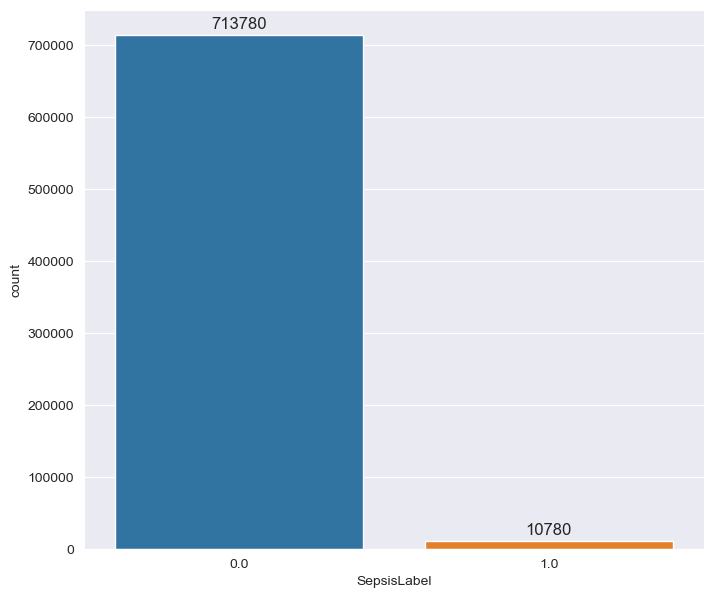

In [9]:
plt.figure(figsize=(8, 7))
sns.set_style('darkgrid')
plots=sns.countplot(data=complete_dataset,x='SepsisLabel')

for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height()),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel='Model'
plt.ylabel="Values"
plt.show()

In [11]:
pd.set_option('display.max_columns', None)
complete_dataset.describe()

patient_id             HR          O2Sat           Temp  \
count  724560.000000  669785.000000  654338.000000  258325.000000   
mean    10029.236141      84.141905      97.117749      36.926076   
std      5774.912260      17.724160       2.964618       0.755826   
min         1.000000      20.000000      20.000000      30.000000   
25%      5049.000000      71.500000      96.000000      36.500000   
50%     10057.000000      83.000000      98.000000      36.900000   
75%     15000.000000      95.000000      99.500000      37.400000   
max     20000.000000     211.000000     100.000000      50.000000   

                 SBP            MAP            DBP           Resp  \
count  655931.000000  649583.000000  655738.000000  600918.000000   
mean      126.598433      86.367137      66.234002      18.670780   
std        24.533018      16.774449      14.237016       4.720294   
min        20.000000      30.000000      20.000000       1.000000   
25%       109.000000      74.500000      56.000000      16.000000   
50%       124.000000      84.000000      65.000000      18.000000   
75%       142.000000      96.000000      74.000000      21.000000   
max       300.000000     300.000000     300.000000     100.000000   

        BaseExcess         HCO3          FiO2            pH         PaCO2  \
count  1764.000000  1411.000000  17210.000000  16958.000000  17013.000000   
mean     -2.669218    23.219064      0.741160      7.371941     40.434274   
std       4.185396     3.259499     30.492778      0.087226     10.275617   
min     -23.200000     7.700000    -50.000000      6.710000     12.000000   
25%      -4.900000    21.450000      0.400000      7.320000     34.700000   
50%      -2.400000    23.400000      0.400000      7.380000     39.000000   
75%      -0.200000    25.100000      0.600000      7.430000     44.000000   
max      14.200000    36.400000   4000.000000      7.710000    100.000000   

               SaO2           AST           BUN  Alkalinephos       Calcium  \
count  14401.000000  13363.000000  42092.000000  13409.000000  52013.000000   
mean      96.566468    175.322345     23.254858     92.404542      6.983445   
std        3.729406    658.974827     19.728496     89.132038      3.020360   
min       23.000000      5.000000      1.000000     11.000000      1.000000   
25%       95.700000     20.000000     11.000000     52.000000      7.200000   
50%       97.500000     32.000000     17.000000     70.000000      8.200000   
75%       98.700000     72.000000     28.000000    101.000000      8.700000   
max      100.000000   9961.000000    268.000000   1650.000000     27.900000   

          Chloride    Creatinine  Bilirubin_direct        Glucose  \
count  4689.000000  42129.000000       1808.000000  168860.000000   
mean    106.709533      1.643156          1.000647     138.834415   
std       4.887927      2.093640          2.605068      51.056803   
min      74.000000      0.200000          0.010000      13.000000   
25%     104.000000      0.750000          0.100000     108.000000   
50%     107.000000      0.990000          0.200000     128.000000   
75%     110.000000      1.510000          0.682500     155.000000   
max     124.000000     41.900000         30.000000     891.000000   

            Lactate     Magnesium     Phosphate     Potassium  \
count  14303.000000  36470.000000  22405.000000  58689.000000   
mean       2.983441      2.069061      3.465291      4.097532   
std        2.833047      0.410227      1.379109      0.653848   
min        0.400000      0.500000      0.600000      1.300000   
25%        1.330000      1.800000      2.600000      3.700000   
50%        1.970000      2.000000      3.300000      4.000000   
75%        3.430000      2.200000      4.000000      4.400000   
max       22.250000      9.800000     15.500000     15.800000   

       Bilirubin_total     TroponinI           Hct           Hgb          PTT  \
count     13448.000000  13816.000000  44375.000000  44770.000000  7393.

In [11]:
df2=complete_dataset.drop(['Unit1','Unit2','patient_id','HospAdmTime','ICULOS','AST','Alkalinephos','Bilirubin_direct','Bilirubin_total','Fibrinogen','TroponinI'],axis=1)

In [12]:
df2.shape

(724560, 30)

<AxesSubplot:>

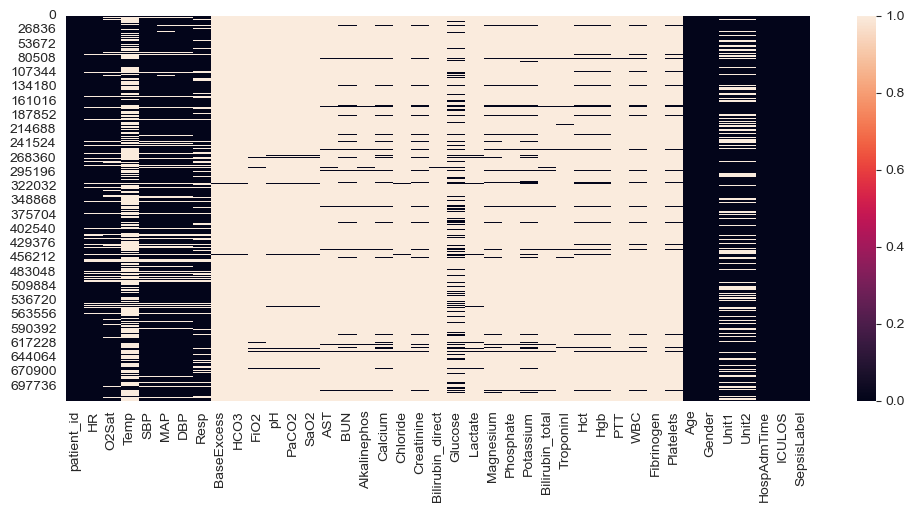

In [10]:
plt.figure(figsize=(12, 5))
sns.heatmap(complete_dataset.isnull())

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724560 entries, 0 to 724559
Data columns (total 30 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   HR           669785 non-null  float64
 1   O2Sat        654338 non-null  float64
 2   Temp         258325 non-null  float64
 3   SBP          655931 non-null  float64
 4   MAP          649583 non-null  float64
 5   DBP          655738 non-null  float64
 6   Resp         600918 non-null  float64
 7   BaseExcess   1764 non-null    float64
 8   HCO3         1411 non-null    float64
 9   FiO2         17210 non-null   float64
 10  pH           16958 non-null   float64
 11  PaCO2        17013 non-null   float64
 12  SaO2         14401 non-null   float64
 13  BUN          42092 non-null   float64
 14  Calcium      52013 non-null   float64
 15  Chloride     4689 non-null    float64
 16  Creatinine   42129 non-null   float64
 17  Glucose      168860 non-null  float64
 18  Lactate      14303 non-n

In [15]:
# Clip  the values of O2Sat which are less than 69 to a random number ranging between 70 to 88
import random
for i in range(len(df2)):
    if df2.loc[i,'O2Sat']<69:
        impute=random.randint(70,88)
        df2.loc[i,'O2Sat']=impute

In [16]:
# Clip the values of MAP which are greater than 220 to a range 200 to 220
for i in range(len(df2)):
    if df2.loc[i,'MAP']>220:
        impute=random.randint(200,220)
        df2.loc[i,'MAP']=impute

In [17]:
# Clip the values of DBP which are greater than 170 to a range 160 to 170
for i in range(len(df2)):
    if df2.loc[i,'DBP']>170:
        impute=random.randint(160,170)
        df2.loc[i,'DBP']=impute

In [18]:
# Clip the values of Resp which are greater than 55 to a range between 45 to 52 and the min range is 5-6
for i in range(len(df2)):
    if df2.loc[i,'Resp']>55:
        impute=random.randint(50,55)
        df2.loc[i,'Resp']=impute
    elif df2.loc[i,'Resp']<5:
        impute=random.randint(5,8)
        df2.loc[i,'Resp']=impute

In [19]:
def sbp_dbp_mdp(df,f1,f2,f3):
    index=[]
    for i in range(len(df)):
        if str(df.loc[i,f1])!='nan' and str(df.loc[i,f2])!='nan' and str(df.loc[i,f3])=='nan':
            index.append(i)
    print(f"There are {len(index)} such indexes")
    return index

In [20]:
# Checking those feature where SBP and DBP have values but MAP is NaN
index=sbp_dbp_mdp(df2,'SBP','DBP','MAP')

There are 7364 such indexes


In [21]:
for i in index:
    df2.loc[i,'MAP']=((2*df2.loc[i,'DBP'])+df2.loc[i,'SBP'])/3

In [22]:
# Checking those feature where SBP and MAP has values but DBP is NaN
index=sbp_dbp_mdp(df2,'SBP','MAP','DBP')

There are 162 such indexes


In [23]:
for i in index:
    df2.loc[i,'DBP']=((3*df2.loc[i,'MAP'])-df2.loc[i,'SBP'])/2

In [24]:
# Checking those feature where DBP and MAP has values but SBP is NaN
index=sbp_dbp_mdp(df2,'DBP','MAP','SBP')

There are 29 such indexes


In [25]:
for i in index:
    df2.loc[i,'SBP']=3*df2.loc[i,'MAP']-2*df2.loc[i,'DBP']

In [26]:
# Checking the number of columns where all the 3 feature values are missing (i.e SBP,MAP and DBP)
counter=0
for i in range(len(df2)):
    if str(df2.loc[i,'SBP'])=='nan' and str(df2.loc[i,'DBP'])=='nan' and str(df2.loc[i,'MAP'])=='nan':
        counter+=1
print(f"There are {counter} such records")

There are 67533 such records


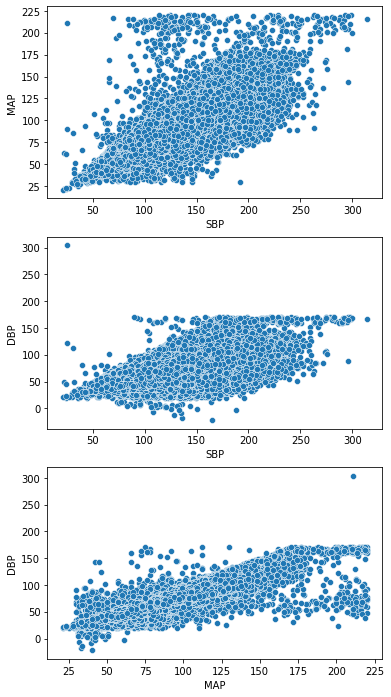

In [27]:
plt.figure(figsize=(6, 12))

plt.subplot(3, 1, 1)
sns.scatterplot(x='SBP',y='MAP',data=df2[['SBP','MAP']])
plt.xlabel("SBP")
plt.ylabel('MAP')

plt.subplot(3, 1, 2)
sns.scatterplot(x='SBP',y='DBP',data=df2[['SBP','DBP']])
plt.xlabel("SBP")
plt.ylabel('DBP')

plt.subplot(3, 1, 3)
sns.scatterplot(x='MAP',y='DBP',data=df2[['DBP','MAP']])
plt.xlabel("MAP")
plt.ylabel('DBP')

plt.show()

In [28]:
df2.describe()

HR          O2Sat           Temp            SBP  \
count  669785.000000  654338.000000  258325.000000  655960.000000   
mean       84.141905      97.132396      36.926076     126.598853   
std        17.724160       2.791549       0.755826      24.534865   
min        20.000000      69.000000      30.000000      20.000000   
25%        71.500000      96.000000      36.500000     109.000000   
50%        83.000000      98.000000      36.900000     124.000000   
75%        95.000000      99.500000      37.400000     142.000000   
max       211.000000     100.000000      50.000000     314.000000   

                 MAP            DBP           Resp   BaseExcess         HCO3  \
count  656947.000000  655900.000000  600918.000000  1764.000000  1411.000000   
mean       86.389823      66.215743      18.679752    -2.669218    23.219064   
std        16.630921      14.113466       4.626991     4.185396     3.259499   
min        21.000000     -21.500000       5.000000   -23.200000     7.700000   
25%        75.000000      56.000000      16.000000    -4.900000    21.450000   
50%        84.000000      65.000000      18.000000    -2.400000    23.400000   
75%        96.000000      74.000000      21.000000    -0.200000    25.100000   
max       220.000000     304.000000      55.000000    14.200000    36.400000   

               FiO2            pH         PaCO2          SaO2           BUN  \
count  17210.000000  16958.000000  17013.000000  14401.000000  42092.000000   
mean       0.741160      7.371941     40.434274     96.566468     23.254858   
std       30.492778      0.087226     10.275617      3.729406     19.728496   
min      -50.000000      6.710000     12.000000     23.000000      1.000000   
25%        0.400000      7.320000     34.700000     95.700000     11.000000   
50%        0.400000      7.380000     39.000000     97.500000     17.000000   
75%        0.600000      7.430000     44.000000     98.700000     28.000000   
max     4000.000000      7.710000    100.000000    100.000000    268.000000   

            Calcium     Chloride    Creatinine        Glucose       Lactate  \
count  52013.000000  4689.000000  42129.000000  168860.000000  14303.000000   
mean       6.983445   106.709533      1.643156     138.834415      2.983441   
std        3.020360     4.887927      2.093640      51.056803      2.833047   
min        1.000000    74.000000      0.200000      13.000000      0.400000   
25%        7.200000   104.000000      0.750000     108.000000      1.330000   
50%        8.200000   107.000000      0.990000     128.000000      1.970000   
75%        8.700000   110.000000      1.510000     155.000000      3.430000   
max       27.900000   124.000000     41.900000     891.000000     22.250000   

          Magnesium     Phosphate     Potassium           Hct           Hgb  \
count  36470.000000  22405.000000  58689.000000  44375.000000  44770.000000   
mean       2.069061      3.465291      4.097532     31.044062     10.195036   
std        0.410227      1.379109      0.653848      6.594169      2.252608   
min        0.500000      0.600000      1.300000      9.100000      2.300000   
25%        1.800000      2.600000      3.700000     26.000000      8.500000   
50%        2.000000      3.300000      4.000000     30.500000      9.900000   
75%        2.200000      4.000000      4.400000     35.700000     11.700000   
max        9.800000     15.500000     15.800000     70.200000     30.000000   

               PTT           WBC     Platelets            Age         Gender  \
count  7393.000000  40099.000000  40710.000000  724560.000000  724560.000000   
mean     43.558968     10.720893    191.454864      61.080726       0.545175   
std      35.594285      7.918227     95.879617      16.582070       0.497955   
min      20.000000      0.100000      1.000000      14.000000       0.000000   
25%      28.500000      7.000000    126.000000      51.000000       0.000000   
50%      32.300000      9.600000    180.000000      63.0000

##### There are 9 DBP records where the value is negative.

In [29]:
df2[df2['DBP']<0].shape

(9, 30)

In [30]:
neg_dbp=df2[df2['DBP']<0]
pd.set_option ("display.max_rows", None)
neg_dbp[['SBP','MAP','DBP']]

SBP   MAP   DBP
128302  150.0  49.0  -1.5
161842  108.0  32.0  -6.0
164940  136.0  33.0 -18.5
307943  135.5  39.5  -8.5
307944  164.5  40.5 -21.5
431907  125.0  41.0  -1.0
636273  128.0  34.0 -13.0
662710  133.0  42.0  -3.5
698101  188.0  61.0  -2.5

In [31]:
# For the negative DBP values change the corresponding MAP values to a range between 70-110
for index in neg_dbp.index:
    if df2.loc[index,'MAP']<80:
        imputer=random.randint(70,110)
        df2.loc[index,'DBP']=imputer
    elif df2.loc[index,'MAP']>80:
        imputer=random.randint(100,110)
        df2.loc[index,'DBP']=imputer

In [32]:
df2[df2['DBP']<10].shape

(22, 30)

In [33]:
for i in range(len(df2)):
    if df2.loc[i,'DBP']<=10:
        impute=random.randint(12,20)
        df2.loc[i,'DBP']=impute

In [34]:
df2[df2['DBP']>180].shape

(1, 30)

In [35]:
for i in range(len(df2)):
    if df2.loc[i,'DBP']>180:
        impute=random.randint(170,180)
        df2.loc[i,'DBP']=impute

In [36]:
df2.describe()

HR          O2Sat           Temp            SBP  \
count  669785.000000  654338.000000  258325.000000  655960.000000   
mean       84.141905      97.132396      36.926076     126.598853   
std        17.724160       2.791549       0.755826      24.534865   
min        20.000000      69.000000      30.000000      20.000000   
25%        71.500000      96.000000      36.500000     109.000000   
50%        83.000000      98.000000      36.900000     124.000000   
75%        95.000000      99.500000      37.400000     142.000000   
max       211.000000     100.000000      50.000000     314.000000   

                 MAP            DBP           Resp   BaseExcess         HCO3  \
count  656947.000000  655900.000000  600918.000000  1764.000000  1411.000000   
mean       86.389823      66.217214      18.679752    -2.669218    23.219064   
std        16.630921      14.107470       4.626991     4.185396     3.259499   
min        21.000000      10.500000       5.000000   -23.200000     7.700000   
25%        75.000000      56.000000      16.000000    -4.900000    21.450000   
50%        84.000000      65.000000      18.000000    -2.400000    23.400000   
75%        96.000000      74.000000      21.000000    -0.200000    25.100000   
max       220.000000     176.000000      55.000000    14.200000    36.400000   

               FiO2            pH         PaCO2          SaO2           BUN  \
count  17210.000000  16958.000000  17013.000000  14401.000000  42092.000000   
mean       0.741160      7.371941     40.434274     96.566468     23.254858   
std       30.492778      0.087226     10.275617      3.729406     19.728496   
min      -50.000000      6.710000     12.000000     23.000000      1.000000   
25%        0.400000      7.320000     34.700000     95.700000     11.000000   
50%        0.400000      7.380000     39.000000     97.500000     17.000000   
75%        0.600000      7.430000     44.000000     98.700000     28.000000   
max     4000.000000      7.710000    100.000000    100.000000    268.000000   

            Calcium     Chloride    Creatinine        Glucose       Lactate  \
count  52013.000000  4689.000000  42129.000000  168860.000000  14303.000000   
mean       6.983445   106.709533      1.643156     138.834415      2.983441   
std        3.020360     4.887927      2.093640      51.056803      2.833047   
min        1.000000    74.000000      0.200000      13.000000      0.400000   
25%        7.200000   104.000000      0.750000     108.000000      1.330000   
50%        8.200000   107.000000      0.990000     128.000000      1.970000   
75%        8.700000   110.000000      1.510000     155.000000      3.430000   
max       27.900000   124.000000     41.900000     891.000000     22.250000   

          Magnesium     Phosphate     Potassium           Hct           Hgb  \
count  36470.000000  22405.000000  58689.000000  44375.000000  44770.000000   
mean       2.069061      3.465291      4.097532     31.044062     10.195036   
std        0.410227      1.379109      0.653848      6.594169      2.252608   
min        0.500000      0.600000      1.300000      9.100000      2.300000   
25%        1.800000      2.600000      3.700000     26.000000      8.500000   
50%        2.000000      3.300000      4.000000     30.500000      9.900000   
75%        2.200000      4.000000      4.400000     35.700000     11.700000   
max        9.800000     15.500000     15.800000     70.200000     30.000000   

               PTT           WBC     Platelets            Age         Gender  \
count  7393.000000  40099.000000  40710.000000  724560.000000  724560.000000   
mean     43.558968     10.720893    191.454864      61.080726       0.545175   
std      35.594285      7.918227     95.879617      16.582070       0.497955   
min      20.000000      0.100000      1.000000      14.000000       0.000000   
25%      28.500000      7.000000    126.000000      51.000000       0.000000   
50%      32.300000      9.600000    180.000000      63.0000

In [37]:
df2.isnull().sum()

HR              54775
O2Sat           70222
Temp           466235
SBP             68600
MAP             67613
DBP             68660
Resp           123642
BaseExcess     722796
HCO3           723149
FiO2           707350
pH             707602
PaCO2          707547
SaO2           710159
BUN            682468
Calcium        672547
Chloride       719871
Creatinine     682431
Glucose        555700
Lactate        710257
Magnesium      688090
Phosphate      702155
Potassium      665871
Hct            680185
Hgb            679790
PTT            717167
WBC            684461
Platelets      683850
Age                 0
Gender              0
SepsisLabel         0
dtype: int64

In [38]:
df3=df2.copy()

In [39]:
import miceforest as mf

In [252]:
import pickle
kernel=pickle.load(open("Mice_kernal.pkl",'rb'))

In [253]:
# print(kernel)

              Class: ImputationKernel
           Datasets: 5
         Iterations: 8
  Imputed Variables: 27
save_all_iterations: True


In [48]:
# df4 = kernel.impute_new_data(new_data=df3)

In [61]:
# type(df4.complete_data(0))

pandas.core.frame.DataFrame

C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\miceforest\ImputedData.py:662: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(plotrows, plotcols, squeeze=False)


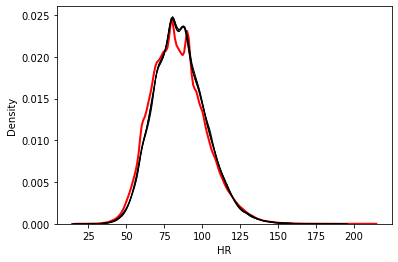

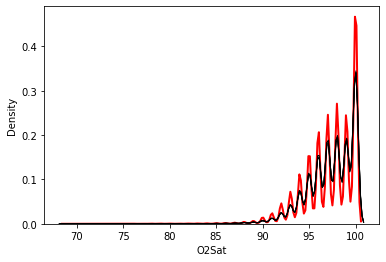

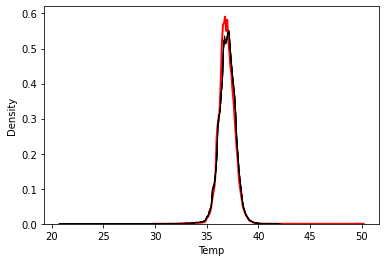

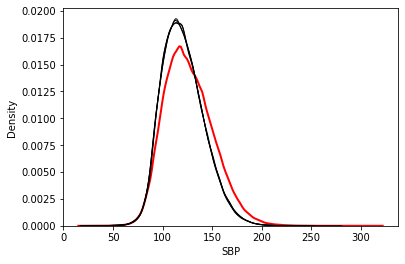

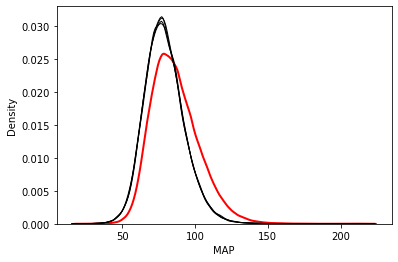

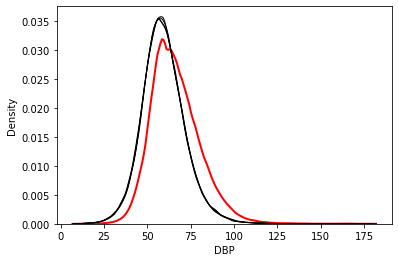

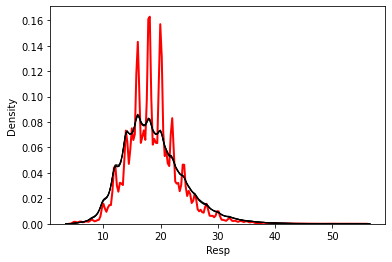

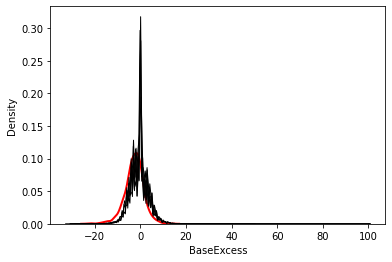

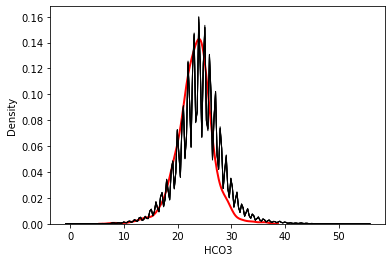

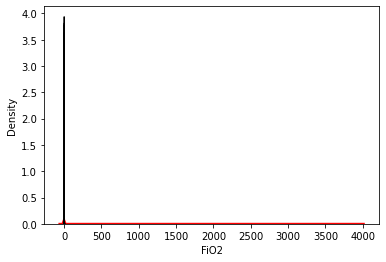

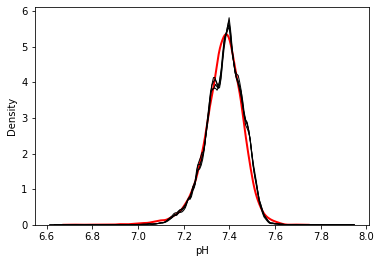

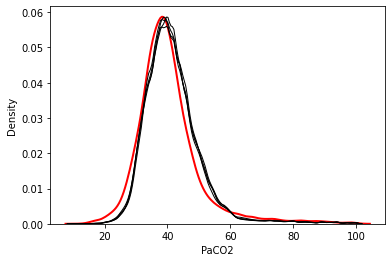

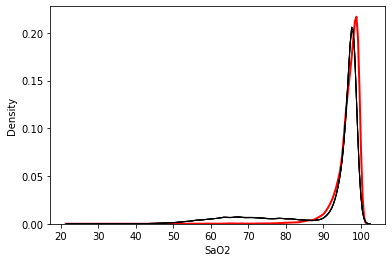

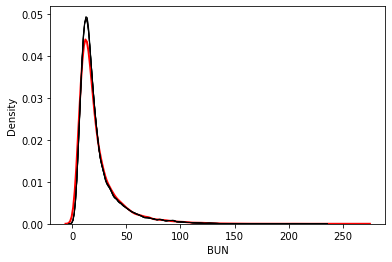

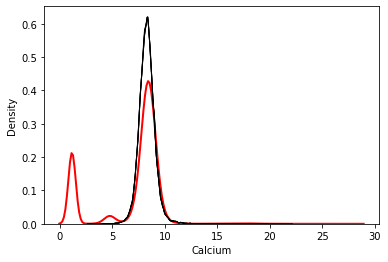

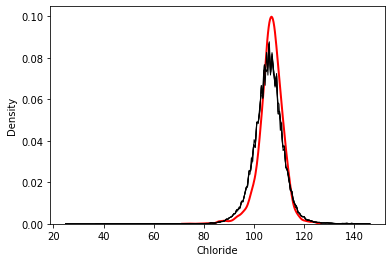

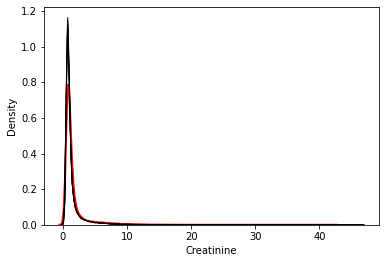

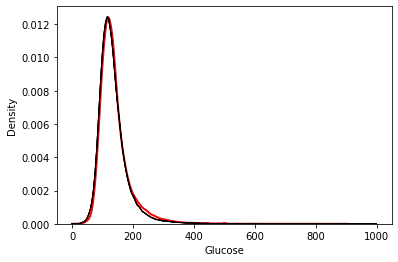

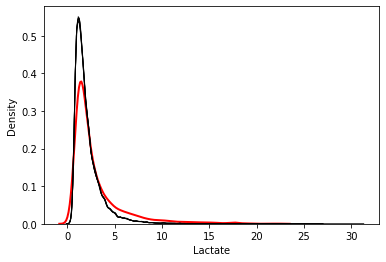

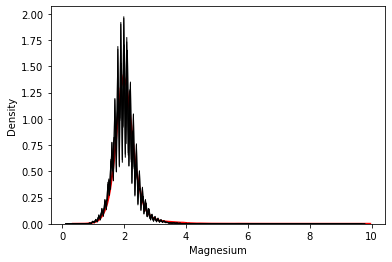

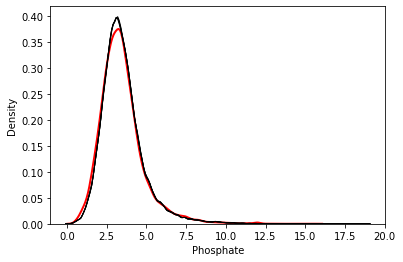

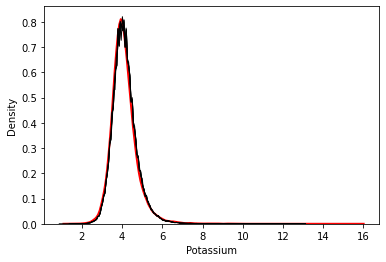

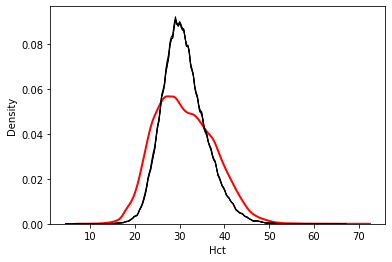

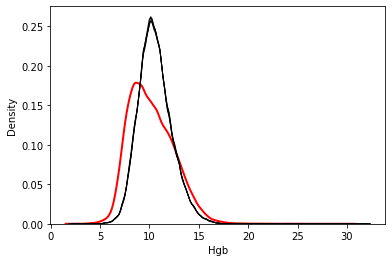

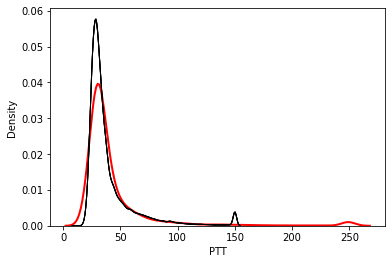

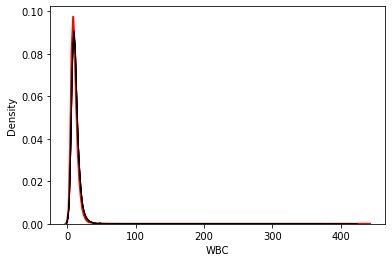

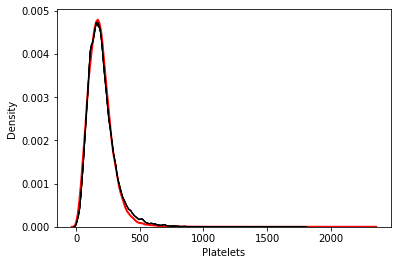

In [62]:
# for feature in df2.columns:
#     if feature not in ['Age','Gender','SepsisLabel']:
#         df4.plot_imputed_distributions(wspace=0.3,hspace=0.3,variables=[feature])

C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\miceforest\ImputedData.py:608: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(plotrows, plotcols, squeeze=False)


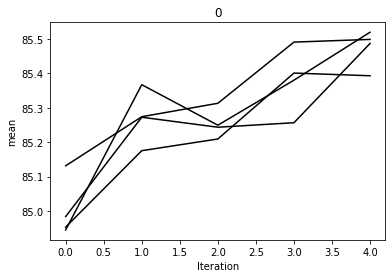

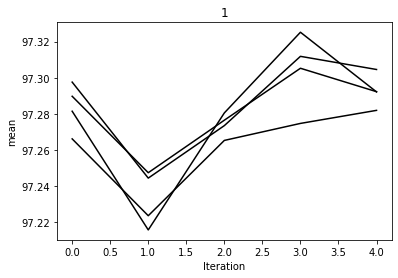

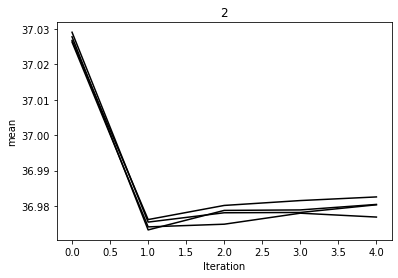

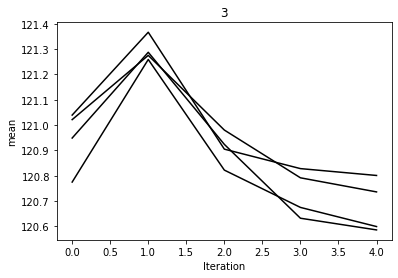

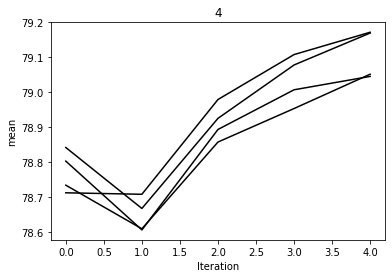

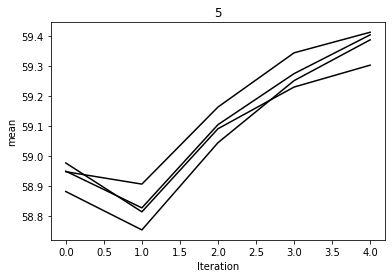

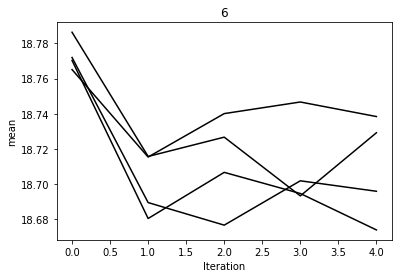

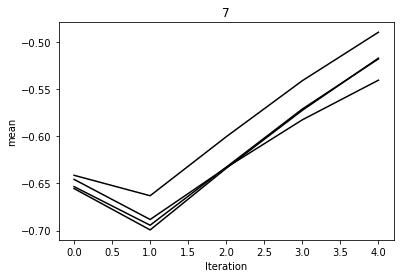

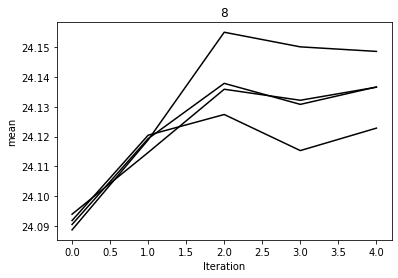

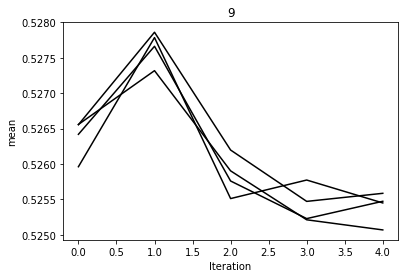

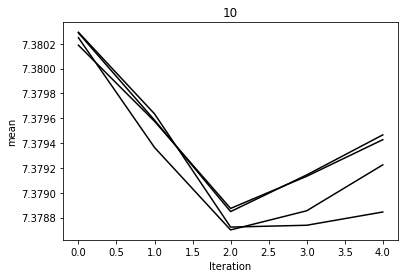

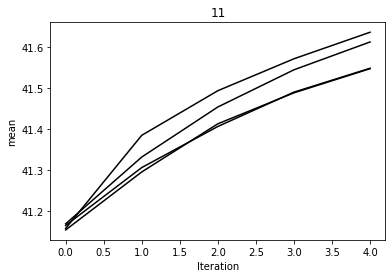

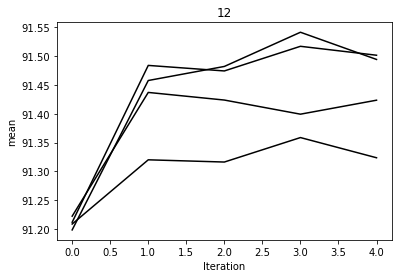

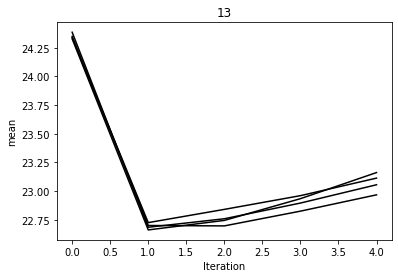

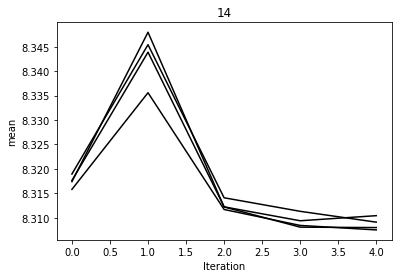

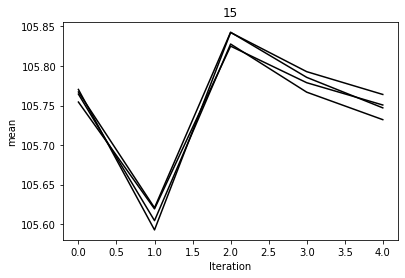

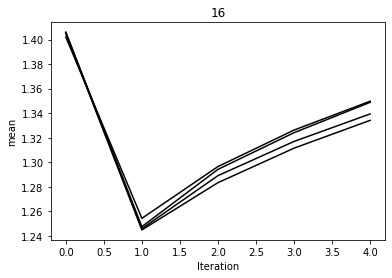

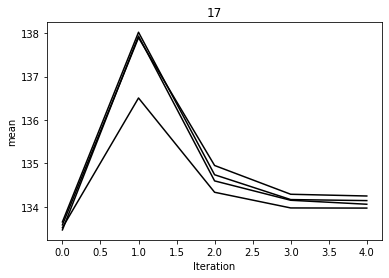

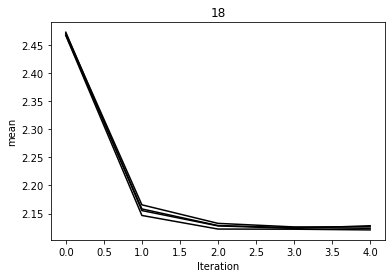

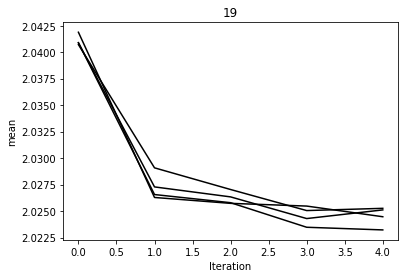

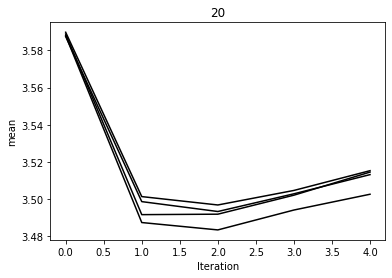

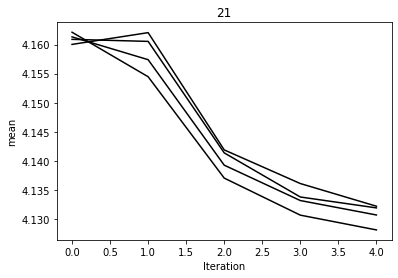

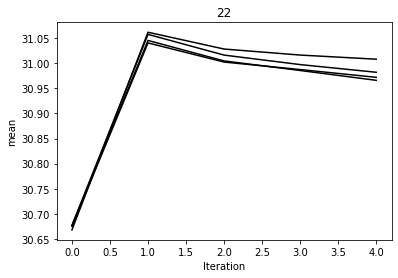

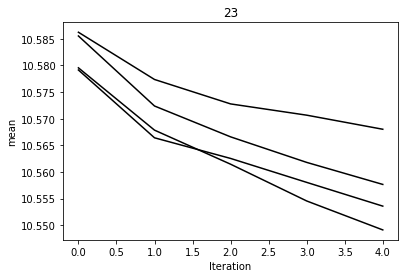

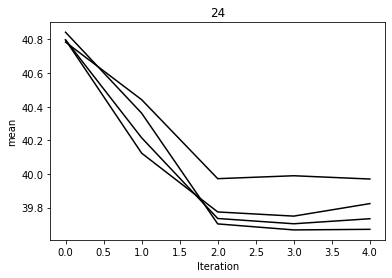

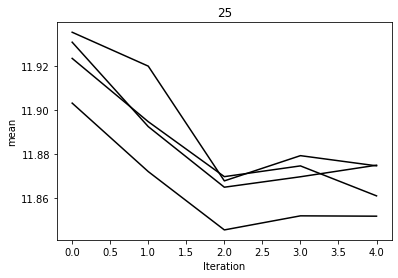

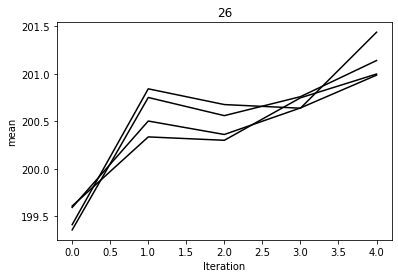

In [63]:
# for feature in df2.columns:
#     if feature not in ['Age','Gender','SepsisLabel']:
#         df4.plot_mean_convergence(wspace=0.3,hspace=0.3,variables=[feature])

In [40]:
# new approach
# Create kernel. 
kernel = mf.ImputationKernel(
  df3,
  datasets=5,
  save_all_iterations=True,
  random_state=15
)

# Run the MICE algorithm for 4 iterations on each of the datasets
kernel.mice(8)

# Printing the kernel will show you some high level information.
print(kernel)

              Class: ImputationKernel
           Datasets: 5
         Iterations: 8
  Imputed Variables: 27
save_all_iterations: True


In [41]:
clean_data = kernel.complete_data(dataset=0, inplace=False)

In [42]:
type(clean_data)

pandas.core.frame.DataFrame

In [69]:
clean_data.isnull().sum()

HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
BaseExcess     0
HCO3           0
FiO2           0
pH             0
PaCO2          0
SaO2           0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Lactate        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
SepsisLabel    0
SIRS           0
dtype: int64

In [68]:
clean_data=clean_data.drop('Unnamed: 0',axis=1)

C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\miceforest\ImputedData.py:662: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(plotrows, plotcols, squeeze=False)


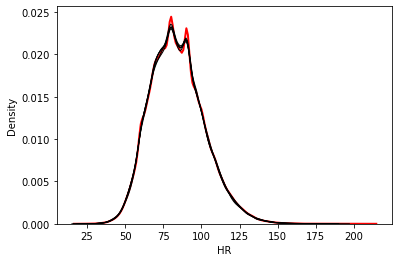

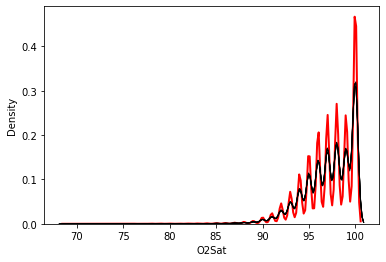

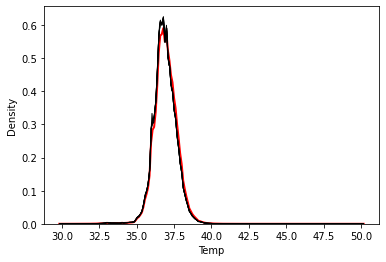

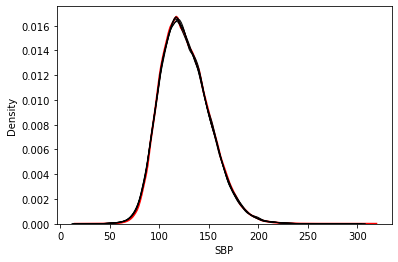

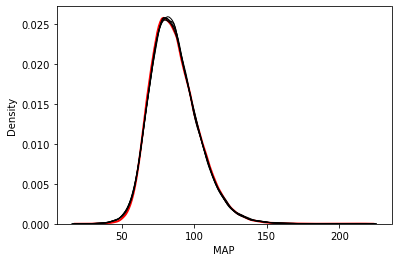

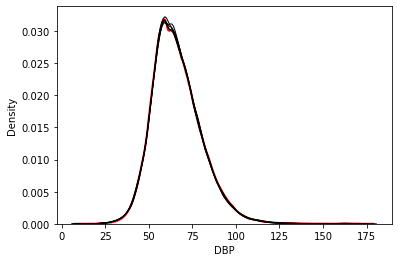

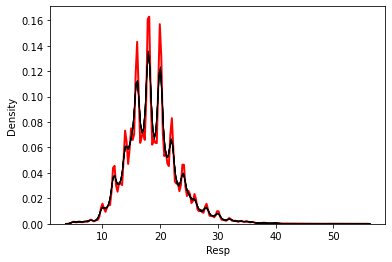

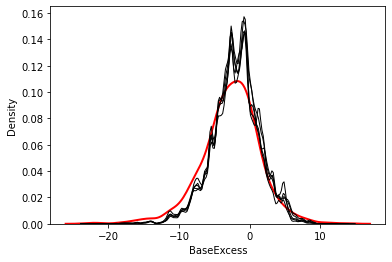

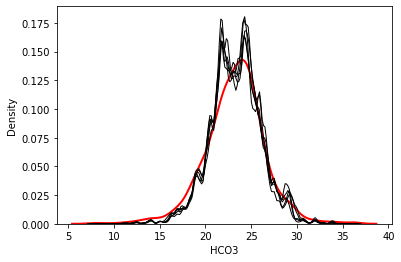

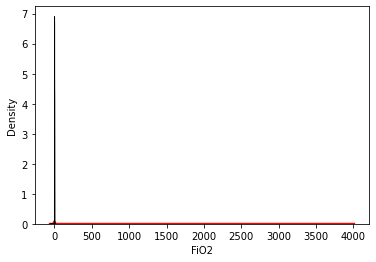

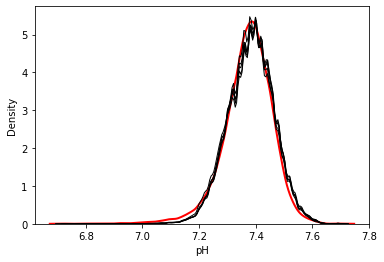

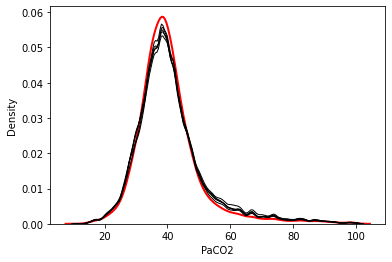

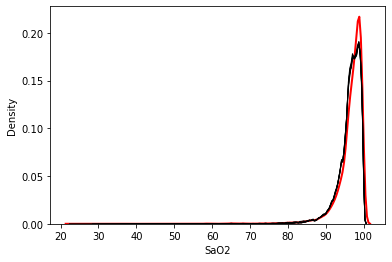

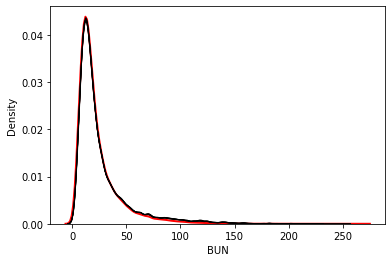

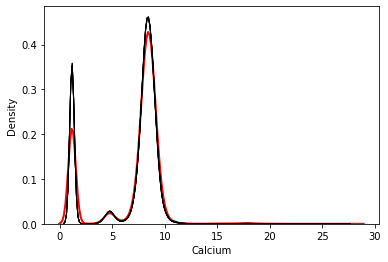

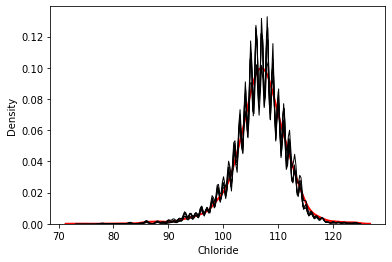

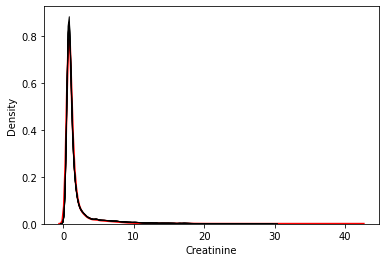

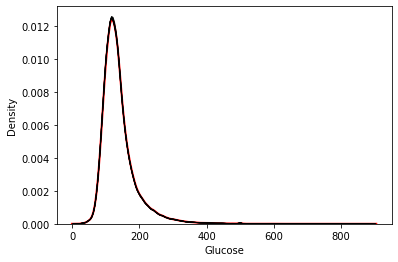

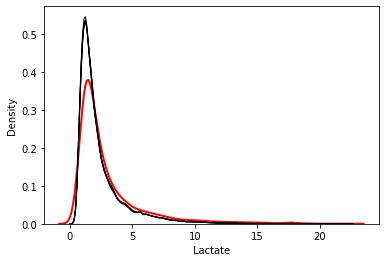

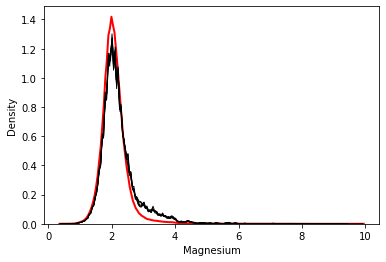

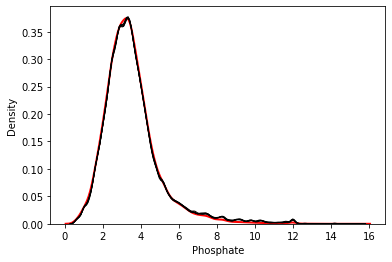

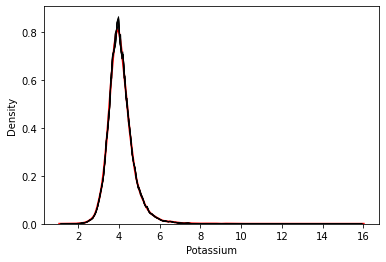

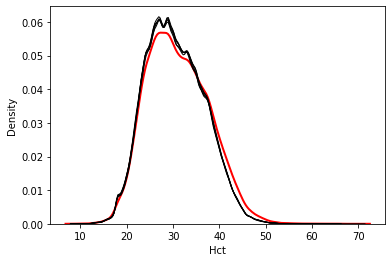

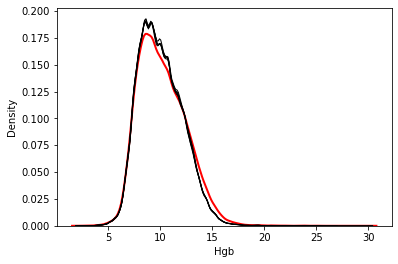

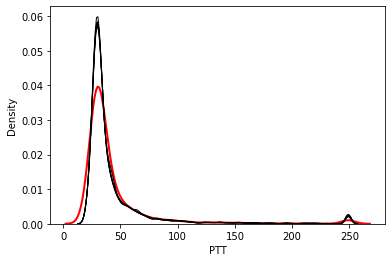

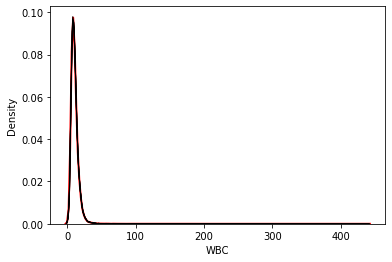

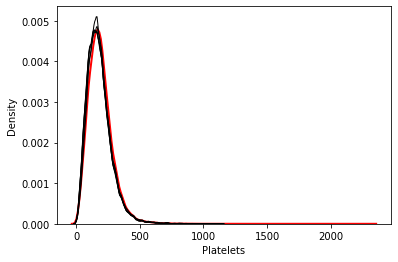

In [44]:
for feature in df2.columns:
    if feature not in ['Age','Gender','SepsisLabel']:
        kernel.plot_imputed_distributions(wspace=0.3,hspace=0.3,variables=[feature])

C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\miceforest\ImputedData.py:608: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(plotrows, plotcols, squeeze=False)


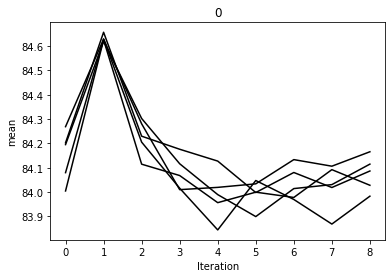

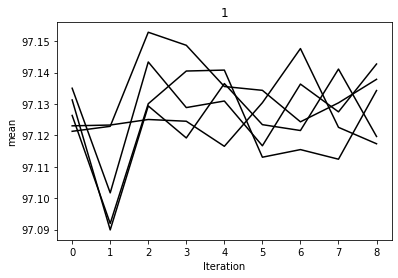

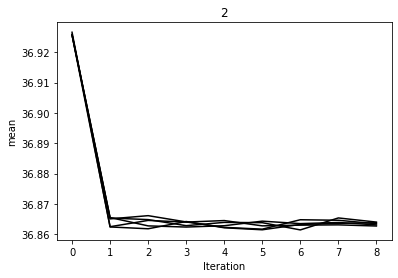

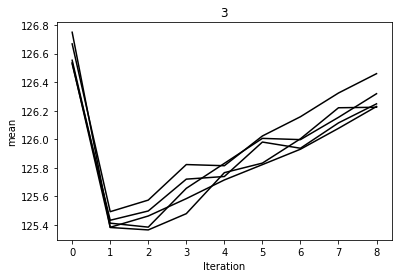

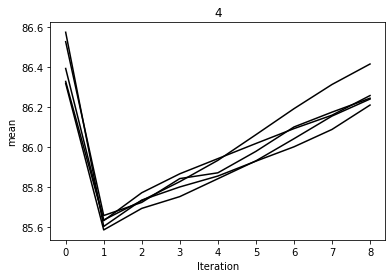

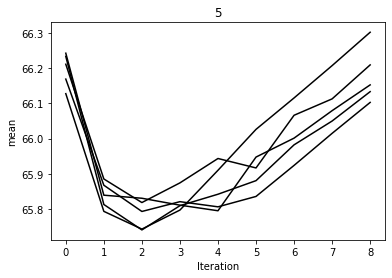

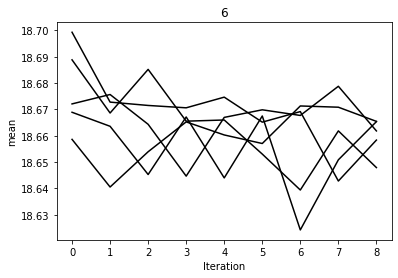

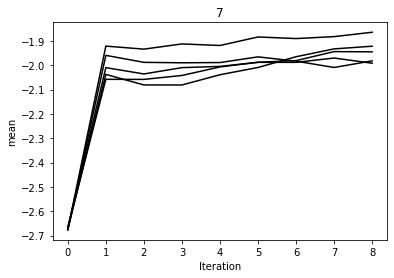

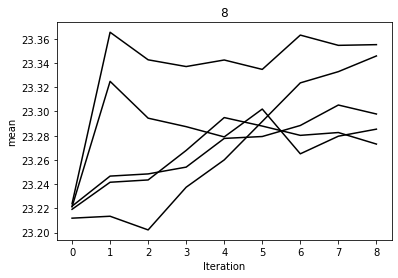

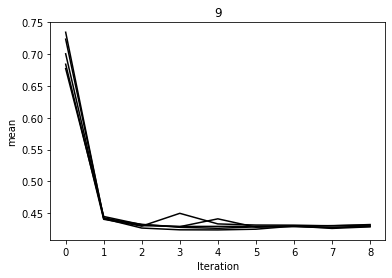

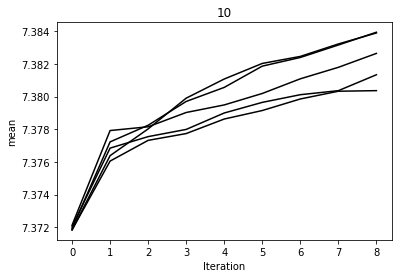

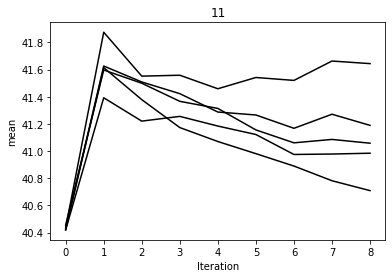

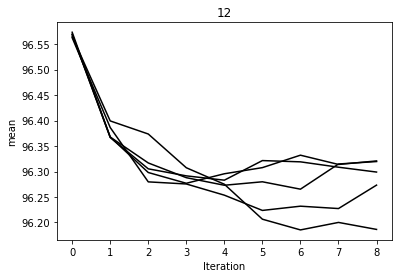

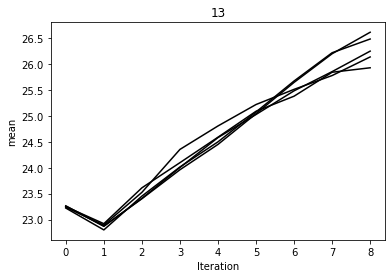

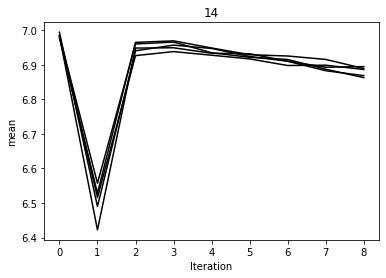

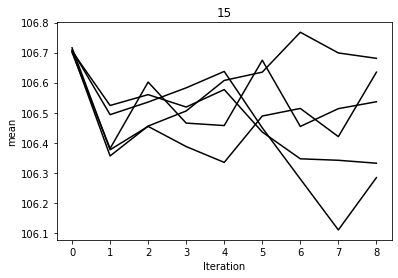

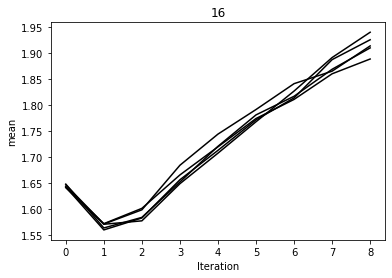

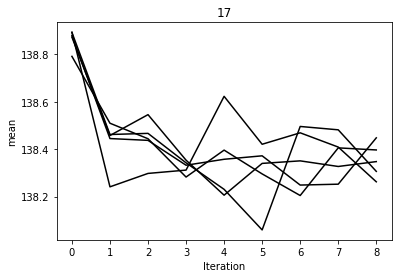

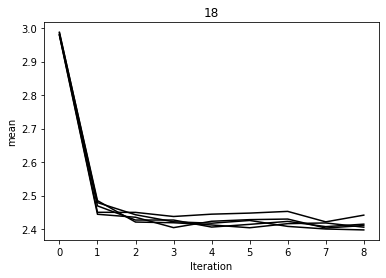

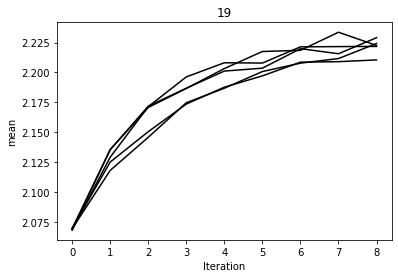

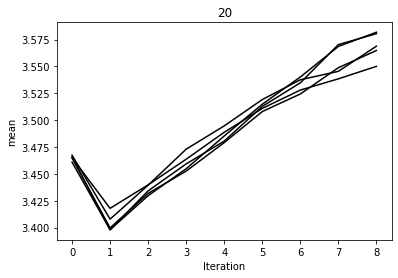

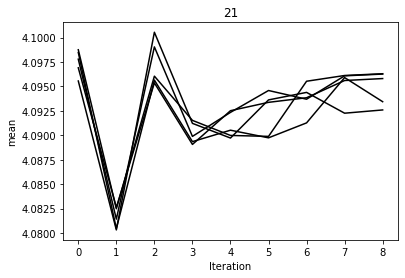

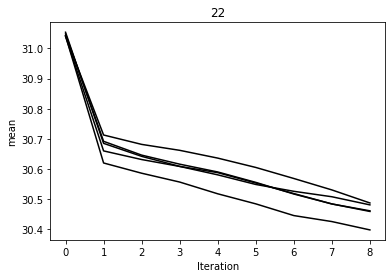

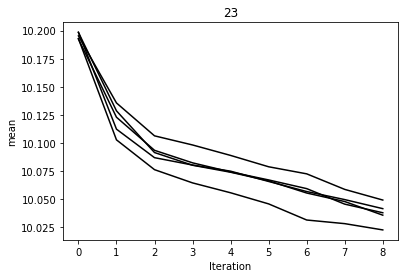

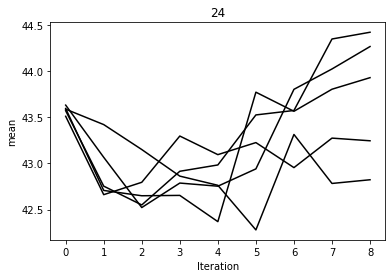

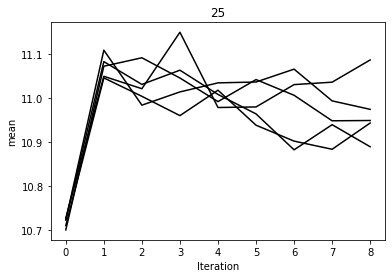

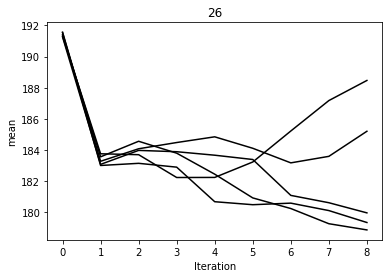

In [45]:
for feature in df2.columns:
    if feature not in ['Age','Gender','SepsisLabel']:
        kernel.plot_mean_convergence(wspace=0.3, hspace=0.4,variables=[feature])

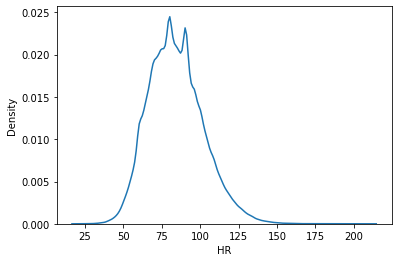

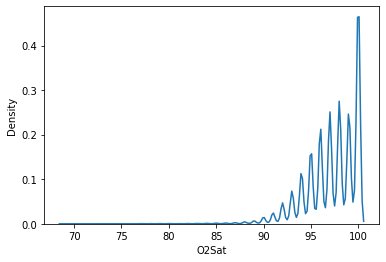

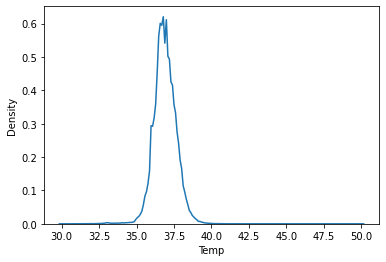

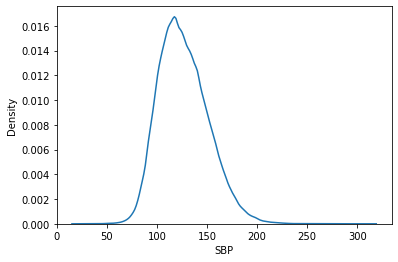

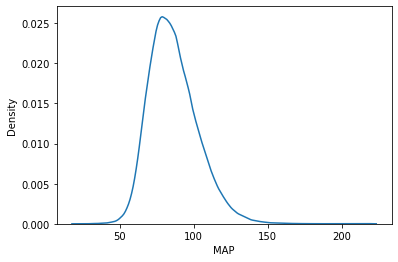

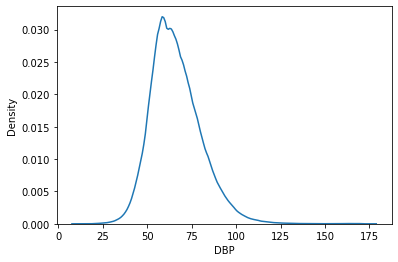

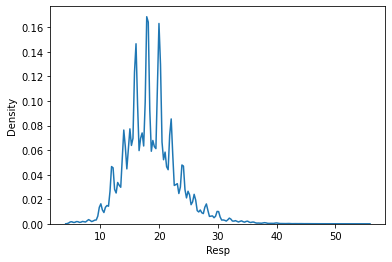

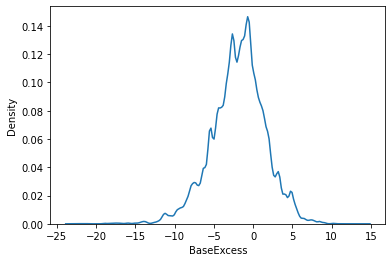

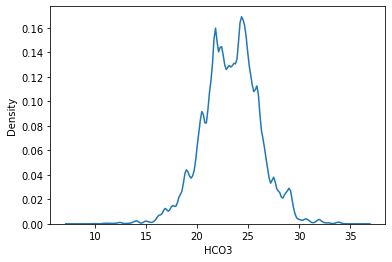

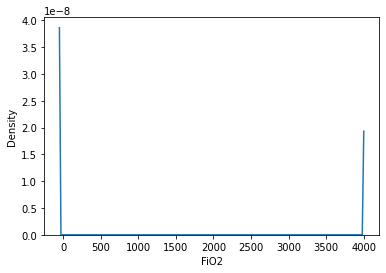

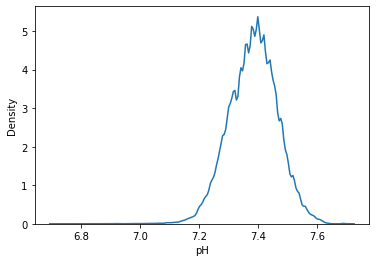

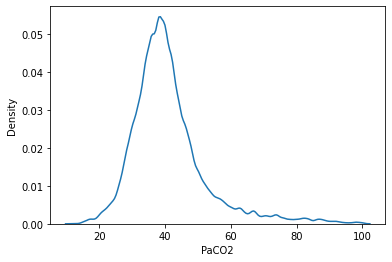

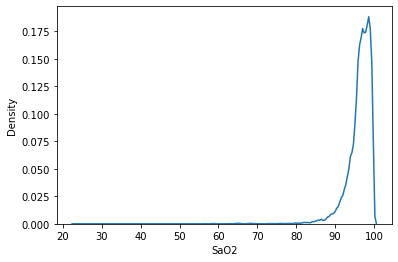

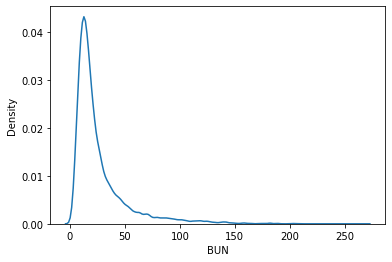

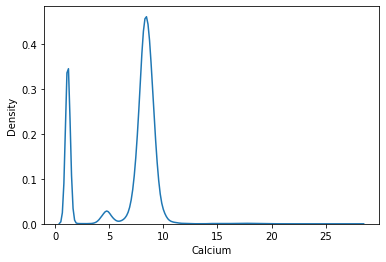

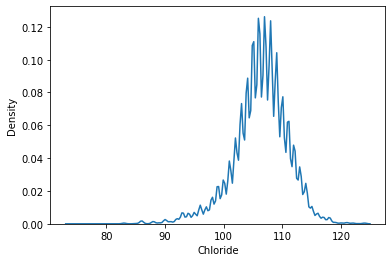

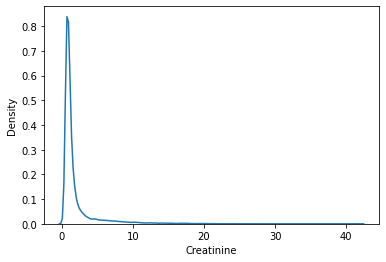

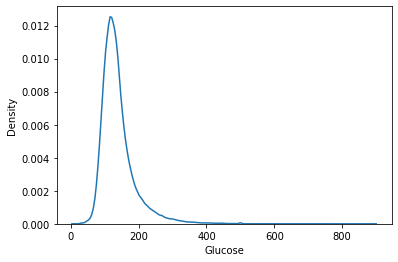

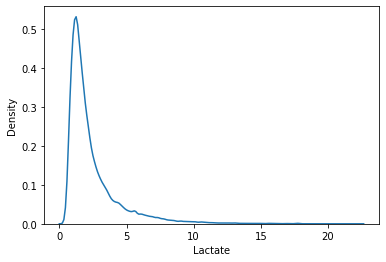

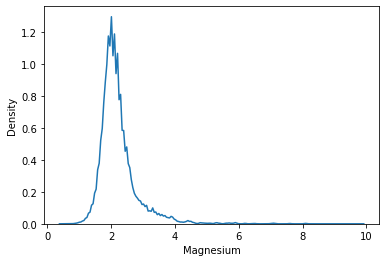

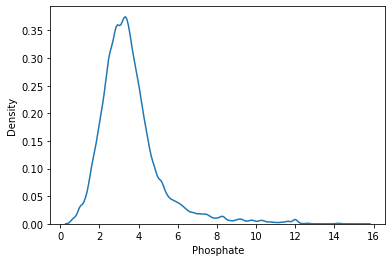

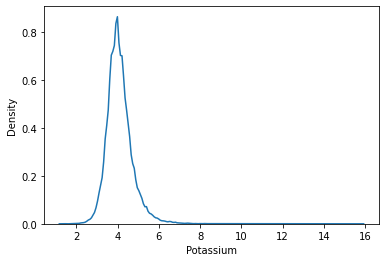

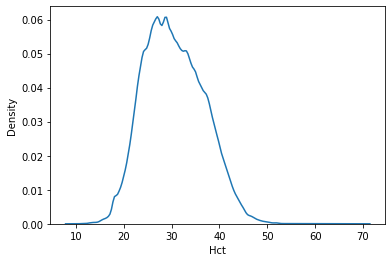

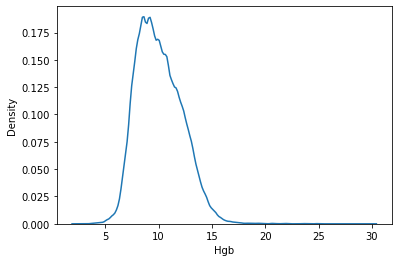

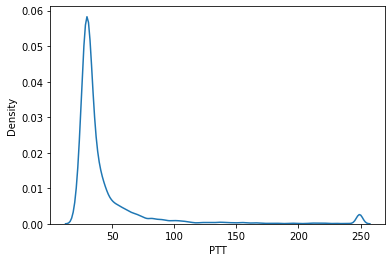

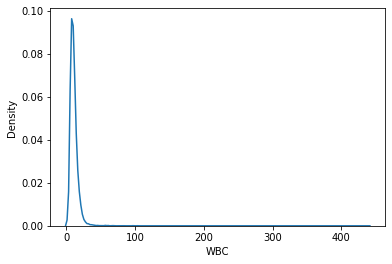

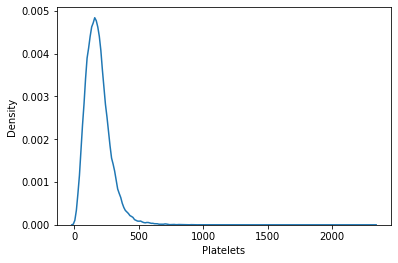

In [46]:
for feature in df2.columns:
    if feature not in ['Age','Gender','SepsisLabel']:
        sns.kdeplot(clean_data[feature])
        plt.show()

In [152]:
# df5=df4.complete_data(0)

In [153]:
# df5.isnull().sum()

HR             0
O2Sat          0
Temp           0
SBP            0
MAP            0
DBP            0
Resp           0
BaseExcess     0
HCO3           0
FiO2           0
pH             0
PaCO2          0
SaO2           0
BUN            0
Calcium        0
Chloride       0
Creatinine     0
Glucose        0
Lactate        0
Magnesium      0
Phosphate      0
Potassium      0
Hct            0
Hgb            0
PTT            0
WBC            0
Platelets      0
Age            0
Gender         0
SepsisLabel    0
dtype: int64

In [72]:
# df5.describe()

HR  O2Sat  Temp    SBP   MAP   DBP  Resp  BaseExcess   HCO3  FiO2    pH  \
0  71.0   93.5  36.6  152.0  98.0  66.0  19.0        -1.0  24.35  0.40  7.37   
1  93.0   92.5  35.6  110.0  76.0  56.0  22.0         0.3  24.50  0.40  7.50   
2  91.0   96.0  37.1  108.0  84.5  72.0  23.5        -7.2  19.50  0.40  7.37   
3  93.0   98.0  36.6  123.0  87.0  61.0  21.0        -2.4  22.25  0.21  7.52   
4  93.0   95.0  37.0  110.0  81.0  70.0  20.0        -6.4  19.80  0.44  7.36   

   PaCO2  SaO2   BUN  Calcium  Chloride  Creatinine  Glucose  Lactate  \
0   49.0  95.9  17.0     7.80     111.0        0.95    126.0     2.02   
1   27.2  93.7  16.0     1.05     110.0        1.05    112.0     2.40   
2   30.0  97.5  32.0     8.30     113.5        0.84    233.0     1.82   
3   21.9  95.6  12.0     9.00     108.0        1.05    128.0     4.78   
4   28.2  99.1  18.0     8.20     107.0        0.63    266.0     4.61   

   Magnesium  Phosphate  Potassium   Hct   Hgb   PTT   WBC  Platelets   Age  \
0        2.1        2.8        4.6  35.0  11.4  37.3   7.8      105.0  73.0   
1        2.3        6.3        3.7  25.6   8.7  38.0  14.9       27.0  73.0   
2        2.0        3.4        4.2  35.8  11.4  28.7  12.7      224.0  73.0   
3        1.7        3.4        3.3  26.3   8.4  29.0   5.5      178.0  73.0   
4        1.9        2.1        4.7  43.7  13.9  33.2  11.6      256.0  73.0   

   Gender  SepsisLabel  SIRS  
0     1.0          0.0   0.0  
1     1.0          0.0   4.0  
2     1.0          0.0   3.0  
3     1.0          0.0   2.0  
4     1.0          0.0   2.0

In [122]:
# df2.describe()

HR          O2Sat           Temp            SBP  \
count  669785.000000  654338.000000  258325.000000  655960.000000   
mean       84.141905      97.132868      36.926076     126.598889   
std        17.724160       2.788350       0.755826      24.535118   
min        20.000000      69.000000      30.000000      20.000000   
25%        71.500000      96.000000      36.500000     109.000000   
50%        83.000000      98.000000      36.900000     124.000000   
75%        95.000000      99.500000      37.400000     142.000000   
max       211.000000     100.000000      50.000000     317.000000   

                 MAP            DBP           Resp   BaseExcess         HCO3  \
count  656947.000000  655900.000000  600918.000000  1764.000000  1411.000000   
mean       86.389552      66.217138      18.679856    -2.669218    23.219064   
std        16.628923      14.106617       4.627016     4.185396     3.259499   
min        21.000000      10.500000       5.000000   -23.200000     7.700000   
25%        75.000000      56.000000      16.000000    -4.900000    21.450000   
50%        84.000000      65.000000      18.000000    -2.400000    23.400000   
75%        96.000000      74.000000      21.000000    -0.200000    25.100000   
max       220.000000     179.000000      55.000000    14.200000    36.400000   

               FiO2            pH         PaCO2          SaO2           BUN  \
count  17210.000000  16958.000000  17013.000000  14401.000000  42092.000000   
mean       0.741160      7.371941     40.434274     96.566468     23.254858   
std       30.492778      0.087226     10.275617      3.729406     19.728496   
min      -50.000000      6.710000     12.000000     23.000000      1.000000   
25%        0.400000      7.320000     34.700000     95.700000     11.000000   
50%        0.400000      7.380000     39.000000     97.500000     17.000000   
75%        0.600000      7.430000     44.000000     98.700000     28.000000   
max     4000.000000      7.710000    100.000000    100.000000    268.000000   

            Calcium     Chloride    Creatinine        Glucose       Lactate  \
count  52013.000000  4689.000000  42129.000000  168860.000000  14303.000000   
mean       6.983445   106.709533      1.643156     138.834415      2.983441   
std        3.020360     4.887927      2.093640      51.056803      2.833047   
min        1.000000    74.000000      0.200000      13.000000      0.400000   
25%        7.200000   104.000000      0.750000     108.000000      1.330000   
50%        8.200000   107.000000      0.990000     128.000000      1.970000   
75%        8.700000   110.000000      1.510000     155.000000      3.430000   
max       27.900000   124.000000     41.900000     891.000000     22.250000   

          Magnesium     Phosphate     Potassium           Hct           Hgb  \
count  36470.000000  22405.000000  58689.000000  44375.000000  44770.000000   
mean       2.069061      3.465291      4.097532     31.044062     10.195036   
std        0.410227      1.379109      0.653848      6.594169      2.252608   
min        0.500000      0.600000      1.300000      9.100000      2.300000   
25%        1.800000      2.600000      3.700000     26.000000      8.500000   
50%        2.000000      3.300000      4.000000     30.500000      9.900000   
75%        2.200000      4.000000      4.400000     35.700000     11.700000   
max        9.800000     15.500000     15.800000     70.200000     30.000000   

               PTT           WBC     Platelets            Age         Gender  \
count  7393.000000  40099.000000  40710.000000  724560.000000  724560.000000   
mean     43.558968     10.720893    191.454864      61.080726       0.545175   
std      35.594285      7.918227     95.879617      16.582070       0.497955   
min      20.000000      0.100000      1.000000      14.000000       0.000000   
25%      28.500000      7.000000    126.000000      51.000000       0.000000   
50%      32.300000      9.600000    180.000000      63.0000

In [123]:
# df5.head()

HR  O2Sat   Temp    SBP   MAP   DBP  Resp  BaseExcess  HCO3  FiO2    pH  \
0  91.0   96.0  37.28   98.0  64.0  51.0  16.0         0.0  23.0  0.35  7.38   
1  93.0   92.5  36.56  110.0  76.0  56.0  22.0        -1.0  26.0  0.60  7.33   
2  91.0   96.0  37.39  108.0  84.5  72.0  23.5        -2.0  24.0  0.50  7.37   
3  93.0   98.0  37.94  123.0  87.0  61.0  21.0         3.5  22.0  0.60  7.48   
4  93.0   95.0  37.00  110.0  81.0  70.0  20.0         0.0  26.0  0.50  7.36   

   PaCO2  SaO2   BUN  Calcium  Chloride  Creatinine  Glucose  Lactate  \
0   41.0  83.0  11.0      6.8     108.0         0.8    101.0      1.5   
1   46.0  97.0  15.0      7.2     108.0         0.8    271.0      1.7   
2   38.0  96.0  14.0      7.3     109.0         0.6    233.0      2.0   
3   35.0  99.0  33.0      9.0     105.0         4.4    191.0      1.4   
4   43.0  96.0  15.0      8.1     108.0         0.9     70.0      1.3   

   Magnesium  Phosphate  Potassium   Hct   Hgb   PTT   WBC  Platelets   Age  \
0        1.4        1.6        3.9  23.9   8.2  24.4  11.7      183.0  73.0   
1        2.5        3.5        4.6  31.0  10.2  33.6   5.7      123.0  73.0   
2        1.6        2.3        3.7  31.9  11.2  25.0  13.5      193.0  73.0   
3        1.7        4.8        3.9  34.8  11.8  29.0  24.3      272.0  73.0   
4        1.9        4.9        4.7  38.9  13.1  29.6   7.3      208.0  73.0   

   Gender  SepsisLabel  
0     1.0          0.0  
1     1.0          0.0  
2     1.0          0.0  
3     1.0          0.0  
4     1.0          0.0

In [155]:
# Rounding up age column
# df5['Age']=df5['Age'].apply(np.round)

In [261]:
clean_data['Age']=clean_data['Age'].apply(np.round)

In [156]:
# for i in range(len(df5)):
#     sirs_count=[(df5.loc[i,'Temp']>38 or df5.loc[i,'Temp']<36),df5.loc[i,'HR']>90,
#                (df5.loc[i,'Resp']>20 or df5.loc[i,'PaCO2']<32),(df5.loc[i,'WBC']<4 or 
#                                                                                 df5.loc[i,'WBC']>12)]
#     df5.loc[i,'SIRS']=sirs_count.count(True)

In [47]:
for i in range(len(clean_data)):
    sirs_count=[(clean_data.loc[i,'Temp']>38 or clean_data.loc[i,'Temp']<36),clean_data.loc[i,'HR']>90,
               (clean_data.loc[i,'Resp']>20 or clean_data.loc[i,'PaCO2']<32),(clean_data.loc[i,'WBC']<4 or 
                                                                                clean_data.loc[i,'WBC']>12)]
    clean_data.loc[i,'SIRS']=sirs_count.count(True)

In [73]:
clean_data.head()

HR  O2Sat  Temp    SBP   MAP   DBP  Resp  BaseExcess   HCO3  FiO2    pH  \
0  71.0   93.5  36.6  152.0  98.0  66.0  19.0        -1.0  24.35  0.40  7.37   
1  93.0   92.5  35.6  110.0  76.0  56.0  22.0         0.3  24.50  0.40  7.50   
2  91.0   96.0  37.1  108.0  84.5  72.0  23.5        -7.2  19.50  0.40  7.37   
3  93.0   98.0  36.6  123.0  87.0  61.0  21.0        -2.4  22.25  0.21  7.52   
4  93.0   95.0  37.0  110.0  81.0  70.0  20.0        -6.4  19.80  0.44  7.36   

   PaCO2  SaO2   BUN  Calcium  Chloride  Creatinine  Glucose  Lactate  \
0   49.0  95.9  17.0     7.80     111.0        0.95    126.0     2.02   
1   27.2  93.7  16.0     1.05     110.0        1.05    112.0     2.40   
2   30.0  97.5  32.0     8.30     113.5        0.84    233.0     1.82   
3   21.9  95.6  12.0     9.00     108.0        1.05    128.0     4.78   
4   28.2  99.1  18.0     8.20     107.0        0.63    266.0     4.61   

   Magnesium  Phosphate  Potassium   Hct   Hgb   PTT   WBC  Platelets   Age  \
0        2.1        2.8        4.6  35.0  11.4  37.3   7.8      105.0  73.0   
1        2.3        6.3        3.7  25.6   8.7  38.0  14.9       27.0  73.0   
2        2.0        3.4        4.2  35.8  11.4  28.7  12.7      224.0  73.0   
3        1.7        3.4        3.3  26.3   8.4  29.0   5.5      178.0  73.0   
4        1.9        2.1        4.7  43.7  13.9  33.2  11.6      256.0  73.0   

   Gender  SepsisLabel  SIRS  
0     1.0          0.0   0.0  
1     1.0          0.0   4.0  
2     1.0          0.0   3.0  
3     1.0          0.0   2.0  
4     1.0          0.0   2.0

<AxesSubplot:xlabel='SIRS', ylabel='count'>

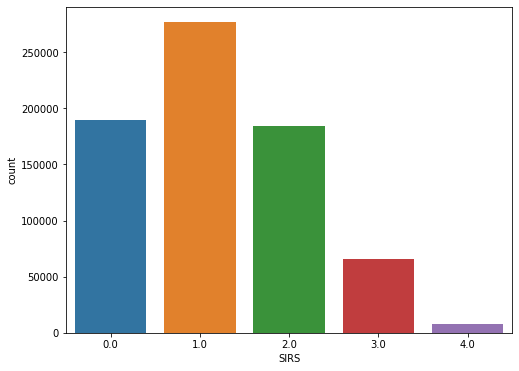

In [74]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SIRS',data=clean_data)

<AxesSubplot:xlabel='SIRS', ylabel='count'>

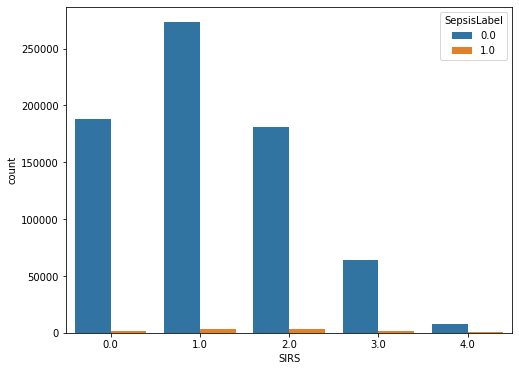

In [75]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SIRS',data=clean_data,hue='SepsisLabel')

In [76]:
sirs=list(clean_data['SIRS'].unique())
data=[]
for i in sirs:
    sep_amount=clean_data[['SIRS','SepsisLabel']].groupby(by='SIRS')['SepsisLabel'].value_counts()[i][1]
    total=clean_data[['SIRS','SepsisLabel']].groupby(by='SIRS')['SepsisLabel'].count()[i]
    result=np.round(sep_amount/total,2)*100
    data.append(result)

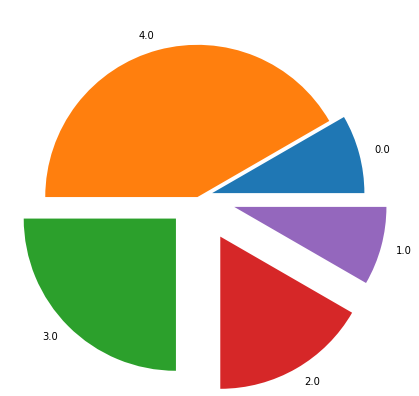

In [77]:
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = sirs,explode=(0.1, 0.0, 0.2, 0.3,0.25))
plt.show()

In [56]:
clean_data.to_csv("dataset_for_testing1.csv")

In [57]:
clean_data=pd.read_csv("dataset_for_testing1.csv")

In [58]:
clean_data[clean_data['FiO2']>8].shape

(1, 32)

In [59]:
for i in range(len(df5)):
    if df5.loc[i,'FiO2']>=0.1:
        impute=random.randint(12,20)
        df5.loc[i,'FiO2']=impute

NameError: name 'df5' is not defined

In [78]:
df5=pd.read_csv("dataset_for_testing1.csv")

In [79]:
df5.head()

Unnamed: 0    HR  O2Sat  Temp    SBP   MAP   DBP  Resp  BaseExcess   HCO3  \
0           0  71.0   93.5  36.6  152.0  98.0  66.0  19.0        -1.0  24.35   
1           1  93.0   92.5  35.6  110.0  76.0  56.0  22.0         0.3  24.50   
2           2  91.0   96.0  37.1  108.0  84.5  72.0  23.5        -7.2  19.50   
3           3  93.0   98.0  36.6  123.0  87.0  61.0  21.0        -2.4  22.25   
4           4  93.0   95.0  37.0  110.0  81.0  70.0  20.0        -6.4  19.80   

   FiO2    pH  PaCO2  SaO2   BUN  Calcium  Chloride  Creatinine  Glucose  \
0  0.40  7.37   49.0  95.9  17.0     7.80     111.0        0.95    126.0   
1  0.40  7.50   27.2  93.7  16.0     1.05     110.0        1.05    112.0   
2  0.40  7.37   30.0  97.5  32.0     8.30     113.5        0.84    233.0   
3  0.21  7.52   21.9  95.6  12.0     9.00     108.0        1.05    128.0   
4  0.44  7.36   28.2  99.1  18.0     8.20     107.0        0.63    266.0   

   Lactate  Magnesium  Phosphate  Potassium   Hct   Hgb   PTT   WBC  \
0     2.02        2.1        2.8        4.6  35.0  11.4  37.3   7.8   
1     2.40        2.3        6.3        3.7  25.6   8.7  38.0  14.9   
2     1.82        2.0        3.4        4.2  35.8  11.4  28.7  12.7   
3     4.78        1.7        3.4        3.3  26.3   8.4  29.0   5.5   
4     4.61        1.9        2.1        4.7  43.7  13.9  33.2  11.6   

   Platelets   Age  Gender  SepsisLabel  SIRS  
0      105.0  73.0     1.0          0.0   0.0  
1       27.0  73.0     1.0          0.0   4.0  
2      224.0  73.0     1.0          0.0   3.0  
3      178.0  73.0     1.0          0.0   2.0  
4      256.0  73.0     1.0          0.0   2.0

In [80]:
df5=df5.drop('Unnamed: 0',axis=1)

In [ ]:





df5 is the cleaned hosp B 




#### Loading all the Scaling and Model object

In [275]:
import pickle
# scaler=pickle.load(open("Scaling_obj.pkl",'rb'))
# rf=pickle.load(open("Models//cluster_undersample_rf.pkl",'rb'))
# gb=pickle.load(open("Models//cluster_undersample_gb.pkl",'rb'))

In [276]:
scaler=pickle.load(open("Scaling_obj_std.pkl",'rb'))

In [277]:
X=df5.drop('SepsisLabel',axis=1)
y=df5['SepsisLabel']

In [278]:
X_pred=scaler.transform(X)

### Random Forest

In [139]:
y_pred_rf=rf.predict(X_pred)
print(accuracy_score(y,y_pred_rf))
print(confusion_matrix(y,y_pred_rf))
print(classification_report(y,y_pred_rf))

0.05314811747819366
[[ 28227 685553]
 [   498  10282]]
              precision    recall  f1-score   support

         0.0       0.98      0.04      0.08    713780
         1.0       0.01      0.95      0.03     10780

    accuracy                           0.05    724560
   macro avg       0.50      0.50      0.05    724560
weighted avg       0.97      0.05      0.08    724560



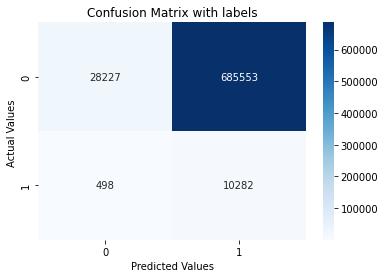

In [86]:
ax = sns.heatmap(confusion_matrix(y,y_pred_rf), annot=True, cmap='Blues',fmt='.7g')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Gradient Boost

In [88]:
y_pred_gb=gb.predict(X_pred)
print(accuracy_score(y,y_pred_gb))
print(confusion_matrix(y,y_pred_gb))
print(classification_report(y,y_pred_gb))

0.0666970299216076
[[ 38206 675574]
 [   660  10120]]
              precision    recall  f1-score   support

         0.0       0.98      0.05      0.10    713780
         1.0       0.01      0.94      0.03     10780

    accuracy                           0.07    724560
   macro avg       0.50      0.50      0.07    724560
weighted avg       0.97      0.07      0.10    724560



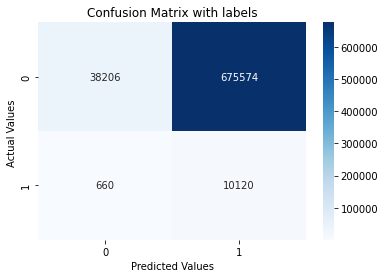

In [89]:
ax = sns.heatmap(confusion_matrix(y,y_pred_gb), annot=True, cmap='Blues',fmt='.7g')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [160]:
pca_kernal=pickle.load(open("Models/cluster_undersample_pca_15_kernal.pkl",'rb'))
svm=pickle.load(open("Models/cluster_undersample_pca_15_svm.pkl",'rb'))

In [174]:
X_pred_pca=[]
for row in X_pred:
    a=pca_kernal.transform([row])
    X_pred_pca.append(a[0])

In [178]:
X_pred_pca[0:2]

[array([ 0.25183299,  0.13113027,  0.07825909, -0.13549499, -0.00578538,
         0.00073576, -0.13861063,  0.05073377,  0.2156312 , -0.06307436,
         0.03412054, -0.00286504, -0.01582736, -0.08461769, -0.11760872]),
 array([ 0.22827492, -0.20447024,  0.25916899, -0.1324101 ,  0.03117213,
         0.01497599,  0.01265544, -0.1396188 ,  0.0017729 , -0.03394669,
        -0.01030413,  0.00129914,  0.01284905, -0.00911928, -0.0014562 ])]

In [172]:
X_pred[0:2]

array([[0.27307692, 0.87096774, 0.76829268, 0.29343629, 0.22      ,
        0.24115415, 0.22      , 0.24242424, 0.41818182, 0.035     ,
        0.58015267, 0.34444444, 0.77631579, 0.03773585, 0.25490196,
        0.68907563, 0.01505376, 0.09304703, 0.04220779, 0.12631579,
        0.07526882, 0.10943396, 0.27794562, 0.20134228, 0.08654545,
        0.02743614, 0.10011249, 0.77464789, 1.        , 0.25      ],
       [0.28076923, 0.75806452, 0.73452158, 0.33976834, 0.28      ,
        0.27056678, 0.34      , 0.23484848, 0.47272727, 0.06      ,
        0.54198473, 0.4       , 0.96052632, 0.05283019, 0.2745098 ,
        0.68907563, 0.01505376, 0.26687117, 0.0487013 , 0.24210526,
        0.17741935, 0.13584906, 0.38519637, 0.26845638, 0.15345455,
        0.01324503, 0.0663667 , 0.77464789, 1.        , 0.5       ]])

Accuracy of SVM after Dimensional Reduction by PCA with 15 Principal Components: 0.7180757977255162


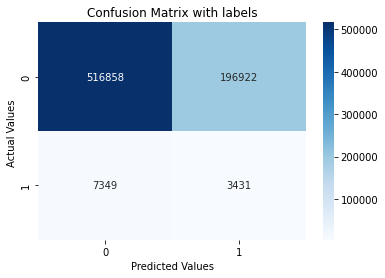

In [179]:
# X_pred_pca=pca_kernal.transform(X_pred)
svc_pred=svm.predict(X_pred_pca)
print(f"Accuracy of SVM after Dimensional Reduction by PCA with 15 Principal Components: {accuracy_score(y,svc_pred)}")
    
ax = sns.heatmap(confusion_matrix(y,svc_pred), annot=True, cmap='Blues',fmt='.7g')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [180]:
print(classification_report(y,svc_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.72      0.83    713780
         1.0       0.02      0.32      0.03     10780

    accuracy                           0.72    724560
   macro avg       0.50      0.52      0.43    724560
weighted avg       0.97      0.72      0.82    724560



#### FEATURE SELECTION

In [113]:
### Keeping top(19) 18 features based on mutual information and SIRS.

X=df5[['FiO2', 'O2Sat', 'Magnesium', 'SaO2', 'Calcium', 'BaseExcess', 'pH','Temp', 'Lactate', 'Potassium',
                          'Phosphate', 'Creatinine', 'Resp','HCO3', 'Chloride', 'Hgb', 'BUN', 'Hct','SIRS']]
y=df5['SepsisLabel']

In [114]:
X.shape,y.shape

((724560, 19), (724560,))

In [115]:
y.value_counts()

0.0    713780
1.0     10780
Name: SepsisLabel, dtype: int64

In [116]:
# loading all the models
import pickle

m1=pickle.load(open("MinMaxObj_after_feature_selection_kpca_svc.pkl",'rb'))
svc=pickle.load(open("Models/feature_selection_kpca_svcObj.pkl",'rb'))
sigmoid_kpca=pickle.load(open("Models/sigmoid_kpca_kernalObj_after_feat_selct.pkl",'rb'))

In [129]:
# Scaling
X_scaled=m1.transform(X)

In [130]:
# KPCA SIGMOID
X_scaled_kpca=[]
for row in X_scaled:
    a=sigmoid_kpca.transform([row])
    X_scaled_kpca.append(a[0])

In [127]:
len(X_scaled_kpca[0])

15

In [122]:
y_pred=svc.predict(X_scaled_kpca)

In [123]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))
print(f1_score(y,y_pred))

[[ 24140 689640]
 [   456  10324]]
              precision    recall  f1-score   support

         0.0       0.98      0.03      0.07    713780
         1.0       0.01      0.96      0.03     10780

    accuracy                           0.05    724560
   macro avg       0.50      0.50      0.05    724560
weighted avg       0.97      0.05      0.06    724560

0.029051247706628546


In [124]:
print(accuracy_score(y,y_pred))

0.047565419012918185


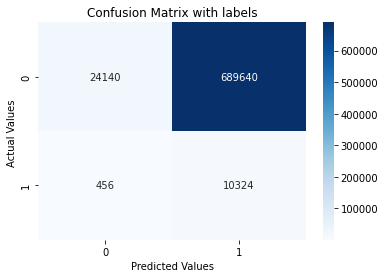

In [149]:
ax = sns.heatmap([[ 24140 ,689640],[   456,  10324]], annot=True, cmap='Blues',fmt='.7g')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### ANN

In [132]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    keras.layers.Dense(128, input_shape=(19,), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [133]:
model.load_weights("Ann_modelObj_cluster_undersample_pca_1.h5")

In [134]:
ann_pred=model.predict(X_scaled)

In [135]:
ann_pred1=[]
for i in ann_pred:
    if i[0]>=0.5:
        ann_pred1.append(1)
    else:
        ann_pred1.append(0)

In [137]:
confusion_matrix(y,ann_pred1)

array([[ 19666, 694114],
       [   448,  10332]], dtype=int64)

In [138]:
print(classification_report(y,ann_pred1))

              precision    recall  f1-score   support

         0.0       0.98      0.03      0.05    713780
         1.0       0.01      0.96      0.03     10780

    accuracy                           0.04    724560
   macro avg       0.50      0.49      0.04    724560
weighted avg       0.96      0.04      0.05    724560



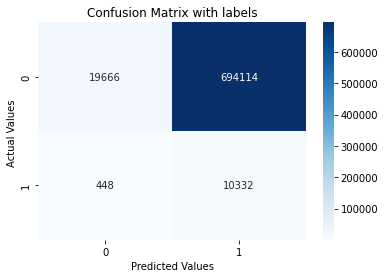

In [150]:
ax = sns.heatmap([[ 19666 ,694114],[   448,  10332]], annot=True, cmap='Blues',fmt='.7g')

ax.set_title('Confusion Matrix with labels');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()